In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pathlib import Path
from scipy import stats
from matplotlib import colors
from matplotlib.colors import DivergingNorm
import plotly.express as px

import seaborn as sns
import scipy as sp
from sklearn import metrics
from collections import Counter
os.getcwd()
## navigate to /udd/redmo
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
os.chdir('..')

# os.chdir('../proj/regeps/regep00/')#studies/LTRC/data/epigenetic/methylation/TopMed/data/tests/rejpz/LEVEL4')
# os.chdir("../../../../proj/regeps/regep00/studies/COPDGene/analyses/rebdh/ltrc/")

os.getcwd()

'/udd/redmo'

### Fig 1 workflow example

In [98]:

trace='data/MotifPipeline/sthlm_motif_0_QCbeta/A549_CTCF'
data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,15,16],names=["chr", "start", "end",'weight','pval','chr1','st1','end1',"hits1",'W1','array','region','ChIPTF','gene'])
Col1=os.path.basename(trace).split('_')[0] #cell
Col2=os.path.basename(trace).split('_')[1] #TF
data=data.fillna(0)
data.ChIPTF=data.ChIPTF.replace('.',0)
data.ChIPTF[(data.ChIPTF==Col2)]=1
data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
data.ChIPTF=pd.to_numeric(data.ChIPTF)
data.weight=(data.weight-data.weight.min())/(data.weight.max()-data.weight.min())

# #     data=data[data.ChIPTF!='.']

data['wgbs']=data.W1/100
data.wgbs=1-data.wgbs
data.array=1-data.array
# data['st1']=data['st1']+5
# data['end1']=data['end1']-5
chr=10
data=data[data['chr']=='chr'+str(chr)]
data=data[(data['start']>400000)&(data['end']<4500000)]
# data


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'genome location (x10,000,000) on chr10 of CTCF in A549')

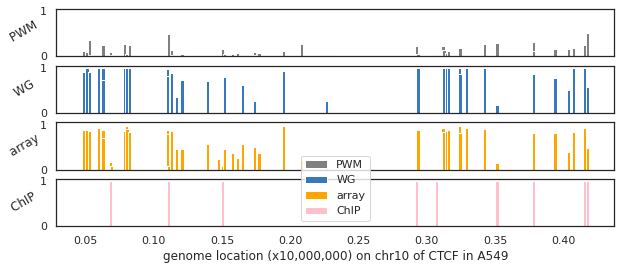

In [103]:
cdict={'GM12878':'red','K-562':'blue','A-549':'green',
       'Hep-G2':'orange','HeLa-S3':'yellow','SK-N-SH':'pink'}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True,figsize=(10,4))
x=(data.start)/10000000

binwidth = 0.0025

l1=ax1.bar(x,data.weight, width=binwidth,label='PWM',color='grey')
l2=ax2.bar(x,1-data.wgbs, width=binwidth,label='WG',color=sns.xkcd_rgb["windows blue"])
l3=ax3.bar(x,1-data.array, width=binwidth,label='array',color='orange')
l4=ax4.bar(x,data.ChIPTF, width=binwidth,label='ChIP',color='pink')
plt.legend([l1, l2, l3, l4],["PWM", "WG", "array","ChIP"],loc='best')
plt.grid(False)

plt.rcParams.update({'font.size': 18})
h=ax1.set_ylabel('PWM     ')
h.set_rotation(30)
h=ax2.set_ylabel('WG     ')
h.set_rotation(30)
h=ax3.set_ylabel('array     ')
h.set_rotation(30)
h=ax4.set_ylabel('ChIP     ')
h.set_rotation(30)
ax4.set_xlabel('genome location (x10,000,000) on chr'+str(chr)+" of CTCF in A549")
# plt.savefig("Desktop/"+Col1+'_'+Col2+"_chr"+str(chr)+"of CTCF in A549.png",dpi=300,bbox_inches = "tight")

#     axs.legend(ncol=3,loc=8)

### Fig SM1

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# import matplotlib.backends.backend_pdf
table=[]
TF='CTCF'
cell='A549'
# path='../validate_milipeed'
# traces= glob.glob('/udd/redmo/data/MotifPipeline/validate_milipeed/*')
# traces= glob.glob('data/MotifPipeline/val_mili_plusNONcpg/*')
traces= glob.glob('../../d/tmp/redmo/data/MotifPipeline/sthlm_motif_0_QCbeta/*')

# pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
indices = [i for i, s in enumerate(traces) if cell+'_'+TF in s]

for jac,zzzz in enumerate(indices):
#     data=pd.read_csv(traces[zzzz],sep='\t',usecols=[0,1,2,3,4,5,6,7,8,12,13],names=["chr", "start", "end",'weight',"wgbs",'gene',"ChIPTF",'shW','shWG','array','shA']) 
#     data=pd.read_csv(traces[zzzz],sep='\t',usecols=[0,1,2,3,8,9,10,15],names=["chr", "start", "end",'weight','hits1',"wgbs",'array',"ChIPTF"])
    data=pd.read_csv(traces[zzzz],sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,16],names=["chr", "start", "end",'weight','CG','hits',"wgbs",'array','body','TSS','ChIPTF'])

    # for jac,trace in enumerate(traces):
    table2=[]
    tbl=[]
    tmpTBL2=[]
    tmpTBL=[]
#     data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,5,6,7,8,12,13],names=["chr", "start", "end",'weight',"wgbs",'gene',"ChIPTF",'shW','shWG','array','shA']) 

    # Refit data to 0-1    
    data.ChIPTF=data.ChIPTF.replace('.','0')
    data.ChIPTF[data.ChIPTF!=0]=1
    data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
    data.ChIPTF=pd.to_numeric(data.ChIPTF)
    
#     data=data[data['weight']!=data['array']]
    data['wgbs']=1-(data['wgbs']/100)
    data['array'] = np.where(data['weight'] == data['array'], data['array'],1-data['array'])
#     data=data[((data['hits1']))>=10]

#     data3=data.drop_duplicates()
    df3=data.groupby([data.chr,data.start,data.end,data.weight,data.wgbs]).size().reset_index(name='counts')

    df=data.groupby([data.chr,data.start,data.end]).size().reset_index(name='counts')
    #     data = data.groupby([data.chr,data.start,data.end]).agg({'weight':'mean',"wgbs":'mean',"ChIPTF":'mean',"array":'min'})
    data1 = data.groupby([data.chr,data.start,data.end]).agg({'weight':'mean',"wgbs":'mean',"array":'mean'})
    data1=data1.merge(df,on=['chr','start','end'])
    data1=data1.drop_duplicates()

    data2 = data.groupby([data.chr,data.start,data.end]).agg({'weight':'min',"wgbs":'min',"array":'min'})
    data2=data2.merge(df,on=['chr','start','end'])
    data2=data2.drop_duplicates()
    data3 = data.groupby([data.chr,data.start,data.end]).agg({'weight':'median',"wgbs":'median',"array":'median'})
    data3=data3.merge(df,on=['chr','start','end'])
    data3=data3.drop_duplicates()
    data4 = data.groupby([data.chr,data.start,data.end]).agg({'weight':'max',"wgbs":'max',"array":'max'})
    data4=data4.merge(df,on=['chr','start','end'])
    data4=data4.drop_duplicates()

    f= plt.figure(figsize=(20, 4))
    ## Plot all three value distributions fit to same 0-1 scale


    for jj,start in enumerate(data.start):
        zz=data[data['start']==start]
        if zz.count!=1:
            yy=[np.abs(x - y) for i,x in enumerate(zz.wgbs) for j,y in enumerate(zz.wgbs) if i != j]

        table2.append(np.mean(yy))
        tmpTBL2.append(len(zz))#/np.math.factorial(len(yy)))
    WWW=np.max(tmpTBL2)-1

    data1['freq']=pd.DataFrame(tmpTBL2)
    data2['freq']=pd.DataFrame(tmpTBL2)
    data3['freq']=pd.DataFrame(tmpTBL2)
    data4['freq']=pd.DataFrame(tmpTBL2)

    ax1=plt.subplot(1, 5, 1)
    d1=data1[data1.freq==2]
    if d1.empty is False:
        d2=data2[data2.freq==2]
        d3=data3[data3.freq==2]
        d4=data4[data4.freq==2]
        
        try:
            g=sns.distplot((d1['wgbs']-d2['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - min')
        except RuntimeError:
            pass
        try:
            g=sns.distplot((d1['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - median')
        except RuntimeError:
            pass
        try:
            g=sns.distplot((d1['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - max')
        except RuntimeError:
            pass
        try:
            g=sns.distplot((d2['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - median')
        except RuntimeError:
            pass
        try:
            g=sns.distplot((d2['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - max')
        except RuntimeError:
            pass
        try:
            g=sns.distplot((d3['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='median - max')
        except RuntimeError:
            pass
        
#         ax1.legend_.remove()

#         plt.yscale('log',basey=10) 
#         plt.legend(loc='best')
        plt.xlabel('absolute diff')
        plt.ylabel('Frequency')
#         ax1.set_ylim([0,60])
#         plt.title('3 probes/motif region')
#         plt.show()
        plt.title(''+os.path.basename(traces[zzzz])+' \n pairwise difference \n with 2 CGs/motif region')# \n seq read >10')

    if WWW>2:
        ax2=plt.subplot(1, 5, 2)
        d1=data1[data1.freq==3]
        if d1.empty is False:
            d2=data2[data2.freq==3]
            d3=data3[data3.freq==3]
            d4=data4[data4.freq==3]
            try:
                g=sns.distplot((d1['wgbs']-d2['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - min')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d3['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='median - max')
            except RuntimeError:
                pass

#             plt.yscale('log',basey=10) 
#             plt.legend(loc='best')
            plt.xlabel('absolute diff')
#             plt.ylabel('Frequency')
#             ax2.set_ylim([0,60])
#             ax2.legend_.remove()

            plt.title('3 CGs/motif region')
#             plt.show()


    if WWW>3:
        ax3=plt.subplot(1, 5, 3)
        d1=data1[data1.freq==4]
        if d1.empty is False:
            d2=data2[data2.freq==4]
            d3=data3[data3.freq==4]
            d4=data4[data4.freq==4]
            try:
                g=sns.distplot((d1['wgbs']-d2['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - min')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d3['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='median - max')
            except RuntimeError:
                pass

#             plt.yscale('log',basey=10) 
#             plt.legend(loc='best')
            plt.xlabel('absolute diff')
#             ax3.set_ylim([0,60])
#             plt.ylabel('Frequency')
#         plt.title('3 probes/motif region')
#         plt.show()
#             plt.legend(loc=None)
#             ax3.legend_.remove()
            plt.title('4 CGs/motif region')
        else:
            pass
    if WWW>4:
        ax4=plt.subplot(1, 5, 4)
        d1=data1[data1.freq==5]
        if d1.empty is False:
            d2=data2[data2.freq==5]
            d3=data3[data3.freq==5]
            d4=data4[data4.freq==5]
            try:
                g=sns.distplot((d1['wgbs']-d2['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - min')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d3['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='median - max')
            except RuntimeError:
                pass

#             plt.yscale('log',basey=10) 
#             plt.legend(loc='best')
            plt.xlabel('absolute diff')
#             ax4.set_ylim([0,60])
#             plt.ylabel('Frequency')
#             plt.title('3 probes/motif region')
#             plt.show()
#             plt.legend(loc=None)
#             ax4.legend_.remove()
            plt.title('5 CGs/motif region')
        else:
            pass
    if WWW>5:
        ax5=plt.subplot(1, 5, 5)
        d1=data1[data1.freq==6]
        if d1.empty is False:
            d2=data2[data2.freq==6]
            d3=data3[data3.freq==6]
            d4=data4[data4.freq==6]
            try:
                g=sns.distplot((d1['wgbs']-d2['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - min')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d1['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='mean - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d3['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - median')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d2['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='min - max')
            except RuntimeError:
                pass
            try:
                g=sns.distplot((d3['wgbs']-d4['wgbs']).abs(),kde=True,hist=False,rug=False,label='median - max')
            except RuntimeError:
                pass
#             plt.ylabel('Frequency')
#             plt.title('3 probes/motif region')
#             plt.show()
            plt.legend(loc='best')
            plt.xlabel('absolute diff')
#             ax5.set_ylim([0,60])
            plt.title('6+ CGs/motif region')
        else:
            pass
#     if WWW>6:
#         plt.subplot(1, WWW, 6,frameon=False)
#     fig.patch.set_visible(False)
#     plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')
#     plt.xticks([])
#     plt.yticks([])
#         d1=data1[data1.freq>6]
#     plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
#         if d1.empty is False:
#             d2=data2[data2.freq>6]
#             d3=data3[data3.freq>6]
#             d4=data4[data4.freq>6]
#             colors = ['mean-min','mean-median','mean-max','min-median','min-max','median-max']
#             plt.hist([(d1['wgbs']-d2['wgbs']).abs(),(d1['wgbs']-d3['wgbs']).abs(),
#                       (d1['wgbs']-d4['wgbs']).abs(),(d2['wgbs']-data3['wgbs']).abs(),
#                       (d2['wgbs']-d4['wgbs']).abs(),(d3['wgbs']-data4['wgbs']).abs()],
#                      alpha=.5,log=True,stacked=False,label=colors)
# #             plt.legend(loc='best')
#             plt.xlabel('abs Diff')

#     #         plt.ylabel('Frequency')
#             plt.title('...& 7+ probe/gene')


#     if jac== X:
#         plt.savefig("netZooPy/tests/milipeed/ToyFigs/exProbePerGene.png",dpi=300,bbox_inches = "tight")
    plt.show()

### Fig S3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(0.6881567662245807, 100000)

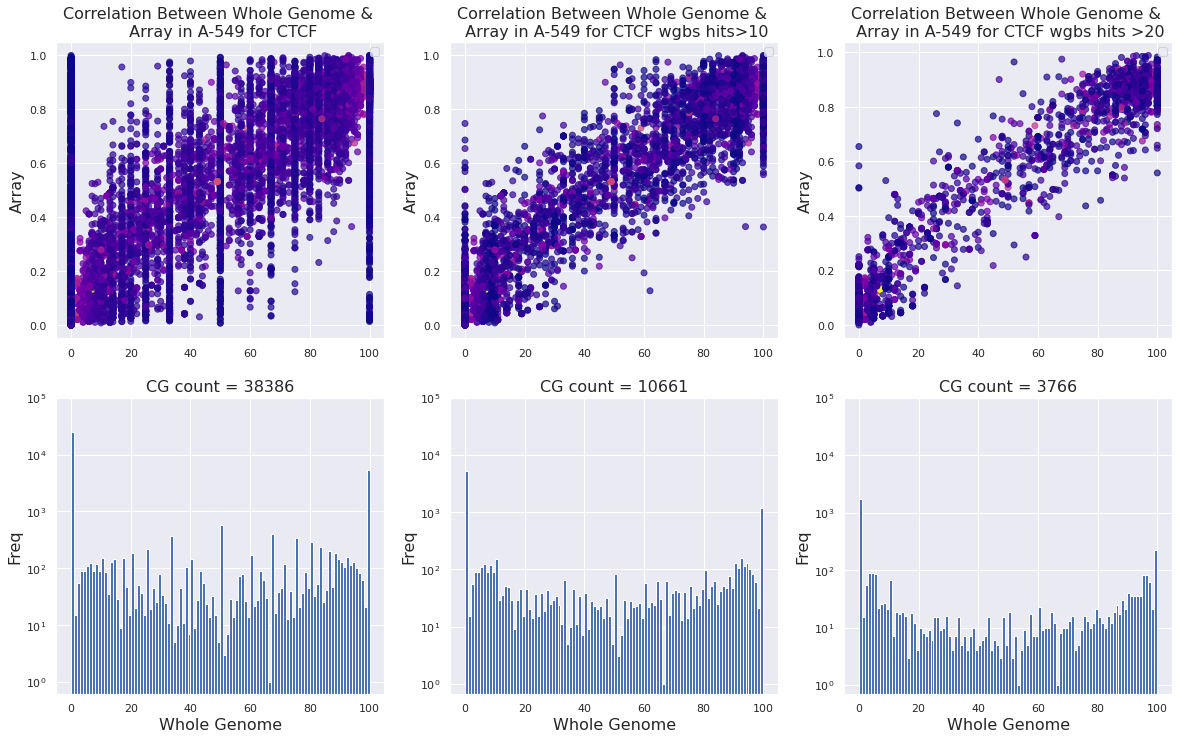

In [96]:

cdict={'GM12878':'red','K-562':'blue','A-549':'green',
    'Hep-G2':'orange','HeLa-S3':'yellow','SK-N-SH':'pink'}
TF='CTCF'
chr='chr1'
cell='A-549'
# traces= glob.glob('data/MotifPipeline/MeArrayIntersectFULLshuf/*')
# traces= glob.glob('data/MotifPipeline/ENCODE/wgbsin/*')
# traces= glob.glob('data/MotifPipeline/MeArrayIntersectFULLshuf/*')
# indices = [i for i, s in enumerate(traces) if gene in s]
tab=[]
# for j,zz in enumerate(indices):
data=pd.read_csv(traces[zzzz],sep='\t',usecols=[0,1,2,3,8,9,10,15],names=["chr", "start", "end",'weight','hits1',"wgbs",'array',"ChIPTF"])
# data=pd.read_csv('data/MotifPipeline/MeArrayIntersectFULLshuf/A-549_CTCF',sep='\t',usecols=[0,1,2,3,4,5,6,7,8,12,13],names=["chr", "start", "end",'weight',"wgbs",'gene',"ChIPTF",'shW','shWG','array','shA']) 
# data.loc[data.weight == data.wgbs, 'wgbs'] = 0
# data.loc[data.weight == data.array, 'array'] = 0
data=data[data['weight']!=data['wgbs']] ##subset of motif or entire motif flag
data=data[data['weight']!=data['array']]
# data=data[data['wgbs']!=0]
# data=data[data['array']!=0]
# data['W1']=1-data['W1']

# data=data[((data['hits1']+data['hits2'])/2)>=20]
# data=data[((data['hits1']))>=10]


# data['wgbs2']=1-((data.W1+data.W2)/2)/100

# data=data[data.W1<=100]
# data=data[data.W2<=100]
# data.W1=(data.W1/100)
# data.W2=(data.W2/100)
# data=data[data['W1']!=0]
# data=data[data['W2']!=0]


df2=data
df2.hits1.astype('category')

f= plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.scatter(df2.wgbs,df2.array,cmap='plasma',c=df2.hits1,alpha=.7) 
plt.legend(loc='best')
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+ '\n removing probes with less than 20 reads' ,fontsize=16)
plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF,fontsize=16)
# plt.xlabel('Whole Genome',fontsize=16)
plt.ylabel('Array',fontsize=16)

plt.subplot(2, 3, 2)
df2=df2[df2['hits1']>=10]
plt.scatter(df2.wgbs,df2.array,cmap='plasma',c=df2.hits1,alpha=.7) 
plt.legend(loc='best')
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+ '\n removing probes with less than 20 reads' ,fontsize=16)
plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+' wgbs hits>10',fontsize=16)
# plt.xlabel('Whole Genome',fontsize=16)
plt.ylabel('Array',fontsize=16)

plt.subplot(2, 3, 3)
df2=df2[df2['hits1']>=20]
plt.scatter(df2.wgbs,df2.array,cmap='plasma',c=df2.hits1,alpha=.7) 
plt.legend(loc='best')
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+ '\n removing probes with less than 20 reads' ,fontsize=16)
plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+' wgbs hits >20',fontsize=16)
# plt.xlabel('Whole Genome',fontsize=16)
plt.ylabel('Array',fontsize=16)

df2=data
df2.hits1.astype('category')

ax1=plt.subplot(2, 3, 4)
plt.hist(df2.wgbs,bins=100,log=True)#,df2.array,cmap='plasma',c=df2.hits,alpha=.7) 
# plt.legend(loc='best')
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+ '\n removing probes with less than 20 reads' ,fontsize=16)
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF,fontsize=16)
plt.xlabel('Whole Genome',fontsize=16)
plt.ylabel('Freq',fontsize=16)
plt.title(len(df2),fontsize=16)
plt.title('CG count = '+str(len(df2)),fontsize=16)
ax1.set_ylim([0,100000])

ax2=plt.subplot(2, 3, 5)
df2=df2[df2['hits1']>=10]
plt.hist(df2.wgbs,bins=100,log=True)#,df2.array,cmap='plasma',c=df2.hits,alpha=.7) 
# plt.legend(loc='best')
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+ '\n removing probes with less than 20 reads' ,fontsize=16)
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+' wgbs hits>10',fontsize=16)
plt.xlabel('Whole Genome',fontsize=16)
plt.ylabel('Freq',fontsize=16)
plt.title('CG count = '+str(len(df2)),fontsize=16)

ax2.set_ylim([0,100000])

ax3=plt.subplot(2, 3, 6)
df2=df2[df2['hits1']>=20]
plt.hist(df2.wgbs,bins=100,log=True)#,df2.array,cmap='plasma',c=df2.hits,alpha=.7) 
# plt.legend(loc='best')
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+ '\n removing probes with less than 20 reads' ,fontsize=16)
# plt.title('Correlation Between Whole Genome & \n Array in '+cell+' for '+TF+' wgbs hits >20',fontsize=16)
plt.xlabel('Whole Genome',fontsize=16)
plt.ylabel('Freq',fontsize=16)
plt.title('CG count = '+str(len(df2)),fontsize=16)
ax3.set_ylim([0,100000])

# fig.show()


## process various different window buffers

In [91]:

import glob, os
import numpy as np
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import warnings
from sklearn import metrics

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# import matplotlib.backends.backend_pdf

# agg_meth='median'
# buffer='500' -- inherited from outdir

def buffer_distr_comp(agg_meth='mean',outdir='data/MotifPipeline/sthlm_motif_50_QCbeta/red/'):
    i=0
    traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/*')
    traces = list(filter(lambda file: os.stat(file).st_size > 0, traces))
    buffer=outdir.split('/')[2]
    buffer=buffer.split('_')[2]
    pwm_sp=[]
    wg_sp=[]
    me_sp=[]
    Path(outdir+'/'+agg_meth).mkdir(parents=True, exist_ok=True)
    # indices = [i for i, s in enumerate(traces) if 'sthml_auroc_meltbox' in s]
    for trace in (traces):

        try:
            data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,15,16],
                             names=["chr", "start", "end",'weight','pval',"hits1",'W1','array','region','gene','ChIPTF'],engine='python')
            data.weight=(data.weight-data.weight.min())/(data.weight.max()-data.weight.min())
            data['wgbs']=data.W1/100
            data.wgbs=1-data.wgbs
            data.array=1-data.array
            # print(data)

            trace2=os.path.basename(trace)#.split('/')[4]
        
            com_data=pd.read_csv(outdir+'/'+trace2,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,15,16],
                                 names=["chr", "start", "end",'weight','pval',"hits1",'W1','array','region','gene','ChIPTF'],engine='python')
            com_data.weight=(data.weight-data.weight.min())/(data.weight.max()-data.weight.min())
            com_data['wgbs']=com_data.W1/100
            com_data.wgbs=1-com_data.wgbs
            com_data.array=1-com_data.array
#         print(com_data)
        
            cell=os.path.basename(trace).split('_')[0]
            TF=os.path.basename(trace).split('_')[1]
            data = data.groupby([data.chr,data.start,data.end]).agg({'weight':agg_meth,"wgbs":agg_meth,"ChIPTF":'max',"array":agg_meth,'hits1':'mean','W1':'mean'})
            com_data = com_data.groupby([com_data.chr,com_data.start,com_data.end]).agg({'weight':agg_meth,"wgbs":agg_meth,"ChIPTF":'max',"array":agg_meth,'hits1':'mean','W1':'mean'})

            data2=data.merge(com_data,on=['chr','start','end'])
            pwm=(sp.stats.spearmanr(data2.weight_x,data2.weight_y)[0])
            wg=(sp.stats.spearmanr(data2.wgbs_x,data2.wgbs_y)[0])
            me=(sp.stats.spearmanr(data2.array_x,data2.array_y)[0])
            i=i+1
            column= pwm,wg,me
#             print(pwm_sp,wg_sp,me_sp)
            np.transpose(pd.DataFrame((column))).to_csv(outdir+'/'+agg_meth+'/'+buffer+'_'+agg_meth+'_sthlm_distr_comp.txt',mode='a',index=False,header=False)
#             print('running distribution comparison between 0 and '+buffer+' for '+TF+' in '+cell)
        #         return pwm_sp
            pwm_sp.append(pwm)
            wg_sp.append(wg)
            me_sp.append(me)
            column= pwm_sp,wg_sp,me_sp
        except:
            pass
            print('missing data for taking '+agg_meth+' of '+TF+' in '+cell)
    return column

In [ ]:
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_5_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_5_QCbeta/red/')
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_50_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_50_QCbeta/red/')
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_10_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_10_QCbeta/red/')
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_20_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_20_QCbeta/red/')
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_100_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_100_QCbeta/red/')
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_250_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_250_QCbeta/red/')
ww=buffer_distr_comp('mean','data/MotifPipeline/sthlm_motif_500_QCbeta/red/')
cc=buffer_distr_comp('median','data/MotifPipeline/sthlm_motif_500_QCbeta/red/')

## plot various different window buffers

### Null Hypo H0 A

In [ ]:
allbox = pd.DataFrame()
agg_meth='mean'
method='auroc'
traces= glob.glob('data/MotifPipeline/**/red/test/'+agg_meth+'/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_'+method+'_meltbox' in s]
for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
#     print(buffer)
    meltbox=pd.read_csv(trace,sep='\t',index_col=0)
    meltbox['buffer']=buffer
    allbox=pd.concat([allbox,meltbox],axis=0)
#     allbox
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
allbox['data_buff']=allbox['data']+'_'+allbox['buffer'].astype(str)
from pathlib import Path
outdir='data/MotifPipeline/compare'
Path(outdir).mkdir(parents=True, exist_ok=True)
# plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
# col_list = [A549]
cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
# for cell in cells:
for test in tests:
    allbox2=allbox[allbox['data_buff'].str.contains(pat=test)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
    allbox2.buffer=(allbox2.buffer).astype(int)
    allbox2=allbox2.sort_values(by='buffer')
    ##limit TF to those found with no buffer
#         TFF=allbox2[allbox2.buffer==0]
#         allbox2=allbox2[allbox2.TF.isin(TFF.TF)]

    g=sns.boxplot(x='buffer',y='AUROC', data=allbox2)
    g=sns.swarmplot(x='buffer',y='AUROC', data=allbox2,size=2, color=".3", linewidth=0)
    g.set(ylim=(0, 1))
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    g=plt.title(test)

    plt.savefig(outdir+"/sthlm_allCell"+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
    plt.show()
    plt.close()

### Fig SM4A

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


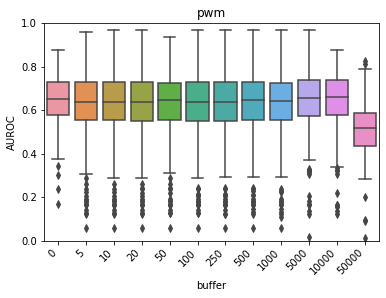

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


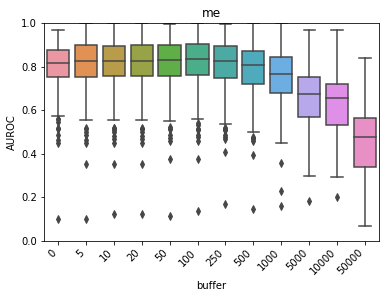

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


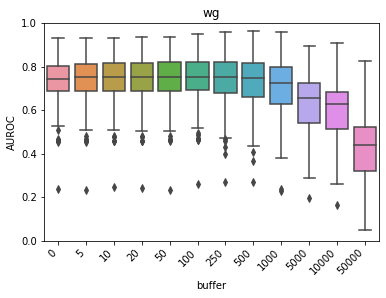

In [780]:
allbox = pd.DataFrame()
agg_meth='mean'
method='auroc'
traces= glob.glob('data/MotifPipeline/**/red/test/all/all/*.txt',recursive = True)
traces2= glob.glob('/pc/redmo/data/MotifPipeline/**/red/test/all/all/*.txt',recursive = True)
traces=traces+traces2
indices = [i for i, s in enumerate(traces) if 'sthlm_'+method+'_meltbox' in s]
for jac in (indices):
    trace=traces[jac]
    if 'pc' in trace:
        buffer=(trace).split('/')[5]
        buffer=(buffer).split('_')[2]
    else:
        buffer=(trace).split('/')[2]
        buffer=(buffer).split('_')[2]
#     print(buffer)
    meltbox=pd.read_csv(trace,sep='\t',index_col=0)
    meltbox['buffer']=buffer
    allbox=pd.concat([allbox,meltbox],axis=0)
#     allbox
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
allbox['data_buff']=allbox['data']+'_'+allbox['buffer'].astype(str)
from pathlib import Path
outdir='data/MotifPipeline/compare'
Path(outdir).mkdir(parents=True, exist_ok=True)
# plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
# col_list = [A549]
cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
# for cell in cells:
for test in tests:

    allbox2=allbox[allbox['data_buff'].str.contains(pat=test)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
    allbox2.buffer=(allbox2.buffer).astype(int)
    allbox2=allbox2.sort_values(by='buffer')
    ##limit TF to those found with no buffer
#         TFF=allbox2[allbox2.buffer==0]
#         allbox2=allbox2[allbox2.TF.isin(TFF.TF)]
    g=sns.boxplot(x='buffer',y='AUROC', data=allbox2)
#     g=sns.swarmplot(x='buffer',y='AUROC', data=allbox2,size=2, color=".3", linewidth=0)
    g.set(ylim=(0, 1))
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    g=plt.title(test)

    plt.savefig(outdir+"/sthlm_allCell"+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
    plt.show()
    plt.close()

## gather and plot methyl datatype distance across buffers Fig SM2

Text(0.5, 1.0, 'mean pairwise distance across all TF/cell combs')

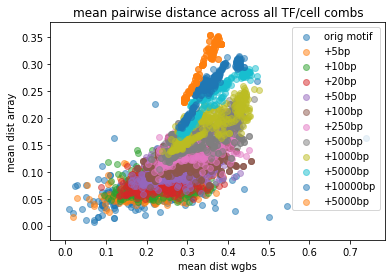

In [844]:
d1=pd.read_table('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d1=d1[d1.cell!='0']

d2=pd.read_table('data/MotifPipeline/sthlm_motif_5_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d2=d2[d2.cell!='0']

d3=pd.read_table('data/MotifPipeline/sthlm_motif_10_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d3=d3[d3.cell!='0']

d4=pd.read_table('data/MotifPipeline/sthlm_motif_20_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d4=d4[d4.cell!='0']

d5=pd.read_table('data/MotifPipeline/sthlm_motif_50_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d5=d5[d5.cell!='0']

d6=pd.read_table('data/MotifPipeline/sthlm_motif_100_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d6=d6[d6.cell!='0']  

d7=pd.read_table('data/MotifPipeline/sthlm_motif_250_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d7=d7[d7.cell!='0']  

d8=pd.read_table('data/MotifPipeline/sthlm_motif_500_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d8=d8[d8.cell!='0'] 

d9=pd.read_table('data/MotifPipeline/sthlm_motif_1000_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d9=d9[d9.cell!='0']  

d10=pd.read_table('../../../pc/redmo/data/MotifPipeline/sthlm_motif_5000_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d10=d10[d10.cell!='0']  

d11=pd.read_table('../../../pc/redmo/data/MotifPipeline/sthlm_motif_10000_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d11=d11[d11.cell!='0']  

d12=pd.read_table('../../../pc/redmo/data/MotifPipeline/sthlm_motif_50000_QCbeta/red/test/all/all/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d12=d12[d12.cell!='0']  

plt.scatter(d1.mean_dist_array,d1.mean_dist_wg,label='orig motif',alpha=.5)
plt.scatter(d2.mean_dist_array,d2.mean_dist_wg,label='+5bp',alpha=.5)
plt.scatter(d3.mean_dist_array,d3.mean_dist_wg,label='+10bp',alpha=.5)
plt.scatter(d4.mean_dist_array,d4.mean_dist_wg,label='+20bp',alpha=.5)
plt.scatter(d5.mean_dist_array,d5.mean_dist_wg,label='+50bp',alpha=.5)
plt.scatter(d6.mean_dist_array,d6.mean_dist_wg,label='+100bp',alpha=.5)
plt.scatter(d7.mean_dist_array,d7.mean_dist_wg,label='+250bp',alpha=.5)
plt.scatter(d8.mean_dist_array,d8.mean_dist_wg,label='+500bp',alpha=.5)
plt.scatter(d9.mean_dist_array,d9.mean_dist_wg,label='+1000bp',alpha=.5)
plt.scatter(d10.mean_dist_array,d10.mean_dist_wg,label='+5000bp',alpha=.5)
plt.scatter(d11.mean_dist_array,d11.mean_dist_wg,label='+10000bp',alpha=.5)
plt.scatter(d12.mean_dist_array,d12.mean_dist_wg,label='+5000bp',alpha=.5)

# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.legend(loc="best")#,bbox_to_anchor=(1,1))
plt.xlabel('mean dist wgbs')
plt.ylabel('mean dist array')
plt.title('mean pairwise distance across all TF/cell combs')

Text(0.5, 1.0, 'median pairwise distance across all TF/cell combs')

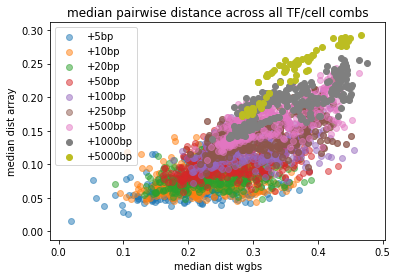

In [111]:
# d1=pd.read_table('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
# d1=d1[d1.cell!='0']

d2=pd.read_table('data/MotifPipeline/sthlm_motif_5_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d2=d2[d2.cell!='0']

d3=pd.read_table('data/MotifPipeline/sthlm_motif_10_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d3=d3[d3.cell!='0']

d4=pd.read_table('data/MotifPipeline/sthlm_motif_20_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d4=d4[d4.cell!='0']

d5=pd.read_table('data/MotifPipeline/sthlm_motif_50_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d5=d5[d5.cell!='0']

d6=pd.read_table('data/MotifPipeline/sthlm_motif_100_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d6=d6[d6.cell!='0']  

d7=pd.read_table('data/MotifPipeline/sthlm_motif_250_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d7=d7[d7.cell!='0']  

d8=pd.read_table('data/MotifPipeline/sthlm_motif_500_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d8=d8[d8.cell!='0'] 

d9=pd.read_table('data/MotifPipeline/sthlm_motif_1000_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d9=d9[d9.cell!='0']  

d10=pd.read_table('data/MotifPipeline/sthlm_motif_5000_QCbeta/red/test/median/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,9,10,11,12,13,14,15,16,17],names=['cell','TF','size','counts','length','mean_dist_array','mean_dist_wg','mean_dist_pwm','hits_array','hits_wg','hits_pwm'])
d10=d10[d10.cell!='0']  

# plt.scatter(d1.mean_dist_array,d1.mean_dist_wg,label='orig motif',alpha=.5)
plt.scatter(d2.mean_dist_array,d2.mean_dist_wg,label='+5bp',alpha=.5)
plt.scatter(d3.mean_dist_array,d3.mean_dist_wg,label='+10bp',alpha=.5)
plt.scatter(d4.mean_dist_array,d4.mean_dist_wg,label='+20bp',alpha=.5)
plt.scatter(d5.mean_dist_array,d5.mean_dist_wg,label='+50bp',alpha=.5)
plt.scatter(d6.mean_dist_array,d6.mean_dist_wg,label='+100bp',alpha=.5)
plt.scatter(d7.mean_dist_array,d7.mean_dist_wg,label='+250bp',alpha=.5)
plt.scatter(d8.mean_dist_array,d8.mean_dist_wg,label='+500bp',alpha=.5)
plt.scatter(d9.mean_dist_array,d9.mean_dist_wg,label='+1000bp')
plt.scatter(d10.mean_dist_array,d10.mean_dist_wg,label='+5000bp')

# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.legend(loc="best")#,bbox_to_anchor=(1,1))
plt.xlabel('median dist wgbs')
plt.ylabel('median dist array')
plt.title('median pairwise distance across all TF/cell combs')

### null Hypo B

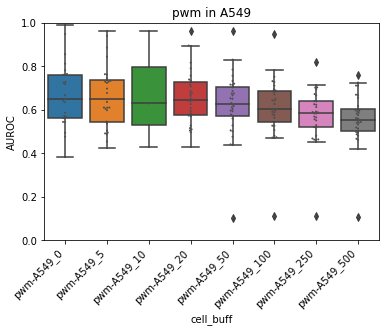

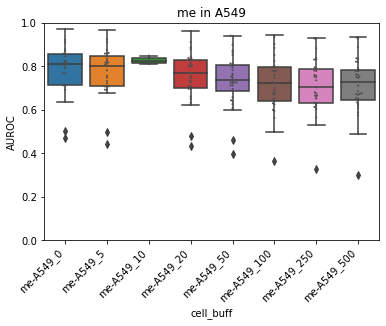

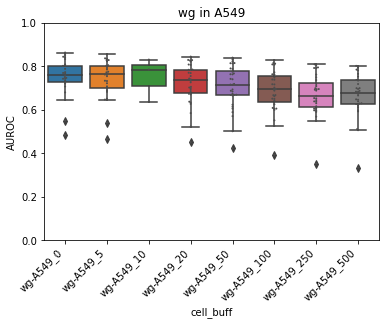

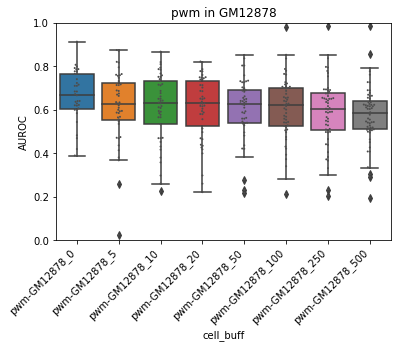

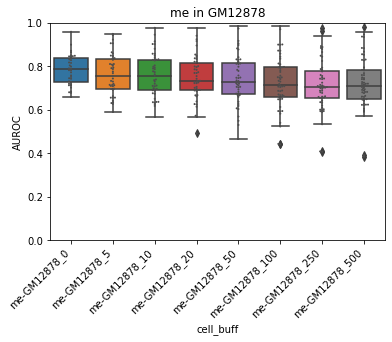

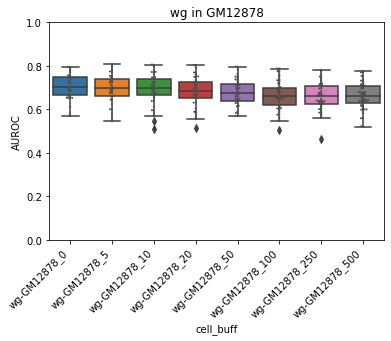

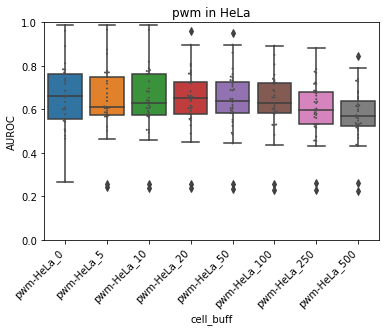

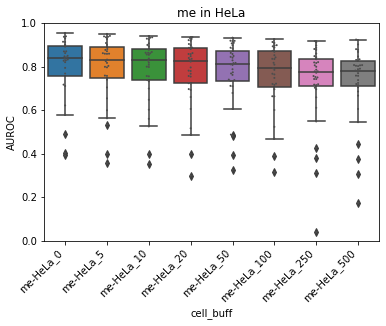

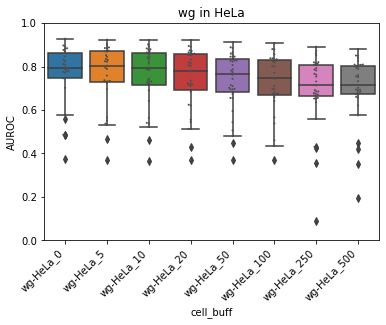

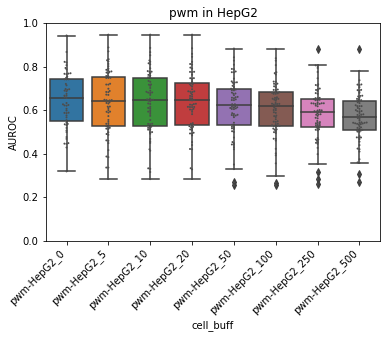

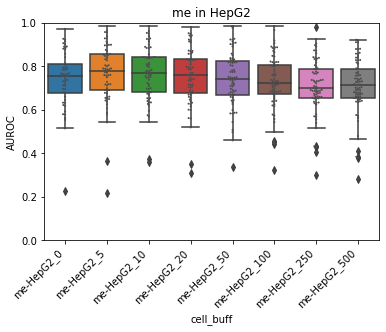

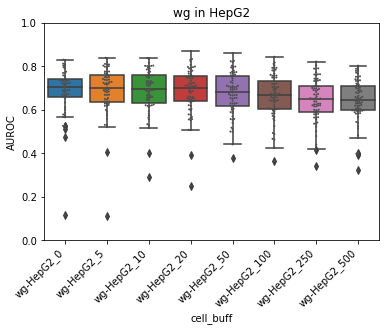

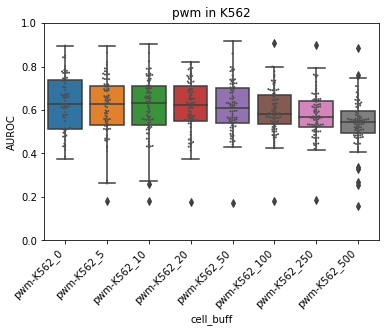

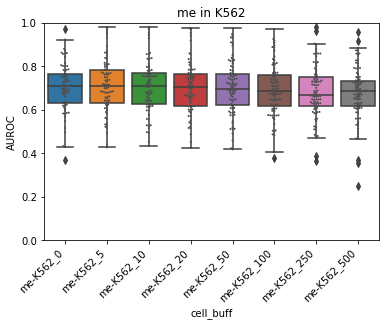

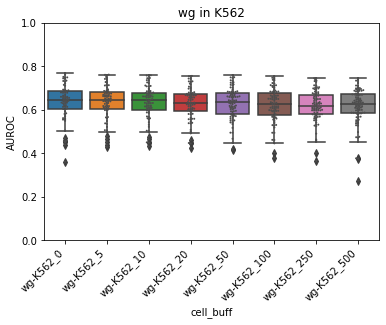

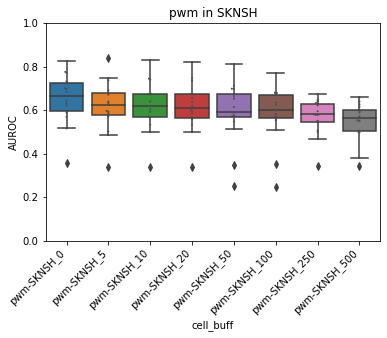

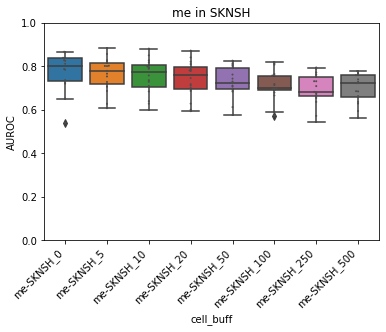

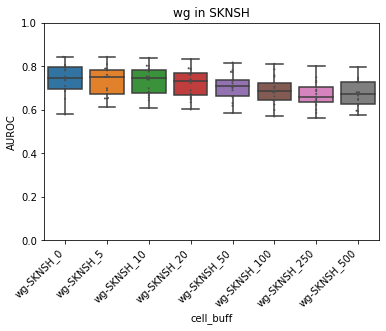

In [8]:
indir1='../../pc/redmo/data/MotifPipeline/**'
indir2='../../d/tmp/redmo/data/MotifPipeline/**'
outdir='../../pc/redmo/data/MotifPipeline'
allbox = pd.DataFrame()
traces1= glob.glob(indir1+'/test/*.txt',recursive = True)
traces2= glob.glob(indir2+'/test/*.txt',recursive = True)
traces=traces1+traces2
indices = [i for i, s in enumerate(traces) if 'camb_auroc_meltbox' in s]
method='auroc'

for jac in (indices):
    trace=traces[jac]
    if 'pc' in trace:
        buffer=(trace).split('/')[6]

    elif 'd/tmp' in trace:
        buffer=(trace).split('/')[7]
    buffer=(buffer).split('_')[3]
    buffer=(buffer).split('a')[2]

    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
from pathlib import Path
# outdir='data/MotifPipeline/compare'
Path(outdir).mkdir(parents=True, exist_ok=True)
# plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)

cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
for cell in cells: ##### aggregate across all cellines per data type
    for test in tests:
        allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
        allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
        allbox2.buffer=(allbox2.buffer).astype(int)
        allbox2=allbox2.sort_values(by='buffer')
        g=sns.boxplot(x='cell_buff',y=method.upper(), data=allbox2)
        g=sns.swarmplot(x='cell_buff',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0)
        g.set(ylim=(0, 1))
        g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
        g.set_title(test+' in '+cell)
        plt.show()
        plt.savefig(outdir+"camb_allbox_buff.png",dpi=300,bbox_inches = "tight")
        plt.close()
# return

### Fig SM4B 

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


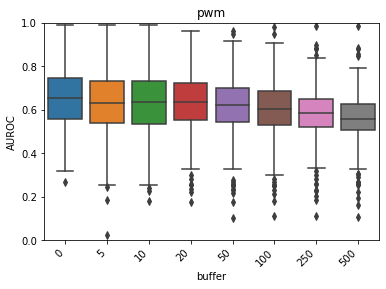

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


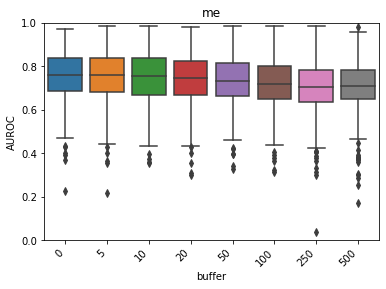

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


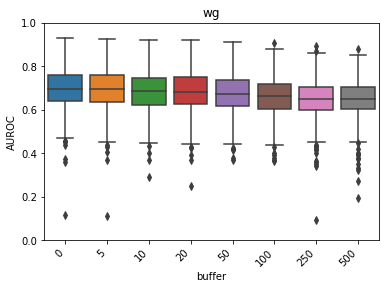

In [9]:

allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
allbox['data_buff']=allbox['data']+'_'+allbox['buffer'].astype(str)
from pathlib import Path
outdir='data/MotifPipeline/compare'
Path(outdir).mkdir(parents=True, exist_ok=True)
# plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
# col_list = [A549]
cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
# for cell in cells:
for test in tests:

    allbox2=allbox[allbox['data_buff'].str.contains(pat=test)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
    allbox2.buffer=(allbox2.buffer).astype(int)
    allbox2=allbox2.sort_values(by='buffer')
    ##limit TF to those found with no buffer
#         TFF=allbox2[allbox2.buffer==0]
#         allbox2=allbox2[allbox2.TF.isin(TFF.TF)]
    g=sns.boxplot(x='buffer',y='AUROC', data=allbox2)
#     g=sns.swarmplot(x='buffer',y='AUROC', data=allbox2,size=2, color=".3", linewidth=0)
    g.set(ylim=(0, 1))
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    g=plt.title(test)

    plt.savefig(outdir+"/sthlm_allCell"+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
    plt.show()
    plt.close()

## analysis of only WGBS, not including array

In [63]:
# trace='../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_delta0/'
indices = [i for i, s in enumerate(traces) if 'HeLa' in s]
trace=traces[indices[1]]
data=pd.read_csv(trace,sep='\t',skiprows=1,usecols=[0,1,2,3,4,8,9,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'ChIPTF'])#,'body','TSS'])
data=data.fillna(0)
data.ChIPTF=data.ChIPTF.replace('.',0)
# print(data.shape)
Col2=os.path.basename(trace).split('_')[1] #TF
data.ChIPTF[(data.ChIPTF==Col2)]=1
data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
data.ChIPTF=pd.to_numeric(data.ChIPTF)
sum(data.ChIPTF)

IndexError: list index out of range

In [27]:
trace

'../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_delta0/K562_SIX5'

In [ ]:
import shutil

indir='../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_delta0'
traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
indices = [i for i, s in enumerate(traces) if 'txt' not in s]
www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR"]
aurocs = pd.DataFrame()

dir=(indir+'/test/')
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# trace=traces[0]
for i,trace in enumerate(indices):
    trace=traces[i]
#     plt.subplot(2, 2, 3)
    if 'pc' in trace:
        combo=(trace).split('/')[7]

    elif 'd/tmp' in trace:
        combo=(trace).split('/')[8]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
#     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
#     for TSS in enumerate(www):
    Col1=os.path.basename(trace).split('_')[0] #cell
    Col2=os.path.basename(trace).split('_')[1] #TF
#         TSS=TSS[1]
# #         if Col1=='GM12878':
# #             data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','xxx','body','ChIPTF'])
# #             cc=data.body.str.find(TSS)
# #             cc[cc!=-1]=TSS
# #             data['TSS']=cc
# #             print(Col2+'in'+Col1)
# #         else:
    try:
        data=pd.read_csv(trace,sep='\t',skiprows=1,usecols=[0,1,2,3,4,8,9,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'ChIPTF'])#,'body','TSS'])
    #                 break

    #     data=data[data['TSS']==TSS]


        table2=[]
        tbl=[]
        tmpTBL2=[]
        tmpTBL=[]
        table3=[]
        tblC=[]
        tmpTBLC=[]
        data.pwm=data.pwm.astype('float')
        data.pwm=(data['pwm']-data['pwm'].min())/(data['pwm'].max()-data['pwm'].min())
        data=data.fillna(0)
        data.ChIPTF=data.ChIPTF.replace('.',0)
        # print(data.shape)
        data.ChIPTF[(data.ChIPTF==Col2)]=1
        data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
        data.ChIPTF=pd.to_numeric(data.ChIPTF)
        

        if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

            plt.plot([0, 1], [0, 1], 'k--')
            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
            roc_auc=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc),
                     color='b', linestyle=':', linewidth=4)

            fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
            roc_auc2=metrics.auc(fpr2, tpr2)
            plt.plot(fpr2, tpr2,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc2),
                     color='r', linestyle=':', linewidth=4)
            Col66=data.shape[0]
            data=data[data.hits>10]

            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
            roc_auc3=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc3),
                     color='b', linestyle=':', linewidth=4)

            fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
            roc_auc4=metrics.auc(fpr2, tpr2)
            plt.plot(fpr2, tpr2,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc4),
                     color='r', linestyle=':', linewidth=4)

            Col1=cell
            Col2=TF
            Col3=roc_auc #motif auroc
            Col4=roc_auc2
            Col5=roc_auc3
            Col55=roc_auc4
            Col6=data.shape[0]
            Col7=np.sum(data.ChIPTF)
            column = [Col1, Col2, Col3, Col4,Col5,Col55,Col66,Col6,Col7]
            print(column)
            column=np.transpose(pd.DataFrame((column)))
            column.to_csv(indir+'/test/'+TSS+'_PRE_window_methyl_great10.txt',mode='a',header=False,index=False)
            aurocs=pd.concat([aurocs,column],axis=0)
            print("AUROC calculated for "+TF+" in "+cell)
    except:
        pass

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'STAT5A', 0.7502992746418339, 0.6579190443332129, 0.7476829463191726, 0.7115358434501577, 273921, 168953, 10]
AUROC calculated for STAT5A in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZBED1', 0.6672902802049863, 0.6238593546909414, 0.6723750938838589, 0.6329904092362236, 177045, 132016, 14]
AUROC calculated for ZBED1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CREB3', 0.6697014237670225, 0.7013463318023596, 0.6053402383147349, 0.7431099247354734, 412523, 290732, 24]
AUROC calculated for CREB3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'USF2', 0.8138505685232419, 0.7375431943968075, 0.7991207821096881, 0.726285870238731, 1366899, 794858, 1786]
AUROC calculated for USF2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E2F8', 0.6016575834147745, 0.6111916438275183, 0.6070417157367879, 0.6521584719564257, 340765, 217396, 20]
AUROC calculated for E2F8 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ELK1', 0.7275334416932705, 0.7395228187048869, 0.7517248284062461, 0.7465760493930244, 442045, 304480, 136]
AUROC calculated for ELK1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'RFX1', 0.771136331659019, 0.5503960048058132, 0.7521283081145991, 0.5274741614531951, 247075, 160854, 238]
AUROC calculated for RFX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'MXI1', 0.6007244393894163, 0.679903280002273, 0.568004119857234, 0.6897269832469247, 1296591, 933186, 108]
AUROC calculated for MXI1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NR2C2', 0.7695725216038103, 0.6749516640533818, 0.8154827623381066, 0.6486590348098913, 763487, 403538, 32]
AUROC calculated for NR2C2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'FOS', 0.4382487632971285, 0.6986186501231162, 0.4594935815287039, 0.7491800430070158, 72909, 52630, 14]
AUROC calculated for FOS in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'MAFK', 0.6610937416329551, 0.4518125800474049, 0.6621379080056766, 0.4384132770266838, 109675, 72126, 252]
AUROC calculated for MAFK in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'AR', 0.6103581485729984, 0.5084206681967225, 0.6173474676500148, 0.5131695256527163, 201091, 143536, 694]
AUROC calculated for AR in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'HNF4A', 0.646309501013037, 0.6991283368059238, 0.6614068527025296, 0.6677420014662677, 245961, 143166, 260]
AUROC calculated for HNF4A in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'JUND', 0.728094986629243, 0.650927554545625, 0.7298228374765895, 0.6366395288924024, 138483, 103752, 188]
AUROC calculated for JUND in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'IRF1', 0.7874732780423047, 0.5330740627925905, 0.7994250197642809, 0.5340842466105665, 889645, 614840, 254]
AUROC calculated for IRF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ERG', 0.6994829423977934, 0.6899851418522497, 0.7289361742843629, 0.7233283806232851, 345977, 243934, 72]
AUROC calculated for ERG in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'EGR1', 0.6674589259979086, 0.6163479719307989, 0.7196488509987186, 0.6424413914155951, 11134739, 3677632, 7020]
AUROC calculated for EGR1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'NFE2L2', 0.7591511071625944, 0.7292996940112074, 0.7840737554148587, 0.7125494409735743, 241389, 174483, 52]
AUROC calculated for NFE2L2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'TFDP1', 0.6642685006076858, 0.6994215915645493, 0.6825957806568284, 0.7294800191066239, 583897, 340498, 108]
AUROC calculated for TFDP1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ATF2', 0.7444509668178215, 0.5703500272468623, 0.7428537685006906, 0.5723012202761745, 326633, 250036, 2052]
AUROC calculated for ATF2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'SRF', 0.6986549570035809, 0.5072191118429651, 0.7255493575497107, 0.4801774199615037, 191345, 135922, 36]
AUROC calculated for SRF in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CREB3L1', 0.6690323460188199, 0.6617802887658053, 0.6928049231125083, 0.6441324893550704, 576541, 405212, 56]
AUROC calculated for CREB3L1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'ZBTB33', 0.7296497038408903, 0.7862673330225243, 0.7496138358077071, 0.9086949336607016, 679705, 254176, 28]
AUROC calculated for ZBTB33 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'SPDEF', 0.585960113308847, 0.8229941584779298, 0.5347787616057218, 0.8374553744247064, 323757, 186006, 14]
AUROC calculated for SPDEF in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'BRCA1', 0.7558722639143881, 0.7712941962385392, 0.7915374009574192, 0.8141196133805857, 519953, 287580, 98]
AUROC calculated for BRCA1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'HSF1', 0.917659271115156, 0.7685302561054288, 0.9510496767657416, 0.7735875696647802, 1784427, 953990, 26]
AUROC calculated for HSF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NR2F1', 0.5854822386115196, 0.48419479655340153, 0.5642366389648998, 0.4650803604607952, 127773, 86134, 22]
AUROC calculated for NR2F1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NFYA', 0.6952152945776376, 0.6540723365209163, 0.6745545045084475, 0.652926928721694, 310421, 213802, 154]
AUROC calculated for NFYA in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E4F1', 0.5783220036132277, 0.5028601547866387, 0.5465128114651756, 0.5617841050974431, 303143, 221068, 16]
AUROC calculated for E4F1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'TAL1', 0.361531810378316, 0.6059328830465783, 0.362377364808304, 0.6163803783693286, 79821, 59750, 20]
AUROC calculated for TAL1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'RFX5', 0.5533000424983057, 0.8046784716193699, 0.9529173796592515, 0.4472397887061974, 1120859, 537644, 4]
AUROC calculated for RFX5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'SMARCC1', 0.837371946759379, 0.8649936409207841, 0.8295783818426022, 0.8147843778174514, 1142509, 880066, 28]
AUROC calculated for SMARCC1 in HeLa
['K562', 'HOXB13', 0.7136293343280334, 0.5878735953746446, 0.6541280687272616, 0.5951037940627961, 64357, 43624, 12]
AUROC calculated for HOXB13 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'GATA2', 0.5679617519319149, 0.5724895709672693, 0.5615355988686729, 0.5934214001373342, 85471, 69477, 60]
AUROC calculated for GATA2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['SKNSH', 'NRF1', 0.6734148498091672, 0.7206804425902464, 0.7720870688195459, 0.9289304936421487, 1694101, 329490, 138]
AUROC calculated for NRF1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'MBD2', 0.5662256519551291, 0.6889435743249225, 0.5185865180619109, 0.7518946789679033, 1741237, 708626, 82]
AUROC calculated for MBD2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E2F5', 0.61252515927134, 0.7307253676732638, 0.46487123182535284, 0.7574031040805015, 294633, 187628, 4]
AUROC calculated for E2F5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['SKNSH', 'MAX', 0.556184625729528, 0.774385355983448, 0.4788485373235679, 0.797290569343929, 421825, 207762, 86]
AUROC calculated for MAX in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'RXRA', 0.3397279321638837, 0.7978907040140386, 0.2561172261087222, 0.7507230360695719, 414743, 249304, 8]
AUROC calculated for RXRA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ESRRA', 0.9039359565262556, 0.7954356147478641, 0.9863515409350311, 0.7101937187291787, 856799, 483280, 2]
AUROC calculated for ESRRA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['K562', 'NRF1', 0.6799266167922455, 0.6510984321515713, 0.7065580878014776, 0.6868004725774359, 1606191, 590988, 10652]
AUROC calculated for NRF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'MAZ', 0.5192994036292681, 0.6517635166957769, 0.5365181411907943, 0.6807547304893111, 9760617, 3819118, 876]
AUROC calculated for MAZ in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'ZKSCAN1', 0.6111973573053484, 0.756087555302948, 0.7692317781033714, 0.21694277588125743, 709065, 533730, 4]
AUROC calculated for ZKSCAN1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'MAFK', 0.6366737760627834, 0.5034313949764377, 0.6174786330289801, 0.5140395809455126, 109379, 88828, 84]
AUROC calculated for MAFK in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CTCF', 0.8057759628802981, 0.6471050313957148, 0.819655672894487, 0.6789792373082935, 2224443, 976732, 18540]
AUROC calculated for CTCF in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'JUN', 0.7182073433747145, 0.6191523097147235, 0.7441757142666916, 0.6014263140640782, 137779, 104346, 364]
AUROC calculated for JUN in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'SMARCC1', 0.9430618589920884, 0.9214874237112235, 0.8812400580301509, 0.9232641421577203, 1138941, 743066, 4]
AUROC calculated for SMARCC1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

['GM12878', 'RFX5', 0.788666638670704, 0.8596879581919016, nan, nan, 1119219, 714004, 0]
AUROC calculated for RFX5 in GM12878
['K562', 'SMARCC2', 0.4418518768848623, 0.708665487994413, 0.47258616282956173, 0.719808767342338, 788391, 508642, 12]
AUROC calculated for SMARCC2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['K562', 'NR3C1', 0.6117118539383415, 0.7180945733728843, 0.6583059661604032, 0.734663296244687, 200603, 142823, 12]
AUROC calculated for NR3C1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'IRF2', 0.7700587401353829, 0.6118117751230204, 0.7924289013229721, 0.5883237127074569, 482357, 338986, 76]
AUROC calculated for IRF2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ATF4', 0.9118775112248256, 0.7933141647052979, 0.9301060078990895, 0.7836991518190861, 161047, 113274, 12]
AUROC calculated for ATF4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'HINFP', 0.6831648297576887, 0.7524848777325943, 0.629317305787894, 0.7679298914593032, 704565, 417712, 22]
AUROC calculated for HINFP in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'MAX', 0.5269068397860858, 0.8135607083487876, 0.5223514896447446, 0.8162048337062053, 421703, 314780, 214]
AUROC calculated for MAX in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'FOSL2', 0.693063183830425, 0.8243968910977362, 0.6710099236162322, 0.8369771782375753, 381491, 210728, 142]
AUROC calculated for FOSL2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'ETS1', 0.7794537079419751, 0.8852215920175207, 0.8939272811178954, 0.9493583738699592, 1158847, 531630, 12]
AUROC calculated for ETS1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NFE2L2', 0.7999488188437551, 0.5577183740092689, 0.7883743654046118, 0.5655061471649643, 237191, 163570, 80]
AUROC calculated for NFE2L2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'RUNX3', 0.7110886169391211, 0.7631113281474078, 0.6942796991785412, 0.7829233535817512, 567515, 361668, 154]
AUROC calculated for RUNX3 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'JUN', 0.6609969786678099, 0.8392878839905967, 0.7073434096442147, 0.8624822481100244, 144823, 115316, 52]
AUROC calculated for JUN in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['SKNSH', 'JUND', 0.7224672219639241, 0.7915806113523354, 0.6779621505651797, 0.8004924909539212, 140601, 62558, 100]
AUROC calculated for JUND in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'NR3C1', 0.7286734687166316, 0.6782019415687803, 0.7308147826804694, 0.687810177302673, 203503, 148972, 126]
AUROC calculated for NR3C1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

['A549', 'JUND', 0.6586928424312705, 0.8489916709002779, 0.6816057241248408, 0.8824280078093223, 140373, 73774, 16]
AUROC calculated for JUND in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CEBPD', 0.32117048650549, 0.5089140291246484, 0.3873157072329648, 0.4959502737871532, 263973, 146802, 162]
AUROC calculated for CEBPD in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'SRF', 0.6937847957564741, 0.5597282955843834, 0.6890499219995869, 0.5592738066110339, 191921, 128098, 36]
AUROC calculated for SRF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'MAX', 0.5179533489093846, 0.7514023700351337, 0.44791184081462015, 0.7654233528442567, 419893, 312000, 38]
AUROC calculated for MAX in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'USF1', 0.6742039263310712, 0.6679500792630456, 0.6665770878735601, 0.6413243282083977, 490143, 328550, 1288]
AUROC calculated for USF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'PKNOX1', 0.6461641923445335, 0.6423376758405728, 0.6391583310804722, 0.5950178726983268, 150729, 111000, 30]
AUROC calculated for PKNOX1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E2F7', 0.530358201432462, 0.6880390466671821, 0.5216703722834835, 0.6807586158710196, 349213, 229010, 14]
AUROC calculated for E2F7 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZNF282', 0.6846621692474396, 0.6997553217518963, 0.5604575718266878, 0.7204684836424637, 429155, 294488, 6]
AUROC calculated for ZNF282 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZNF143', 0.7775670085815893, 0.7670078198355322, 0.8447054728807087, 0.7791584052491247, 1178903, 732598, 54]
AUROC calculated for ZNF143 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'RUNX1', 0.527278780692216, 0.6144872343670814, 0.5710083307739557, 0.6127725737100738, 67765, 52112, 16]
AUROC calculated for RUNX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'USF2', 0.8142109030920455, 0.7700650137901793, 0.7972051880260183, 0.7904409738963792, 1387117, 652122, 502]
AUROC calculated for USF2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ATF4', 0.8239050519182188, 0.523155490239552, 0.8183770498875197, 0.5215101716814083, 161173, 117610, 256]
AUROC calculated for ATF4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ATF1', 0.7971988354051537, 0.6298735421620727, 0.8086156572064362, 0.6303277304245892, 427317, 309962, 912]
AUROC calculated for ATF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'SMAD1', 0.5206499494731328, 0.7455128819078632, 0.8471178931823776, 0.762672901796702, 365449, 203154, 4]
AUROC calculated for SMAD1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'ZHX1', 0.33595158489865956, 0.8152842582994305, 0.29879436964796685, 0.8368555283698668, 413883, 322028, 26]
AUROC calculated for ZHX1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E2F6', 0.6259044741917369, 0.6201578152192733, 0.621350931742044, 0.6228271643168284, 1219327, 596262, 786]
AUROC calculated for E2F6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NFE2', 0.7876112787641586, 0.5625180711111896, 0.7891039476302832, 0.5538755766155841, 272051, 193290, 546]
AUROC calculated for NFE2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'TCF3', 0.44486155547655726, 0.6864939237139736, 0.3779689702178785, 0.7495234629514105, 126615, 86586, 24]
AUROC calculated for TCF3 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'CEBPB', 0.33981942002356325, 0.5552592416660487, 0.3903940317214075, 0.5186151765072962, 246751, 118774, 1448]
AUROC calculated for CEBPB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'KLF13', 0.6661185037507144, 0.6428740542698181, 0.6930644216853042, 0.6856350842353219, 963191, 606234, 68]
AUROC calculated for KLF13 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'GATA4', 0.46454430212391995, 0.613930301828391, 0.4605977737549589, 0.6247544582675345, 18383, 14850, 14]
AUROC calculated for GATA4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'CTCF', 0.8131737322556054, 0.7115122155534142, 0.8283549930081695, 0.7815283119063324, 2285137, 1018504, 9038]
AUROC calculated for CTCF in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'BACH1', 0.6602890948472748, 0.750142189871366, 0.41126536735446306, 0.7679812349822648, 339355, 262196, 6]
AUROC calculated for BACH1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'NRF1', 0.7267947094169255, 0.7979090606972071, 0.7339839945111005, 0.8875383198227891, 1670059, 679314, 1864]
AUROC calculated for NRF1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'REST', 0.889753846961124, 0.6734968636734757, 0.9173890842846409, 0.6779516910782077, 531207, 300964, 150]
AUROC calculated for REST in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['GM12878', 'POU2F2', 0.5207687913935423, 0.7535993573508797, 0.40962651523424704, 0.7615799388445998, 92815, 73276, 20]
AUROC calculated for POU2F2 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ATF7', 0.8004168633949631, 0.6671836327230511, 0.79196937280123, 0.6693431684836841, 335829, 232238, 1622]
AUROC calculated for ATF7 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'MAZ', 0.5083436081022766, 0.8275751702752916, 0.5145083939522019, 0.9014367464866597, 9940579, 4315938, 450]
AUROC calculated for MAZ in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'RFX5', 0.6668260958063321, 0.7522312713993525, 0.6460688763251198, 0.6428168384035007, 1115299, 602114, 30]
AUROC calculated for RFX5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ATF3', 0.7574430184830672, 0.7642877175325768, 0.7536204886535915, 0.7725924523339576, 624297, 452064, 140]
AUROC calculated for ATF3 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ATF7', 0.8595248146594109, 0.5977889662649338, 0.8545990419459731, 0.5919117387324289, 335203, 245838, 934]
AUROC calculated for ATF7 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'JUN', 0.7522857917802203, 0.6921794705841211, 0.7506221057682017, 0.6853988623687437, 138067, 99116, 506]
AUROC calculated for JUN in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['K562', 'SP2', 0.6524009240056413, 0.6965541789809636, 0.6102742528151003, 0.7235698549595492, 6836049, 2951410, 56]
AUROC calculated for SP2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'MYC', 0.5235153496094684, 0.7241020994286419, 0.4904739528392015, 0.7500168452155855, 1150457, 803936, 48]
AUROC calculated for MYC in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'ELK1', 0.6929926198393217, 0.9107630108252213, 0.6763229384500706, 0.9379577233980224, 452277, 324564, 68]
AUROC calculated for ELK1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['SKNSH', 'YY1', 0.8035763064132394, 0.8602241626412117, 0.76848609895022, 0.7770380526080436, 659477, 308682, 76]
AUROC calculated for YY1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'MNT', 0.4839952942156364, 0.6536362711960224, 0.4995194684119562, 0.6558118275482174, 1256977, 844412, 1162]
AUROC calculated for MNT in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZNF384', 0.48615520163266035, 0.5999029034563672, 0.4804959683553933, 0.6477146769250831, 222479, 153382, 12]
AUROC calculated for ZNF384 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'PBX2', 0.6025339687918281, 0.4334929479877992, 0.6269671523769056, 0.44857875345887177, 80993, 65790, 94]
AUROC calculated for PBX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'MGA', 0.5547755112131088, 0.5328201729422131, 0.5569247580117145, 0.5416582928228891, 1213549, 904190, 14]
AUROC calculated for MGA in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'USF1', 0.6844402389484044, 0.5779654709467416, 0.6932364594122556, 0.5659483045563497, 483293, 351616, 1374]
AUROC calculated for USF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'HNF4G', 0.6393551480887235, 0.7174672301177547, 0.6273750271138546, 0.7404194659889668, 207709, 124144, 88]
AUROC calculated for HNF4G in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'YY1', 0.7919557532634476, 0.6832658677042481, 0.7826423909439655, 0.6509621474336728, 654023, 412180, 844]
AUROC calculated for YY1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'RELA', 0.6770210042774937, 0.5063568751124196, 0.6498431409423511, 0.500000167611324, 346785, 200782, 238]
AUROC calculated for RELA in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ATF2', 0.8042187053115545, 0.6837955035062816, 0.8062049651022497, 0.6990365548207768, 335491, 262908, 1000]
AUROC calculated for ATF2 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'TCF12', 0.6058232254408571, 0.6732534371331812, 0.6831439042971565, 0.8978833364218503, 370593, 194270, 2]
AUROC calculated for TCF12 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

['GM12878', 'PAX8', 0.42175307450526656, 0.6932412870133644, 0.42188496008980114, 0.735067642898321, 375107, 262512, 6]
AUROC calculated for PAX8 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NR2C1', 0.5411344575193757, 0.6380270280126888, 0.5119884712495831, 0.6258164213234243, 344955, 223934, 30]
AUROC calculated for NR2C1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'MYC', 0.5779089191117069, 0.8387946706914952, 0.5668890526159149, 0.84836583397381, 1155403, 807532, 244]
AUROC calculated for MYC in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'E2F4', 0.6970028168009579, 0.8773820060696592, 0.6665524012669963, 0.92390807410484, 2079577, 1162306, 38]
AUROC calculated for E2F4 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'TCF7L2', 0.6244171573951343, 0.8387998003745208, 0.6566911135705273, 0.8727604920592027, 141133, 105656, 22]
AUROC calculated for TCF7L2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'TBX21', 0.41468793264583087, 0.7240615016509162, 0.32794358316562355, 0.73458912945721, 373461, 271326, 24]
AUROC calculated for TBX21 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'CEBPA', 0.513452345564106, 0.40317808021423274, 0.5095981266800453, 0.3626682128020379, 38085, 26696, 664]
AUROC calculated for CEBPA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NEUROD1', 0.5673927633000807, 0.6594279003105343, 0.5975776500542359, 0.6487116886846539, 439645, 269324, 42]
AUROC calculated for NEUROD1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'PLAG1', 0.5544849435074268, 0.5701267060204007, 0.5863173908335394, 0.587040960473272, 3374285, 1564766, 424]
AUROC calculated for PLAG1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'NFATC1', 0.7666405097150866, 0.12092572577315176, 0.7952924148758709, 0.14015552938867626, 202629, 135886, 6]
AUROC calculated for NFATC1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'JUND', 0.7278897309904089, 0.7425271920313347, 0.7050762635652842, 0.7268466680336588, 139717, 96670, 216]
AUROC calculated for JUND in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ELF1', 0.6471633156727157, 0.7756619217058682, 0.6594253258805547, 0.8014265120550796, 479475, 319638, 454]
AUROC calculated for ELF1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['GM12878', 'TP73', 0.6756745208128513, 0.8169818546980762, 0.5214811166081804, 0.817755773520745, 876731, 625804, 16]
AUROC calculated for TP73 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'NR2C2', 0.9702104882247675, 0.7762236814420201, 0.9879447788370946, 0.831358708121592, 774697, 409700, 2]
AUROC calculated for NR2C2 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'CTCF', 0.8045629903053879, 0.7102491844359737, 0.830296800502473, 0.8433142362361321, 2309049, 548920, 6528]
AUROC calculated for CTCF in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'EBF1', 0.6027329043973207, 0.718851469381343, 0.5308946648222092, 0.7351882977333686, 188895, 112656, 114]
AUROC calculated for EBF1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'MYC', 0.577113897133539, 0.7556629445918169, 0.6192878625932096, 0.7329569388893296, 1135681, 706146, 90]
AUROC calculated for MYC in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ETS1', 0.6320752595079386, 0.86165222425701, 0.5987787723349615, 0.8594850782362277, 1149649, 587216, 20]
AUROC calculated for ETS1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'NFYB', 0.6800874430473731, 0.7829081546438976, 0.6704933213829071, 0.7815936534536617, 213791, 158882, 44]
AUROC calculated for NFYB in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'GABPA', 0.7609538753030104, 0.890144695814022, 0.7673206332190214, 0.9351748590243556, 642795, 418114, 210]
AUROC calculated for GABPA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'YY2', 0.5190590522882331, 0.8871611135381072, 0.5520435532055488, 0.9018696893806213, 467559, 330506, 82]
AUROC calculated for YY2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'ZNF143', 0.8828839770169826, 0.9190581658232172, 0.8127101657544903, 0.9130638251611173, 1183035, 784996, 60]
AUROC calculated for ZNF143 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

['SKNSH', 'ELF1', 0.6463782221072387, 0.8664064569412431, 0.7494368463395011, 0.8504314218100896, 484575, 223778, 38]
AUROC calculated for ELF1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'PKNOX1', 0.6207025708203006, 0.5651676242497292, 0.6457357918350438, 0.5501160126288118, 149463, 107364, 62]
AUROC calculated for PKNOX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CREB1', 0.7386582392490221, 0.6443917665356284, 0.728297801206975, 0.6308004792362184, 414165, 293314, 188]
AUROC calculated for CREB1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'ATF3', 0.6567458170133325, 0.8521300485899678, 0.5475855000029539, 0.9018367214315676, 628367, 338546, 8]
AUROC calculated for ATF3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'CBFB', 0.6016597388595146, 0.73877533051896, 0.6141568454953358, 0.7258698968549371, 215857, 150322, 38]
AUROC calculated for CBFB in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'TCF7L2', 0.7843363291562596, 0.6876267531968491, 0.7363715747016508, 0.7221090274023868, 140537, 96202, 6]
AUROC calculated for TCF7L2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'E2F6', 0.7007022288062775, 0.8294857434713516, 0.7171471550581023, 0.8933811569515653, 1243049, 649328, 46]
AUROC calculated for E2F6 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'SPI1', 0.7805756413914153, 0.5675492609038486, 0.7967179869131095, 0.5445346514612455, 349953, 231792, 970]
AUROC calculated for SPI1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['HepG2', 'MAFF', 0.7244697486735633, 0.5194103828149934, 0.7184348922815199, 0.5171533674551845, 185401, 120670, 340]
AUROC calculated for MAFF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'MXI1', 0.6508268266641646, 0.7437240694040665, 0.668274360319324, 0.7188100305954772, 1304543, 856624, 110]
AUROC calculated for MXI1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'NFYB', 0.6373511960898549, 0.778342795635473, 0.6425340301954914, 0.7568932870253573, 214003, 158588, 36]
AUROC calculated for NFYB in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ZBTB7A', 0.5827611381953371, 0.6920468380415985, 0.5886927525118388, 0.7863646150864317, 3730943, 950892, 274]
AUROC calculated for ZBTB7A in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'CREB1', 0.6958913952890552, 0.8461835670578335, 0.6599986717304891, 0.8351544728245898, 426975, 254250, 160]
AUROC calculated for CREB1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'CEBPB', 0.31273205737696474, 0.5162981466051757, 0.3181098673896847, 0.508232406556908, 249435, 136180, 1194]
AUROC calculated for CEBPB in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'GABPA', 0.7386739428761523, 0.8207641099340368, 0.7253322796721675, 0.851016278083084, 630637, 349616, 448]
AUROC calculated for GABPA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'FOXA2', 0.6329936247865706, 0.6583087325098671, 0.6902579993648864, 0.6417925355563683, 132133, 92424, 252]
AUROC calculated for FOXA2 in A549
['HepG2', 'HBP1', 0.5152555177501503, 0.8264487616803331, 0.5705047221902176, 0.8735667847803779, 635831, 329832, 18]
AUROC calculated for HBP1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E2F1', 0.4959780368694704, 0.7021141814445713, 0.50307838573472, 0.7560201159798234, 8009073, 3023358, 410]
AUROC calculated for E2F1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ARNT', 0.477455433607531, 0.6766291880946257, 0.5544556038894575, 0.6977580621062972, 867039, 582324, 32]
AUROC calculated for ARNT in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'NR2C2', 0.7311155024300494, 0.8700807667535048, 0.721040073086217, 0.9271399611864618, 775809, 420447, 22]
AUROC calculated for NR2C2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'FOS', 0.4460137731552956, 0.6320408134807197, 0.4519219409905786, 0.5965422782716561, 71853, 55378, 98]
AUROC calculated for FOS in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'SP1', 0.571702584194011, 0.7775172517877629, 0.5709806619872195, 0.8606383101804129, 3057495, 1383124, 188]
AUROC calculated for SP1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'MEF2A', 0.6879917210079423, 0.7138074635612134, 0.2369601277876759, 0.7282668796461265, 80213, 65110, 2]
AUROC calculated for MEF2A in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'USF1', 0.6847025127111244, 0.7673281903528586, 0.669994626530761, 0.7407543247238608, 500001, 272880, 638]
AUROC calculated for USF1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['K562', 'MEIS2', 0.5380466636662072, 0.4690200238732203, 0.5330416489492648, 0.42387783571679016, 119277, 89396, 30]
AUROC calculated for MEIS2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ZBTB33', 0.7757903252676993, 0.7402358910618247, 0.7799514690011596, 0.8087357375130663, 663745, 298536, 170]
AUROC calculated for ZBTB33 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'HES1', 0.5455428187501705, 0.7215110851507435, 0.5196319277604675, 0.7154417690634695, 1255529, 724658, 26]
AUROC calculated for HES1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'NR2C2', 0.7222712391412441, 0.776894308208961, 0.8268600787160332, 0.8143430658009474, 765189, 339464, 16]
AUROC calculated for NR2C2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'SP2', 0.602965489630177, 0.7946287899099947, 0.6770358245117245, 0.8917562813705644, 6881315, 2404998, 22]
AUROC calculated for SP2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'STAT1', 0.7270220986229382, 0.5823620844542517, 0.6939077968641302, 0.615087493979772, 197895, 124640, 60]
AUROC calculated for STAT1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NR2F6', 0.708128099405395, 0.5844124884210622, 0.6414107376691403, 0.5573147097337408, 335931, 229120, 20]
AUROC calculated for NR2F6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'USF2', 0.847965324749798, 0.6658882078134687, 0.8424033326999179, 0.6528362623096372, 1356171, 878328, 1750]
AUROC calculated for USF2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['GM12878', 'E4F1', 0.543634642637042, 0.654351807780271, 0.46518626972506905, 0.5216060680006507, 308853, 229494, 6]
AUROC calculated for E4F1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ETV6', 0.6983967270525424, 0.6990238090651937, 0.635071049473101, 0.7441720026725597, 1304145, 749230, 58]
AUROC calculated for ETV6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'NR2F1', 0.49374624413607826, 0.6886632734841825, 0.49683384276531667, 0.6799287544388007, 128927, 89004, 16]
AUROC calculated for NR2F1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'FOSL1', 0.7391642517847891, 0.8554125026760201, 0.6335713292547276, 0.8397239988876529, 322355, 179816, 16]
AUROC calculated for FOSL1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'RELB', 0.49729610541117053, 0.7647830093243575, 0.47309782300621006, 0.819925558550694, 354917, 208508, 22]
AUROC calculated for RELB in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on 

['HeLa', 'CEBPB', 0.3465360528291622, 0.5609976435586299, 0.36183734516490107, 0.5628697173635205, 249231, 165533, 820]
AUROC calculated for CEBPB in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'BHLHE40', 0.5849022126084907, 0.570254492499225, 0.5925014664459235, 0.5452240859186996, 983653, 708732, 878]
AUROC calculated for BHLHE40 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'USF2', 0.795698849084596, 0.7068924068986024, 0.792085215449282, 0.704997800981532, 1382561, 929116, 2214]
AUROC calculated for USF2 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'SP1', 0.5111373898234381, 0.8075491214721526, 0.4742670301470029, 0.8931186034341, 3068417, 1030608, 42]
AUROC calculated for SP1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'E2F4', 0.555080795700053, 0.7092005490085077, 0.5415440954578312, 0.7380024499580313, 2043427, 1048518, 262]
AUROC calculated for E2F4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'MAFK', 0.6681546263408248, 0.47972911379478633, 0.6548979825533133, 0.4764738236637643, 108875, 80419, 502]
AUROC calculated for MAFK in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZNF263', 0.5650962823993857, 0.5487535307155266, 0.5749290109841627, 0.5634313732391002, 8221199, 3482730, 818]
AUROC calculated for ZNF263 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'REST', 0.8529682288359469, 0.6293746826529404, 0.8638785428098886, 0.6552312913681394, 537641, 343544, 112]
AUROC calculated for REST in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'SMARCC2', 0.7664256384468018, 0.9221172861877788, 0.8076517764145488, 0.9546813227380685, 797429, 530937, 8]
AUROC calculated for SMARCC2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'KLF16', 0.5816030747993115, 0.6978453358799269, 0.564225941674863, 0.7429755482677828, 1895787, 904728, 44]
AUROC calculated for KLF16 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'YY1', 0.9062296991789149, 0.9475506655246226, 0.9264130684262527, 0.9700051711476037, 657365, 460268, 22]
AUROC calculated for YY1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'CREB1', 0.6888482854787675, 0.7420844831151183, 0.6653668112926441, 0.7333444915057338, 424223, 306038, 228]
AUROC calculated for CREB1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'BATF', 0.622810506235964, 0.6117697949817511, 0.6346677208893534, 0.6082887249499562, 114651, 89026, 104]
AUROC calculated for BATF in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'REST', 0.7437403945338158, 0.7091939374579002, 0.8256256383604558, 0.6958581233736472, 538911, 233404, 76]
AUROC calculated for REST in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'CTCF', 0.8049383821457864, 0.719923615901581, 0.8240871809540637, 0.7930070323307861, 2301359, 1000180, 19526]
AUROC calculated for CTCF in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'STAT2', 0.7448540886096842, 0.5716832455004012, 0.7450606083091057, 0.5871331104320642, 396541, 296512, 18]
AUROC calculated for STAT2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'NFIA', 0.7035049038067573, 0.6921721958816172, 0.710516905184118, 0.674460863203815, 358865, 216738, 192]
AUROC calculated for NFIA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'NR3C1', 0.6771668510097907, 0.815745360698046, 0.6762002896919819, 0.839322635971067, 203431, 147519, 6]
AUROC calculated for NR3C1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ZNF143', 0.7670482384738687, 0.866247897083054, 0.7317502974461139, 0.883421077276394, 1180407, 626468, 24]
AUROC calculated for ZNF143 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'JUND', 0.6968701845104777, 0.8396108884468036, 0.6847498893677726, 0.8563846451466194, 140285, 106398, 92]
AUROC calculated for JUND in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZBTB33', 0.6921568674176173, 0.44336930109244754, 0.6681284203827738, 0.4536764376516914, 658165, 347364, 274]
AUROC calculated for ZBTB33 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'REST', 0.8320335772212665, 0.5907151225526366, 0.8697922593309058, 0.5811338378091337, 537383, 351664, 144]
AUROC calculated for REST in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ARNT', 0.42888081986434295, 0.6980511610579493, 0.46733300570289105, 0.6997012434635959, 853995, 565688, 10]
AUROC calculated for ARNT in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ELF1', 0.6429910546067463, 0.8066890689792579, 0.6260224509059257, 0.7983875492356732, 473593, 280062, 214]
AUROC calculated for ELF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'E2F8', 0.39932539301798853, 0.7472217255285064, 0.47614188095666243, 0.5914808487682072, 343957, 222444, 4]
AUROC calculated for E2F8 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'YY1', 0.7577592598129818, 0.7853370979605703, 0.7542062381470658, 0.7523244632474612, 657737, 420448, 252]
AUROC calculated for YY1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'JUNB', 0.7714292428182286, 0.6991576104725139, 0.7703580466098763, 0.6708162473720577, 1408765, 1027898, 230]
AUROC calculated for JUNB in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'GABPA', 0.7191934780446108, 0.6778371080625192, 0.7183139024681775, 0.6867610162452169, 626435, 393658, 538]
AUROC calculated for GABPA in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'YY1', 0.7534842024864468, 0.8271339325294382, 0.7256537437411363, 0.7482515494693145, 654869, 368628, 84]
AUROC calculated for YY1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'RFX5', 0.7606072021573604, 0.6457271819882308, 0.801636183870902, 0.7375916890025696, 1113599, 685752, 10]
AUROC calculated for RFX5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'FOXA2', 0.6506294684357802, 0.6068033166515643, 0.6560203656482544, 0.6007751311347587, 130395, 97746, 422]
AUROC calculated for FOXA2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'E2F6', 0.6423540168081046, 0.7793503291264712, 0.6903733638126047, 0.8158106391016923, 1246295, 447866, 82]
AUROC calculated for E2F6 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'GFI1B', 0.47564759239779353, 0.5708883067833628, 0.4927212421095299, 0.5253384807786416, 145479, 110368, 22]
AUROC calculated for GFI1B in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ZBED1', 0.6207710430333082, 0.837557860082021, 0.6131440030670324, 0.8364387035890176, 178723, 135646, 10]
AUROC calculated for ZBED1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ETS1', 0.7162566844880383, 0.7154459299292155, 0.6906356417881111, 0.698066672918239, 1146961, 689172, 58]
AUROC calculated for ETS1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ELF4', 0.677673581720118, 0.7053437573564941, 0.7112350384298365, 0.7260493940226516, 512593, 349172, 122]
AUROC calculated for ELF4 in K562
['K562', 'GATA1', 0.5477818978559785, 0.609238336732689, 0.526976228084785, 0.6117048756347682, 69995, 55621, 170]


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AUROC calculated for GATA1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ETV6', 0.6509364665873827, 0.8399961325739218, 0.6720097405903818, 0.8733195003975693, 1321621, 772616, 144]
AUROC calculated for ETV6 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'NFE2L2', 0.7491030337291732, 0.7258930708216011, 0.8353036560136111, 0.6582326205557908, 241647, 131818, 38]
AUROC calculated for NFE2L2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZFX', 0.5806051589755674, 0.7010731180471649, 0.6377323543735463, 0.7339055246379658, 8277275, 3560370, 648]
AUROC calculated for ZFX in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ZBTB33', 0.6803488010489179, 0.7157057075287446, 0.657055748835585, 0.7550709109666691, 675743, 353500, 158]
AUROC calculated for ZBTB33 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'USF2', 0.7921011847314731, 0.8238362415559706, 0.7656223098438804, 0.83351424059139, 1388553, 933530, 636]
AUROC calculated for USF2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HeLa', 'MXI1', 0.598845430132853, 0.873355194807648, 0.5868355743337138, 0.8819272723191868, 1323807, 967610, 154]
AUROC calculated for MXI1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'TCF12', 0.27438432541026164, 0.6571136091736078, 0.18623905008071845, 0.7756336176857185, 369187, 226720, 6]
AUROC calculated for TCF12 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'ZNF143', 0.73559847210763, 0.8646009393640902, 0.7523561838206952, 0.8687866307258901, 1182813, 744068, 52]
AUROC calculated for ZNF143 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZBTB7A', 0.5660737528939852, 0.5949038462821802, 0.5771357315339462, 0.622855653517441, 3696583, 1279742, 1878]
AUROC calculated for ZBTB7A in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

['A549', 'SIX5', 0.9338746518663968, 0.8703039531948146, nan, nan, 49917, 35410, 0]
AUROC calculated for SIX5 in A549
['GM12878', 'CEBPB', 0.41444713024829105, 0.5201736134469144, 0.4651406980715951, 0.5100944224695221, 249419, 135620, 112]
AUROC calculated for CEBPB in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CUX1', 0.5138481200832168, 0.6305766621762455, 0.4931440258707438, 0.6300454928188387, 209311, 157680, 38]
AUROC calculated for CUX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'CTCF', 0.806937400079395, 0.7051588558466177, 0.8228065655002655, 0.7796899636674386, 2227231, 761974, 9460]
AUROC calculated for CTCF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'MYB', 0.5, 0.7860049059689289, 0.5, 0.8116634970756037, 152883, 111478, 2]
AUROC calculated for MYB in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'SMAD1', 0.3218451798592347, 0.7788434697533491, 0.3582027715605505, 0.8723748749940473, 368993, 209994, 4]
AUROC calculated for SMAD1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Fig S2B

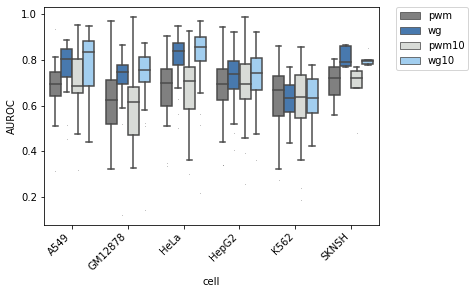

In [3]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
# www=['TSS1500','TSS200',  "5'UTR",'ExonBnd']
indir='../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_delta0'
traces= glob.glob(indir+'/test/*_PRE_window_methyl_great10.txt',recursive = True)
# indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for i,trace in enumerate(traces):
#     trace=traces[jac]
    TSS=(traces[i]).split('/')[9]
    TSS=(TSS).split('_')[0]
#     region=(trace).split('/')[5]
#     depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep=',',names=['cell','TF','pwm','wg','pwm10','wg10','fullsize','size10','yes'])
#     meltbox['TSS']=TSS
#     print(pd.unique(meltbox.cell))
#     meltbox['buffer']=buffer
    
#     meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox00=pd.melt(allbox, id_vars=['cell','TF','fullsize','size10','yes'], value_vars=['pwm','wg','pwm10','wg10'])
allbox00['AUROC']=allbox00['value']
del allbox00['value']
# allbox11=pd.melt(allbox, id_vars=['cell','size','yes'], value_vars=['pwm','pwm10'])
# allbox22=pd.melt(allbox, id_vars=['cell','size','yes'], value_vars=['wg','wg10'])
# allbox33=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['array'])




# allbox11=allbox11[allbox11.cell!='overlap']
# allbox11['AUROC']=allbox11['value']
# del allbox11['value']
# aa=allbox11[allbox11['TSS']==www[0]]
# bb=allbox11[allbox11['TSS']==www[1]]
# cc=allbox11[allbox11['TSS']==www[2]]
# dd=allbox11[allbox11['TSS']==www[3]]
# # ee=allbox11[allbox11['TSS']==www[4]]
# allboxx11=pd.concat([aa,bb,cc,dd])#,ee])

# allbox22=allbox22[allbox22.cell!='overlap']
# allbox22['AUROC']=allbox22['value']
# del allbox22['value']
# aa=allbox22[allbox22['TSS']==www[0]]
# bb=allbox22[allbox22['TSS']==www[1]]
# cc=allbox22[allbox22['TSS']==www[2]]
# dd=allbox22[allbox22['TSS']==www[3]]
# # ee=allbox22[allbox22['TSS']==www[4]]
# allboxx22=pd.concat([aa,bb,cc,dd])#,ee])

# allbox33=allbox33[allbox33.cell!='overlap']
# allbox33['AUROC']=allbox33['value']
# del allbox33['value']
# aa=allbox33[allbox33['TSS']==www[0]]
# bb=allbox33[allbox33['TSS']==www[1]]
# cc=allbox33[allbox33['TSS']==www[2]]
# dd=allbox33[allbox33['TSS']==www[3]]
# ee=allbox33[allbox33['TSS']==www[4]]
# allboxx33=pd.concat([aa,bb,cc,dd,ee])
allbox00=allbox00.sort_values(['cell','variable'], axis=0)
aa=allbox00[allbox00['variable']=='pwm']
bb=allbox00[allbox00['variable']=='wg']
cc=allbox00[allbox00['variable']=='pwm10']
dd=allbox00[allbox00['variable']=='wg10']
allbox00=pd.concat([aa,bb,cc,dd])
plt.xticks(rotation=30)
g=sns.boxplot(x='cell',y=method.upper(), data=allbox00,hue='variable',fliersize = .1,palette=['grey',sns.xkcd_rgb["windows blue"],sns.xkcd_rgb["light grey"],sns.xkcd_rgb["light blue"]])
# g=sns.boxplot(x='region',y=method.upper(), data=allbox2,hue='data',palette=['grey',sns.xkcd_rgb["windows blue"],'orange'])

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('PWM')
plt.show()

# h=sns.boxplot(x='TSS',y=method.upper(), data=allboxx22,hue='cell',fliersize = .1)
# h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('WGBS')
# plt.show()

# j=sns.boxplot(x='TSS',y=method.upper(), data=allboxx33,hue='cell',fliersize = .1)
# j.set_xticklabels(j.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('Array')
# plt.show()
# plt.xticks(rotation=30)


In [74]:
aa=allbox00[allbox00['variable']=='pwm']
bb=allbox00[allbox00['variable']=='wg']
pwm_med = aa.groupby(['cell'])[method.upper()].median()
wg_med = bb.groupby(['cell'])[method.upper()].median()
# me_med = cc.groupby(['cell'])[method.upper()].median()
[pwm_med,pwm_med-wg_med]

[cell
 A549       0.675708
 GM12878    0.646664
 HeLa       0.700702
 HepG2      0.651493
 K562       0.631897
 Name: AUROC, dtype: float64,
 cell
 A549      -0.138780
 GM12878   -0.102018
 HeLa      -0.128784
 HepG2     -0.087678
 K562       0.000588
 Name: AUROC, dtype: float64]

In [82]:
np.mean(allbox00['size10'])

466634.24666666664

In [73]:
aa=allbox00[allbox00['variable']=='pwm10']
bb=allbox00[allbox00['variable']=='wg10']
pwm_med = aa.groupby(['cell'])[method.upper()].median()
wg_med = bb.groupby(['cell'])[method.upper()].median()
# me_med = cc.groupby(['cell'])[method.upper()].median()
[pwm_med,pwm_med-wg_med]

[cell
 A549       0.675005
 GM12878    0.639158
 HeLa       0.707343
 HepG2      0.667426
 K562       0.629679
 Name: AUROC, dtype: float64,
 cell
 A549      -0.162211
 GM12878   -0.122422
 HeLa      -0.141780
 HepG2     -0.076910
 K562      -0.006344
 Name: AUROC, dtype: float64]

## straight PWM benchmark

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'NRF1', 0.7873474854338247, 448597, 3656]
AUROC calculated for NRF1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'ETV4', 0.6050278848933538, 2180985, 1176]
AUROC calculated for ETV4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'STAT5A', 0.6467834539107373, 2339089, 1464]
AUROC calculated for STAT5A in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ZBED1', 0.720149607250007, 113867, 142]
AUROC calculated for ZBED1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'E2F4', 0.7045732370288814, 777011, 202]
AUROC calculated for E2F4 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'CREB3', 0.6886728383460367, 462389, 182]
AUROC calculated for CREB3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['HepG2', 'USF2', 0.8213462076144051, 1116871, 25128]
AUROC calculated for USF2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'E2F8', 0.5466506082012855, 1061569, 226]
AUROC calculated for E2F8 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'ELK1', 0.7943323955188595, 510023, 1176]
AUROC calculated for ELK1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'RFX1', 0.7496786378454904, 949945, 16038]
AUROC calculated for RFX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'MXI1', 0.6829146303988615, 872279, 908]
AUROC calculated for MXI1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'CEBPZ', 0.685786692639993, 1175589, 24]
AUROC calculated for CEBPZ in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['GM12878', 'SRF', 0.7379349450940075, 1454133, 17602]
AUROC calculated for SRF in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'TBX5', 0.49617068948456516, 2008707, 1150]
AUROC calculated for TBX5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'NR2C2', 0.7434637152312185, 2352039, 2032]
AUROC calculated for NR2C2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'FOS', 0.7106312654570879, 1281653, 4492]
AUROC calculated for FOS in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['GM12878', 'CUX1', 0.5836890248487747, 332463, 12]
AUROC calculated for CUX1 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['GM12878', 'CEBPZ', 0.7095148683967931, 1187941, 128]
AUROC calculated for CEBPZ in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'MAFK', 0.7211611171559246, 1963109, 46346]
AUROC calculated for MAFK in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'DNMT1', 0.6454287188395953, 765603, 8]
AUROC calculated for DNMT1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'AR', 0.6632747213972682, 1756013, 70152]
AUROC calculated for AR in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'HNF4A', 0.7294327391362876, 1840421, 29754]
AUROC calculated for HNF4A in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['SKNSH', 'RFX5', 0.7774744780383585, 2457751, 968]
AUROC calculated for RFX5 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'LEF1', 0.5, 1069411, 208]
AUROC calculated for LEF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'JUND', 0.7683856108968251, 1594813, 32508]
AUROC calculated for JUND in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'IRF1', 0.8223969282134044, 8084909, 11236]
AUROC calculated for IRF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'PAX8', 0.4752152751589353, 660291, 12]
AUROC calculated for PAX8 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'ERG', 0.6430572952795545, 511379, 660]
AUROC calculated for ERG in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'EGR1', 0.6845251871520314, 4142983, 103868]
AUROC calculated for EGR1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['HeLa', 'NFE2L2', 0.8443848348604961, 1554893, 4088]
AUROC calculated for NFE2L2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['GM12878', 'STAT3', 0.8767300948031185, 1489321, 24]
AUROC calculated for STAT3 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'TFDP1', 0.7037921451951287, 462915, 878]
AUROC calculated for TFDP1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['K562', 'ATF2', 0.612917438979191, 242589, 20136]
AUROC calculated for ATF2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'SRF', 0.7671589219792272, 1410393, 2534]
AUROC calculated for SRF in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['K562', 'CREB3L1', 0.7020638961810004, 561277, 520]
AUROC calculated for CREB3L1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'ZBTB33', 0.7519670795756114, 274641, 790]
AUROC calculated for ZBTB33 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['A549', 'SPDEF', 0.633772473269408, 324721, 280]
AUROC calculated for SPDEF in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['HepG2', 'BRCA1', 0.7997614532920303, 255563, 1094]
AUROC calculated for BRCA1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



['GM12878', 'KLF5', 0.5361872273513779, 4110033, 536]
AUROC calculated for KLF5 in GM12878


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyboardInterrupt: 

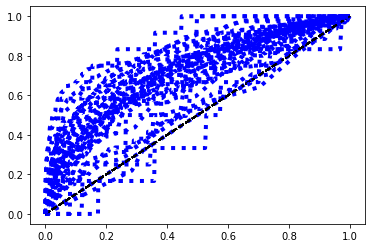

In [5]:
import shutil

indir='../../d/tmp/redmo/data/MotifPipeline/lbk_motif_pipeline_gamma0'
traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
indices = [i for i, s in enumerate(traces) if 'txt' not in s]
www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR"]
aurocs = pd.DataFrame()

dir=(indir+'/test/')
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# trace=traces[0]
for i,trace in enumerate(indices):
    trace=traces[i]
#     plt.subplot(2, 2, 3)
    if 'pc' in trace:
        combo=(trace).split('/')[7]

    elif 'd/tmp' in trace:
        combo=(trace).split('/')[8]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
#     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
#     for TSS in enumerate(www):
    Col1=os.path.basename(trace).split('_')[0] #cell
    Col2=os.path.basename(trace).split('_')[1] #TF
#         TSS=TSS[1]
# #         if Col1=='GM12878':
# #             data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','xxx','body','ChIPTF'])
# #             cc=data.body.str.find(TSS)
# #             cc[cc!=-1]=TSS
# #             data['TSS']=cc
# #             print(Col2+'in'+Col1)
# #         else:
#     try:
#     data=pd.read_csv(trace,sep='\t',skiprows=1,usecols=[0,1,2,3,4,8,9,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'ChIPTF'])#,'body','TSS'])
#                 break
#     data=pd.read_csv(trace,sep=',',names=['cell','TF','pwm','wg','pwm10','wg10','fullsize','size','yes'])
    data=pd.read_csv(trace,sep='\t',skiprows=1,usecols=[0,1,2,3,8],names=["chr", "start", "end",'pwm','ChIPTF'])#,'body','TSS'])


#     data=data[data['TSS']==TSS]


    table2=[]
    tbl=[]
    tmpTBL2=[]
    tmpTBL=[]
    table3=[]
    tblC=[]
    tmpTBLC=[]
    data.pwm=data.pwm.astype('float')
#     data.pwm=(data['pwm']-data['pwm'].min())/(data['pwm'].max()-data['pwm'].min())
    data=data.fillna(0)
    data.ChIPTF=data.ChIPTF.replace('.',0)
    # print(data.shape)
    data.ChIPTF[(data.ChIPTF==Col2)]=1
    data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
    data.ChIPTF=pd.to_numeric(data.ChIPTF)

    if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

        plt.plot([0, 1], [0, 1], 'k--')
        fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
        roc_auc=metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,
                 label='pwm (area = {0:0.2f})'
                     ''.format(roc_auc),
                 color='b', linestyle=':', linewidth=4)

#         fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
#         roc_auc2=metrics.auc(fpr2, tpr2)
#         plt.plot(fpr2, tpr2,
#                  label='wgbs (area = {0:0.2f})'
#                        ''.format(roc_auc2),
#                  color='r', linestyle=':', linewidth=4)

#         fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.array/100))
#         roc_auc3=metrics.auc(fpr, tpr)
#         plt.plot(fpr, tpr,
#                  label='array (area = {0:0.2f})'
#                      ''.format(roc_auc),
#                  color='g', linestyle=':', linewidth=4)



#             plt.xlabel('False Positive Rate')
#             plt.ylabel('True Positive Rate')
#             plt.title('AUROC for '+TF+' in '+cell)
#             plt.legend(loc="best")

#             plt.show()

        Col1=cell
        Col2=TF
        Col3=roc_auc #motif auroc
#         Col4=roc_auc2
#         Col5=roc_auc3
        Col6=data.shape[0]
        Col7=np.sum(data.ChIPTF)
        column = [Col1, Col2, Col3,Col6,Col7]
        print(column)
        column=np.transpose(pd.DataFrame((column)))
        column.to_csv(indir+'/test/'+'_PRE_window_motif.txt',mode='a',header=False,index=False)
        aurocs=pd.concat([aurocs,column],axis=0)
        print("AUROC calculated for "+TF+" in "+cell)
#     except:
#         pass

## begin regional analysis

In [22]:
# indir="data/MotifPipeline/sthlm_motif_0_QCbeta/"
indir="data/MotifPipeline/sthlm_motif_10000_QCbeta/red/"

outdir="data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/"
traces= glob.glob(indir+'/*')
traces = list(filter(lambda file: os.stat(file).st_size > 0, traces))
for jac,trace in enumerate(traces):
    if (os.path.isfile(trace) & os.stat(trace).st_size != 0):
    #     try:
    # trace='data/MotifPipeline/sthlm_motif_5_QCbeta/red/A549_ATF3'
        data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,15,16],names=["chr", "start", "end",'weight','pval',"hits1",'W1','array','region','gene','ChIPTF'])
        Col1=os.path.basename(trace).split('_')[0] #cell
        Col2=os.path.basename(trace).split('_')[1] #TF
        #         except:
        #             pass
        data.ChIPTF=data.ChIPTF.replace('.',0)
        data.ChIPTF[(data.gene==Col2)]=1
        data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
        data.ChIPTF=pd.to_numeric(data.ChIPTF)
        if np.sum(data.ChIPTF)>5:
            try:
        #         data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,15,16],names=["chr", "start", "end",'weight','pval',"hits1",'W1','array','region','gene','ChIPTF'])
        #         Col1=os.path.basename(trace).split('_')[0] #cell
        #         Col2=os.path.basename(trace).split('_')[1] #TF


                data.weight=(data.weight-data.weight.min())/(data.weight.max()-data.weight.min())
                data['wgbs']=data.W1/100
                data.wgbs=1-data.wgbs
                data.array=1-data.array
                data['cell']=Col1#os.path.basename(trace).split('_')[0]
                data['TF']=Col2
                aaa=(data[(data.ChIPTF-data.wgbs)>=-.5]['region']) #FP
                bbb=(data[(data.ChIPTF-data.wgbs)<-.5]['region']) #T
                ccc=(data[(data.ChIPTF-data.wgbs)>=.5]['region']) #FN
                ddd=(data[(data.ChIPTF-data.wgbs)<.5]['region']) #T

                # from collections import Counter
                aa = dict(Counter(aaa))
                bb = dict(Counter(bbb))
                cc = dict(Counter(ccc))
                dd = dict(Counter(ddd))

            #         column = Col1, Col2, Col3, Col4, Col10, Col5, Col6, Col11,Col7,Col8,Col12,Col9,Col13,Col14,Col15,Col16
                column = data.cell[1],data.TF[1],aa['N_Shore'],aa['S_Shore'],aa['OpenSea'],aa['N_Shelf'],aa['Island'],bb['N_Shore'],bb['S_Shore'],bb['OpenSea'],bb['N_Shelf'],bb['Island'],
                cc['N_Shore'],cc['S_Shore'],cc['OpenSea'],cc['N_Shelf'],cc['Island'],dd['N_Shore'],dd['S_Shore'],dd['OpenSea'],dd['N_Shelf'],dd['Island']
            #             table.append(column)
                print("calculating chromosomal region stats for "+Col2+' in '+Col1)

                np.transpose(pd.DataFrame((column))).to_csv(outdir+'/sthlm_regionPRE_indv.txt',mode='a',header=None)#,header=['cell','tf','mauroc','wauroc','meauroc','maupr','waupr','meaupr','size','max_hit','mo_length'])
            except:
                pass



In [135]:
data.weight=(data.weight-data.weight.min())/(data.weight.max()-data.weight.min())
data['wgbs']=data.W1/100
data.wgbs=1-data.wgbs
data.array=1-data.array
data['cell']=Col1#os.path.basename(trace).split('_')[0]
data['TF']=Col2
aaa=(data[(data.ChIPTF-data.wgbs)>=-.5]['region']) #FP
bbb=(data[(data.ChIPTF-data.wgbs)<-.5]['region']) #T
ccc=(data[(data.ChIPTF-data.wgbs)>=.5]['region']) #FN
ddd=(data[(data.ChIPTF-data.wgbs)<.5]['region']) #T
aa = dict(Counter(aaa))
bb = dict(Counter(bbb))
cc = dict(Counter(ccc))
dd = dict(Counter(ddd))
dd

{'OpenSea': 232,
 'S_Shelf': 14,
 'N_Shore': 22,
 'Island': 4,
 'S_Shore': 23,
 'N_Shelf': 12}

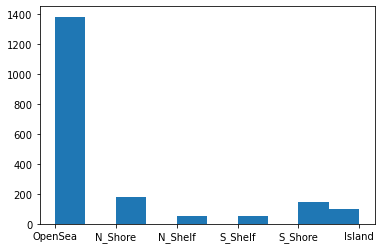

In [3]:
data=pd.read_csv('data/MotifPipeline/sthlm_motif_50_QCbeta/red/SKNSH_ZNF232',sep='\t',usecols=[0,1,2,3,4,8,9,10,11,15,16],names=["chr", "start", "end",'weight','pval',"hits1",'W1','array','region','ChIPTF','gene'])
n=plt.hist(data['region'])


### Fig 3

In [49]:
# t1b, p1b = stats.ttest_ind(aa['AUROC'].dropna(),bb['AUROC'].dropna())
def ttest_plot_region(allboxxx,datatype,regions=[]):

    allbox=allboxxx[allboxxx['data']==datatype]
    # allbox=allbox[allbox['data']=='wg']
    # allbox=allbox[allbox['data']=='me']
    aa=allbox[allbox['region']=='OpenSea']
    bb=allbox[allbox['region']=='N_Shelf']
    cc=allbox[allbox['region']=='N_Shore']
    dd=allbox[allbox['region']=='Island']
    ee=allbox[allbox['region']=='S_Shore']
    ff=allbox[allbox['region']=='S_Shelf']



    t0a, p0a = stats.ttest_ind(aa['AUROC'].dropna(),bb['AUROC'].dropna())
    t0b, p0b = stats.ttest_ind(aa['AUROC'].dropna(),cc['AUROC'].dropna())
    t1a, p1a = stats.ttest_ind(aa['AUROC'].dropna(),dd['AUROC'].dropna())
    t1b, p1b = stats.ttest_ind(aa['AUROC'].dropna(),ee['AUROC'].dropna())
    t2a, p2a = stats.ttest_ind(aa['AUROC'].dropna(),ff['AUROC'].dropna())

    t2b, p2b = stats.ttest_ind(bb['AUROC'].dropna(),cc['AUROC'].dropna())
    t3a, p3a = stats.ttest_ind(bb['AUROC'].dropna(),dd['AUROC'].dropna())
    t3b, p3b = stats.ttest_ind(bb['AUROC'].dropna(),ee['AUROC'].dropna())
    t4a, p4a = stats.ttest_ind(bb['AUROC'].dropna(),ff['AUROC'].dropna())

    t4b, p4b = stats.ttest_ind(cc['AUROC'].dropna(),dd['AUROC'].dropna())
    t5a, p5a = stats.ttest_ind(cc['AUROC'].dropna(),ee['AUROC'].dropna())
    t5b, p5b = stats.ttest_ind(cc['AUROC'].dropna(),ff['AUROC'].dropna())

    t6a, p6a = stats.ttest_ind(dd['AUROC'].dropna(),ee['AUROC'].dropna())
    t6b, p6b = stats.ttest_ind(dd['AUROC'].dropna(),ff['AUROC'].dropna())

    t7a, p7a = stats.ttest_ind(ee['AUROC'].dropna(),ff['AUROC'].dropna())

    # initialise data of lists. 
    ttest = {'OpenSea ttest':[t0a,t0b,t1a,t1b,t2a,1], 
             'N_Shelf ttest':[t2b,t3a,t3b,t4a,1,0],
            'N_Shore ttest':[t4b,t5a,t5b,1,0,0],
            'Island ttest':[t6a,t6b,1,0,0,0],
            'S_Shore ttest':[t7a,1,0,0,0,0],
            'S_Shelf ttest':[1,0,0,0,0,0]}

    pval = {'OpenSea pval':[p0a,p0b,p1a,p1b,p2a,1], 
             'N_Shelf pval':[p2b,p3a,p3b,p4a,1,0],
            'N_Shore pval':[p4b,p5a,p5b,1,0,0],
            'Island pval':[p6a,p6b,1,0,0,0],
            'S_Shore pval':[p7a,1,0,0,0,0],
            'S_Shelf pval':[1,0,0,0,0,0]} 

    # Creates pandas DataFrame. 
    df_ttest = pd.DataFrame(ttest, index =['S_Shelf','S_Shore', 'Island',  'N_Shore','N_Shelf','OpenSea']) 
    df_pval = pd.DataFrame(pval, index =['S_Shelf','S_Shore', 'Island',  'N_Shore','N_Shelf','OpenSea']) 

    # df_ttest = pd.DataFrame(ttest, index =['OpenSea','N_Shelf', 'N_Shore', 'Island', 'S_Shore','S_Shelf']) 
    # df_pval = pd.DataFrame(pval, index =['OpenSea','N_Shelf', 'N_Shore', 'Island', 'S_Shore','S_Shelf']) 
    df_pval.index='pwm_'+df_pval.index

    df_pval_pwm=df_pval
    return df_pval_pwm


### Fig ST2

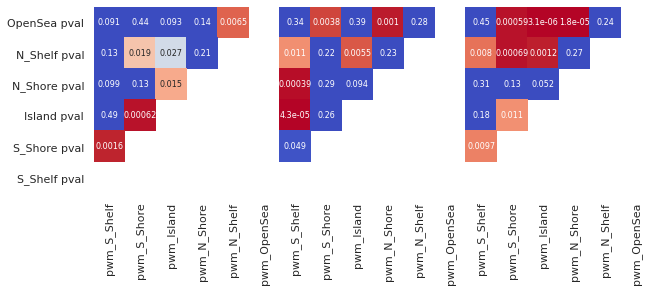

In [50]:
df_pval_pwm=ttest_plot_region(allboxxx,'pwm')
df_pval_wg=ttest_plot_region(allboxxx,'wg')
df_pval_me=ttest_plot_region(allboxxx,'me')

allPval=pd.concat([df_pval_pwm,df_pval_wg,df_pval_me])

mask = np.zeros_like(allPval)
mask[np.triu_indices_from(allPval)] = True
cc=pd.DataFrame(np.flip(mask[0:6,0:6],axis=0))
mask=np.array(pd.concat([cc.T,cc.T,cc.T]))

sns.set(font_scale=1)

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 7))
    
    ax = sns.heatmap(allPval.T/2,annot=True,mask=mask.T,cbar=False,
                     vmax=.05, square=True,cmap='coolwarm_r',
                    annot_kws={"size":8})
#     plt.xticks(rotation=30)

# FIg S6

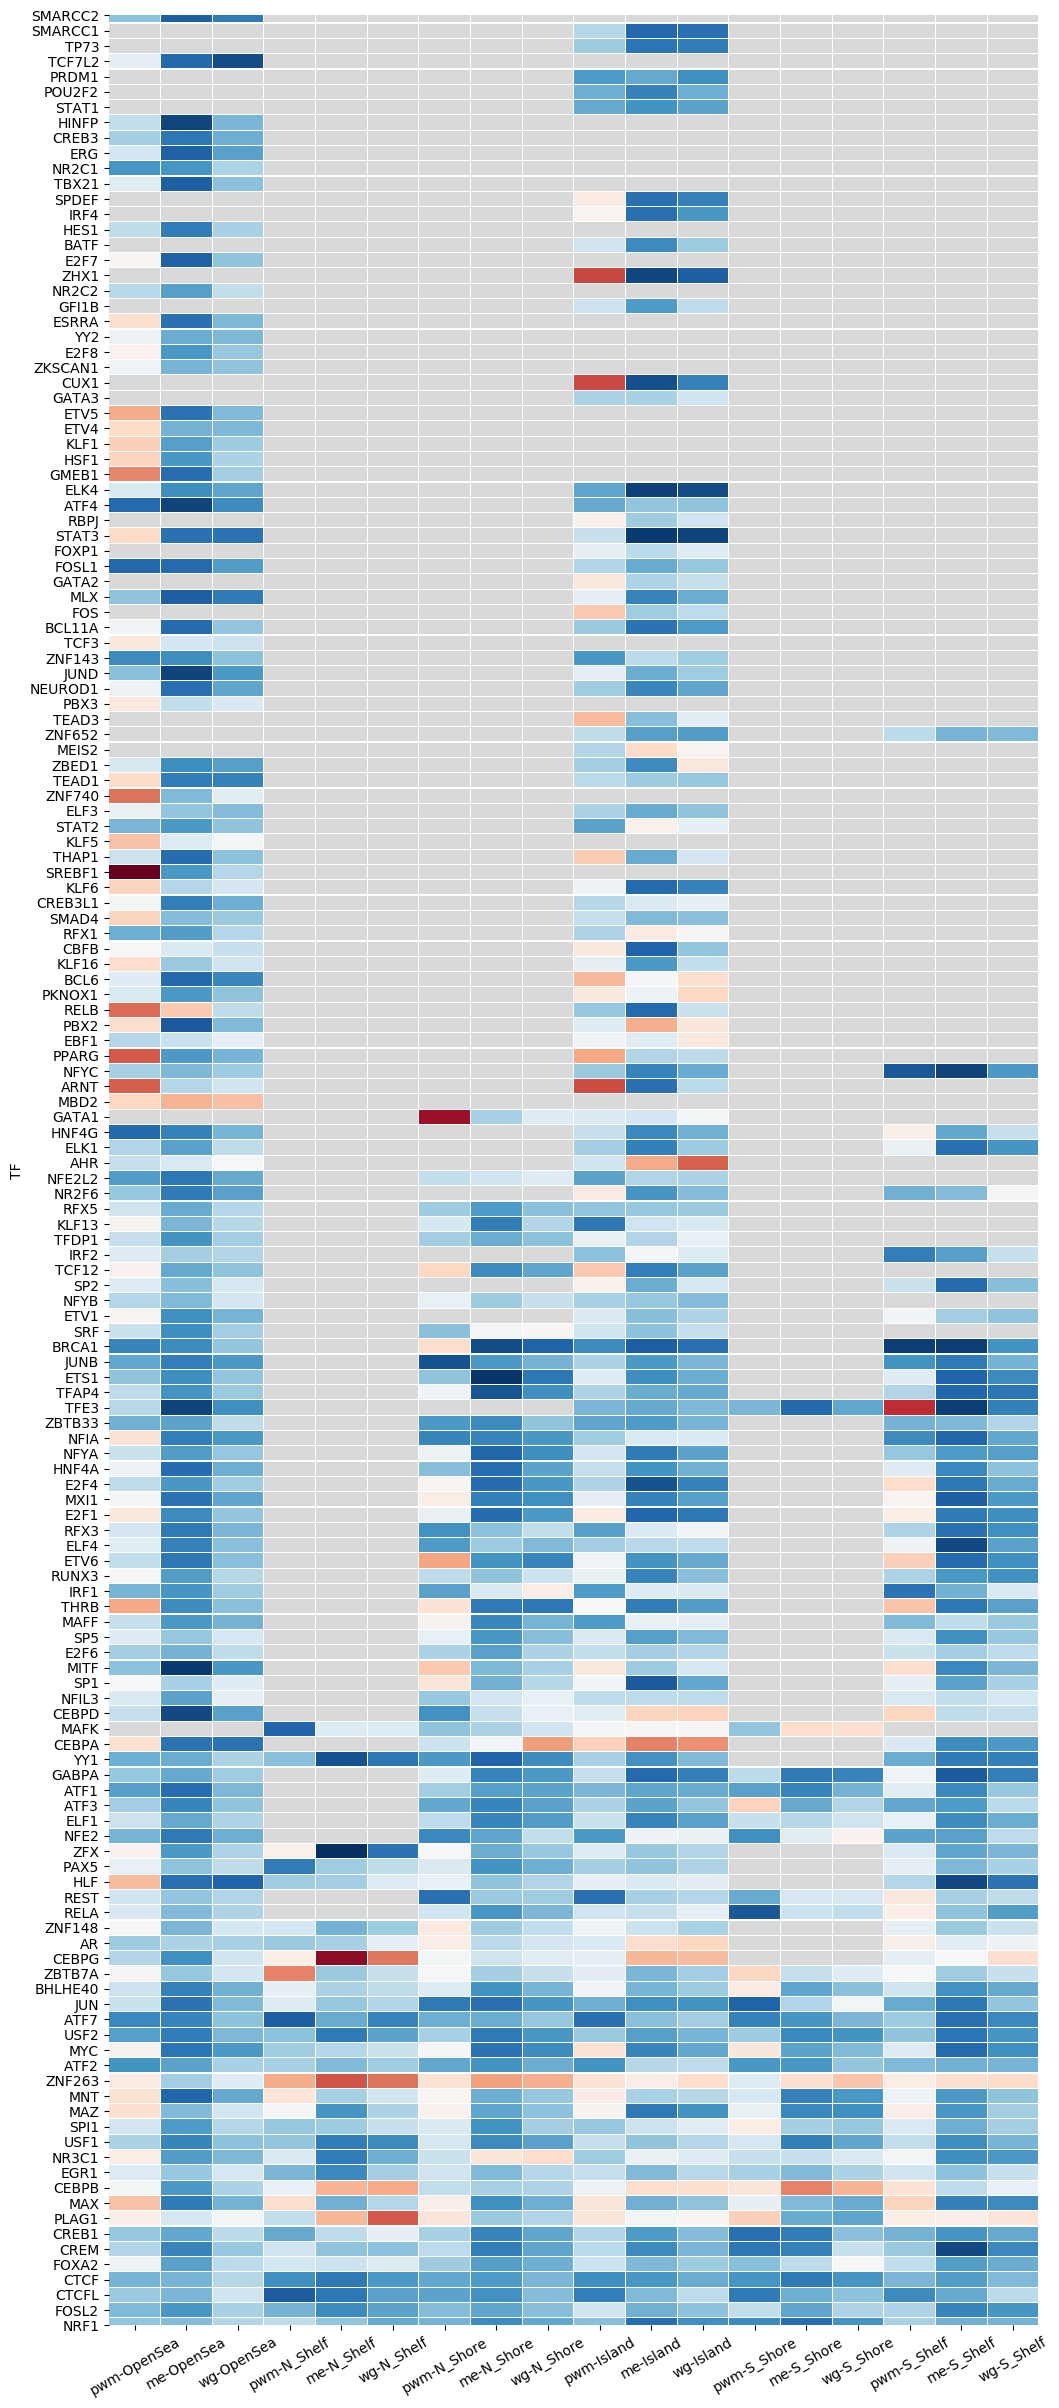

In [81]:
allbox=pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/**/all/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_PRE_overall' in s]
measure='auroc'

for jac in (indices):
    trace=traces[jac]
    aurocs=pd.read_table(trace,sep=',',usecols=[1,2,3,4,5],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc'])#,'mo_aupr','wgbs_aupr','me_aupr','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_auroc','tr_me_auroc','tr_wg_aupr','tr_me_aupr'])
    aurocs=aurocs[aurocs.cell!='0']
    aurocs['region']=(trace.split('/')[5])
    
#     if measure=='auroc':
#         aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc'],axis=1,inplace=True)
#     elif measure=='aupr':
#         aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr',],axis=1,inplace=True)

    allbox=pd.concat([allbox,aurocs],axis=0)
    ###PLOT
    # measure="wg_auroc"
    # measure='auroc'

    ##sum across cells and sort
allbox=allbox[allbox['region']!='all']
heat=allbox.pivot_table(index=['TF'], columns='region')
# heat=heat[[measure]]
heat['mean']=np.nanmean(heat,axis=1)
heat['count']=heat.isnull().sum(axis=1)
#     heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
heat['weight']=heat['mean']*(heat['count'])
heat=heat.sort_values(by=['weight'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
heat=heat.dropna(axis=1, how='all')
del heat['count']
del heat['mean']
del heat['weight']
# heat['sum']=heat.isnull().sum(axis=0)
# heat=heat.sort_values(by=['sum'],ascending=True)
# del heat['sum']
heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','me-OpenSea','me-N_Shelf','me-N_Shore','me-Island','me-S_Shore','me-S_Shelf',
             'pwm-OpenSea','pwm-N_Shelf','pwm-N_Shore','pwm-Island','pwm-S_Shore','pwm-S_Shelf',
             'wg-OpenSea','wg-N_Shelf','wg-N_Shore','wg-Island','wg-S_Shore','wg-S_Shelf']

# heat=heat[['TF','pwm-OpenSea','pwm-N_Shelf','pwm-N_Shore','pwm-Island','pwm-S_Shore','pwm-S_Shelf',
#           'me-OpenSea','me-N_Shelf','me-N_Shore','me-Island','me-S_Shore','me-S_Shelf',
#              'wg-OpenSea','wg-N_Shelf','wg-N_Shore','wg-Island','wg-S_Shore','wg-S_Shelf']]


heat=heat[['TF','pwm-OpenSea','me-OpenSea','wg-OpenSea',
           'pwm-N_Shelf','me-N_Shelf','wg-N_Shelf',
           'pwm-N_Shore', 'me-N_Shore','wg-N_Shore',
           'pwm-Island','me-Island','wg-Island',
           'pwm-S_Shore','me-S_Shore','wg-S_Shore',
           'pwm-S_Shelf','me-S_Shelf','wg-S_Shelf']]
heat55=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# rdgn=sns.color_palette("RdBu", 100)
rdgn = plt.get_cmap("RdBu")
rdgn.set_bad(color='black', alpha=0.15)
# f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
g1 = sns.heatmap(heat,linewidth=.1,cmap=rdgn, cbar=False,mask=heat.isnull(),yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)

# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

#     plt.savefig(outdir+"sthlm_"+measure+"_heat.png",dpi=300,bbox_inches = "tight")
plt.show

#     print([(heat55['pwm-OpenSea'].dropna().shape),(heat55['pwm-N_Shelf'].dropna().shape),(heat55['pwm-N_Shore'].dropna().shape),(heat55['pwm-Island'].dropna().shape),(heat55['pwm-S_Shore'].dropna().shape),(heat55['pwm-S_Shelf'].dropna().shape)])

box=heat55

### Fig S4B

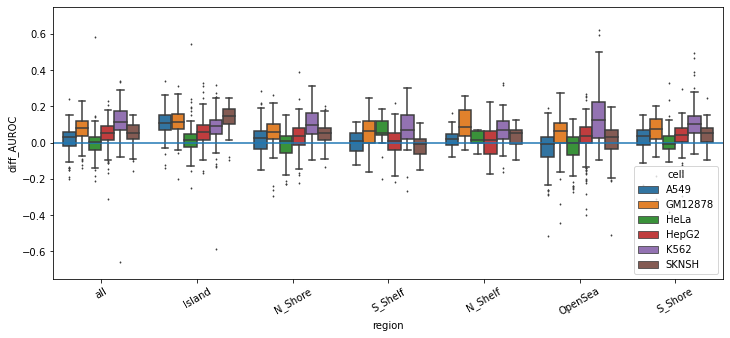

In [8]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/**/all/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox2=allbox.sort_values('cell', axis=0)
# for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='cell')
    
# allbox2=allbox[allbox['cell']==cell]
#     allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
#     allbox2=allbox2[allbox2['data']!='me']
# allbox2=allbox2.sort_values('data', axis=0)
aa=allbox2[allbox2['data']=='pwm']
bb=allbox2[allbox2['data']=='wg']
cc=allbox2[allbox2['data']=='me']
dd=(cc.merge(bb,left_on=['TF','region'],right_on=['TF','region']))
dd['diff_AUROC']=(dd['AUROC_x']-dd['AUROC_y'])
dd['data']='me-wg'
dd['depth']=dd['depth_y']
dd['cell']=dd['cell_y']
allbox2=pd.concat([dd])
g=sns.boxplot(x='region',y='diff_AUROC', data=allbox2,hue='cell',fliersize=1)#.set(title = cell)
# g=sns.swarmplot(x='cell',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
plt.axhline(y=0, xmin=-1, xmax=6)

g.set(ylim=(-.75, .75))
#     plt.title=it
#     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

In [ ]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/**/all/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
# plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
# it='me'
for cell in cells:
    allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='buffer')
#     allbox2=allbox[allbox['cell line']!='']
    allbox2=allbox2[allbox2['region']!='all']

    # allbox2=allbox2.sort_values('region', axis=0)

    aa=allbox2[allbox2['region']=='OpenSea']
    bb=allbox2[allbox2['region']=='N_Shelf']
    cc=allbox2[allbox2['region']=='N_Shore']
    dd=allbox2[allbox2['region']=='Island']
    ee=allbox2[allbox2['region']=='S_Shore']
    ff=allbox2[allbox2['region']=='S_Shelf']
    allbox2=pd.concat([aa,bb,cc,dd,ee,ff])

    aa=allbox2[allbox2['data']=='pwm']
    bb=allbox2[allbox2['data']=='wg']
    cc=allbox2[allbox2['data']=='me']
    allbox2=pd.concat([aa,bb,cc])

    g=sns.boxplot(x='region',y=method.upper(), data=allbox2,hue='data',palette=['grey',sns.xkcd_rgb["windows blue"],'orange'])#
#     g=sns.swarmplot(x='region',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
    medians = allbox2.groupby(['region'])['AUROC'].median().values
    nobs = np.array([allbox2[(allbox2['region']=='OpenSea')]['AUROC'].dropna().shape[0],
allbox2[(allbox2['region']=='N_Shelf')]['AUROC'].dropna().shape[0],
allbox2[(allbox2['region']=='N_Shore')]['AUROC'].dropna().shape[0],
allbox2[(allbox2['region']=='Island')]['AUROC'].dropna().shape[0],
allbox2[(allbox2['region']=='S_Shore')]['AUROC'].dropna().shape[0],
allbox2[(allbox2['region']=='S_Shelf')]['AUROC'].dropna().shape[0]])
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        g.text(pos[tick], medians[tick] - 0.5, nobs[tick],
        horizontalalignment='center', size='medium', color='r', weight='semibold')
    g.set(ylim=(-0.1, 1.1))
    g.set(title = cell)
    #     plt.title=it
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

In [10]:
CGcont=pd.read_table('tmp1.txt',sep=' ',names=['CG','total','motif','gene'])
type(CGcont['CG'])
# CGcont['frac_CG']=CGcont['CG']/CGcont['total']
# CGcont=CGcont[CGcont['CG'] == int]

# cc=np.log10(CGcont[CGcont['CG']>0]['total'])
# plt.hist(cc,bins=50)
# plt.title(str(cc.shape)+' of 733 have some CGs')
# plt.xlabel('log CG count')
# plt.ylabel('frequency')

pandas.core.series.Series

Text(0, 0.5, 'frequency')

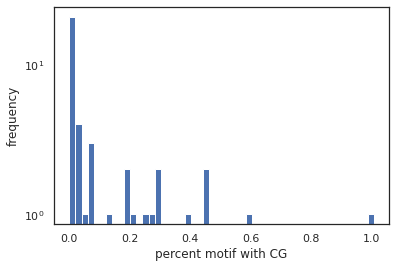

In [27]:
plt.hist(CGcont['CG']/CGcont['total'],bins=50,log=True)
plt.xlabel('percent motif with CG')
plt.ylabel('frequency')

## back to original cell line specific AUROC analysis

In [152]:
from mili_benchmark.predScore import predScore

RR,DD=predScore(indir,outdir,'mean',cell,TF,None,None)

In [60]:
CGcont=CGcont.sort_values(by=['CG_pre'],ascending=False)
# CGcont=CGcont.sort_values(by=['CG_pre'],ascending=True)


In [61]:
CGcont

CG   total  motif    gene    CG_pre
41   473006  473007  M0609   DNMT1  0.999998
213  473006  473007  M0609   DNMT1  0.999998
180  370391  370392  M0196   NPAS2  0.999997
512  328567  328568  M5634     MNT  0.999997
753  322546  322547  M6352    MYCN  0.999997
..      ...     ...    ...     ...       ...
72        0  431157  M0943     OTP  0.000000
19        0  317000  M0395  ZNF187  0.000000
574       0  370206  M5945    VAX2  0.000000
69        0  750254  M0931    LHX1  0.000000
818       0  607562  M6440   PRRX2  0.000000

[882 rows x 5 columns]

### Fig S5

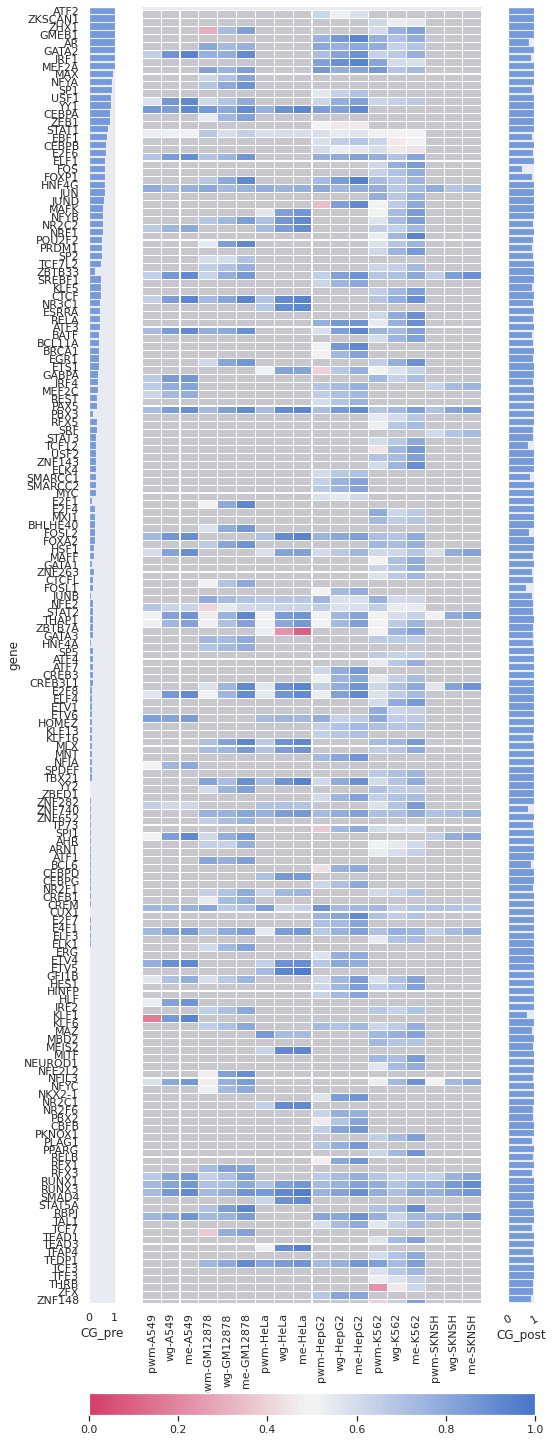

In [62]:
measure='auroc'
aurocs=pd.read_table('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/'+'all'+'/'+'all'+'/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,3,4,5,6,7,8,18,19,20,21,22,23,24,25,26,27],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr',
    'rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_auroc','tr_me_auroc','tr_wg_aupr','tr_me_aupr'])
aurocs=aurocs[aurocs.cell!='0']

###change second last label to factor wgbs >10 reads threshold remove wgbs_auroc rather than tr_wg_auroc
if measure=='auroc':
    aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc'],axis=1,inplace=True)
elif measure=='aupr':
    aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr',],axis=1,inplace=True)

CGcont=pd.read_table('data/MotifPipeline/total_CGandNonCont.txt',sep=' ',names=['CG','total','motif','gene'])
CGcont['CG_pre']=CGcont['CG']/CGcont['total']
CGcont=CGcont[CGcont.CG_pre<=1]

CGcont2=pd.read_table('data/MotifPipeline/CGcont.txt',sep=' ',names=['CG','total','motif','gene'])
CGcont2['CG_post']=CGcont2['CG']/CGcont2['total']
###PLOT
# measure="wg_auroc"
# measure='auroc'

##sum across cells and sort
heat=aurocs.pivot_table(index=['TF'], columns='cell')
# heat=heat[[measure]]
# heat['mean']=np.nanmean(heat,axis=1)
# heat['count']=heat.isnull().sum(axis=1)
# heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
# heat['weight']=heat['mean']*(heat['count'])
# heat=heat.sort_values(by=['weight'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
heat=heat.dropna(axis=1, how='all')
# del heat['count']
# del heat['mean']
# del heat['weight']
# heat['sum']=heat.isnull().sum(axis=0)
# heat=heat.sort_values(by=['sum'],ascending=True)
# del heat['sum']
heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
             'pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
             'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

# heat=heat[['TF','pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#           'me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]


heat=heat[['TF','pwm-A549','wg-A549','me-A549',
           'pwm-GM12878','wg-GM12878','me-GM12878',
           'pwm-HeLa', 'wg-HeLa','me-HeLa',
           'pwm-HepG2','wg-HepG2','me-HepG2',
           'pwm-K562','wg-K562','me-K562',
           'pwm-SKNSH','wg-SKNSH','me-SKNSH']]
heat55=heat
heat=heat.set_index('TF')
# heat.sort_values(by='pwm-A549',ascending=False,inplace=True)
# heat=heat.iloc[::-1]

# plt.figure(figsize=(8, 30))
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(8, 30),gridspec_kw={'width_ratios':[0.08,1,0.08]})
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
rdgn=sns.diverging_palette(0.5, 255, sep=8, n=256,as_cmap=True)#sns.color_palette("RdBu",norm=DivergingNorm(0.5))

# offset=colors.DivergingNorm(vmin=0.0, vcenter=0.5, vmax=1.0)
# rdgn = plt.get_cmap("RdBu")
rdgn.set_bad(color='black', alpha=0.15)

# im = ax1.imshow(heat, norm=DivergingNorm(0.5), cmap=rdgn, interpolation='none')
# fig.colorbar(im)
# rdgn.set_bad(color='red')

CGcont=CGcont.sort_values(by=['CG_pre'],ascending=False)
# CGcont['CG_pre']

g2 = sns.barplot(x='CG_pre',y='gene',color='cornflowerblue',data=CGcont[CGcont['gene'].isin(heat.index)].dropna(),ax=ax1,linewidth=.1,errwidth=0,capsize=0,ci=None)

# g2.xticks(rotation=30)
g1 = sns.heatmap(heat,linewidth=.1,cmap=rdgn, vmin=0, vmax=1,cbar=False,mask=heat.isnull(),yticklabels=True,ax=ax2)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
g1.set(ylabel=None)
# for p in g2.patches:
#     height = p.get_height()
#     g2.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}'.format(height),
#             ha="center") 
# plt.show

g3 = sns.barplot(x='CG_post',y='gene',color='cornflowerblue',data=CGcont2[CGcont2['gene'].isin(heat.index)].dropna(),ax=ax3,linewidth=.1,errwidth=0,capsize=0,ci=None)
g3.set(ylabel=None)
# g3.xticks(rotation=30)
# for p in g3.patches:
#     height = p.get_height()
#     g3.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}'.format(height),
#             ha="center") 
# plt.show

mappable = g1.get_children()[0]
plt.colorbar(mappable, ax = [g2,g1,g3],orientation = 'horizontal',pad=.055) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)

# for ax in [g1,g2,g3]:
#     tl = ax.get_xticklabels()
#     ax.set_xticklabels(tl, rotation=30)
#     tly = ax.get_yticklabels()
#     ax.set_yticklabels(tly, rotation=0)

# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

# plt.savefig(outdir+"camb_"+measure+"_heat.png",dpi=300,bbox_inches = "tight")
plt.show()

# print([(heat55['pwm-A549'].dropna().shape),(heat55['pwm-GM12878'].dropna().shape),(heat55['pwm-HeLa'].dropna().shape),(heat55['pwm-HepG2'].dropna().shape),(heat55['pwm-K562'].dropna().shape),(heat55['pwm-SKNSH'].dropna().shape)])

box=heat55
# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
meltbox=pd.melt(box,id_vars=['TF'])
# # del box.TF
# if measure=='auroc':
#     meltbox.columns=['TF','data - cell line','AUROC']
#     plt.figure(figsize=(18, 5))
#     plt.xticks(rotation=30)
#     g=sns.boxplot(x='data - cell line',y='AUROC', data=meltbox)
#     g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox,
#                   size=2, color=".3", linewidth=0)
# elif measure=='aupr':
#     meltbox.columns=['TF','data - cell line','AUPR']
#     plt.figure(figsize=(12, 5))
#     plt.xticks(rotation=30)
#     g=sns.boxplot(x='data - cell line',y='AUPR', data=meltbox)
#     g=sns.swarmplot(x='data - cell line',y='AUPR', data=meltbox,
#                   size=2, color=".3", linewidth=0)
# g.set(ylim=(0, 1))
# plt.savefig(outdir+"sthlm_"+measure+"_box.png",dpi=300,bbox_inches = "tight")
# # meltbox.to_csv(outdir+measure+"meltbox.txt")

# plt.show
# # Tweak the visual presentation
# # ax.xaxis.grid(True)
# # ax.set(ylabel="")
# sns.despine(trim=True, left=True)

### Fig 2

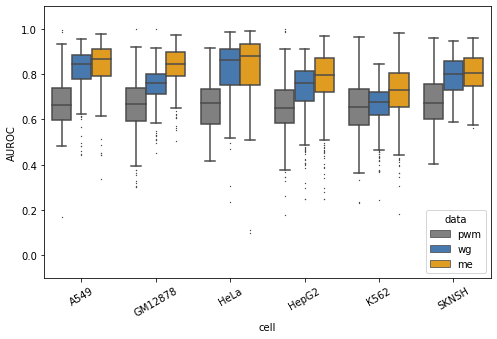

In [10]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# allbox=allbox[allbox['depth'].astype(np.int64)>10]
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(8, 5))
plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox2=allbox.sort_values('cell', axis=0)
# for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='cell')
    
# allbox2=allbox[allbox['cell']==cell]
#     allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
#     allbox2=allbox2[allbox2['data']!='me']
# allbox2=allbox2.sort_values('data', axis=0)
aa=allbox2[allbox2['data']=='pwm']
bb=allbox2[allbox2['data']=='wg']
cc=allbox2[allbox2['data']=='me']
allbox2=pd.concat([aa,bb,cc])
g=sns.boxplot(x='cell',y=method.upper(), data=allbox2,hue='data',fliersize = .5,palette=['grey',sns.xkcd_rgb["windows blue"],'orange'])#.set(title = cell)
# g=sns.swarmplot(x='cell',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
g.set(ylim=(-0.1, 1.1))

# x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
# y, h, col = allbox2['AUROC'].max() , .1, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

#     plt.title=it
#     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

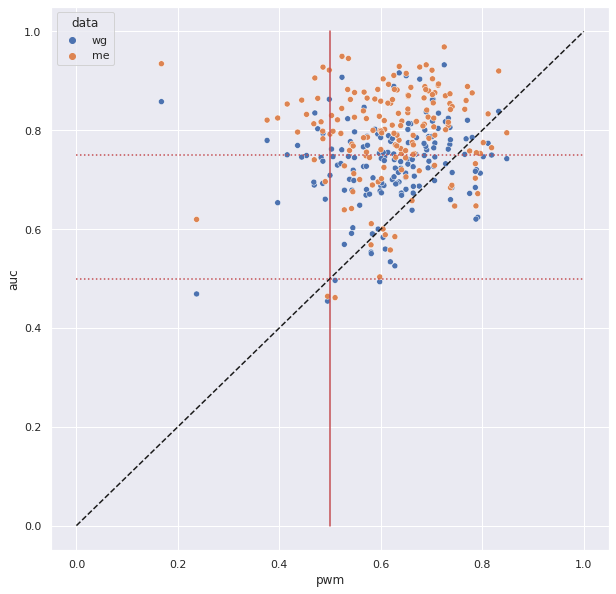

In [66]:
pwmmm=np.mean(heat[heat.columns[heat.columns.str.contains('pwm')]],axis=1)
wgbsss=np.mean(heat[heat.columns[heat.columns.str.contains('wg')]],axis=1)
meee=np.mean(heat[heat.columns[heat.columns.str.contains('me')]],axis=1)
invData=pd.DataFrame([pwmmm,wgbsss,meee]).transpose()
invData.columns=['pwm','wg','me']

plt.figure(figsize=(10, 10))
# fig, ax = plt.subplots()
invData['TF']=invData.index
invData2=pd.melt(invData,id_vars=['TF','pwm'])
invData2.columns=['TF','pwm','data','auc']
sns.scatterplot(
    data=invData2, x="pwm", y='auc', hue='data',# size="diff",
    sizes=(200, 200), legend='full'
)
plt.plot([0,1], [0.75,0.75], 'r:')#.add_legend().set_axis_labels("x", "y")
plt.plot([0.5,0.5],[0,1], 'r-')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,1], [0.5,0.5], 'r:')
# ax.fill_between(.5*invData2.auc, [0.5],1, alpha=0.2)

### all wgbs reads

In [17]:
pwm_med = aa.groupby(['cell'])[method.upper()].median()
wg_med = bb.groupby(['cell'])[method.upper()].median()
me_med = cc.groupby(['cell'])[method.upper()].median()
[np.round(pwm_med-wg_med,4),np.round(pwm_med-me_med,4)]

[cell
 A549      -0.1821
 GM12878   -0.0906
 HeLa      -0.1901
 HepG2     -0.1083
 K562      -0.0214
 SKNSH     -0.1303
 Name: AUROC, dtype: float64,
 cell
 A549      -0.2044
 GM12878   -0.1781
 HeLa      -0.2075
 HepG2     -0.1458
 K562      -0.0770
 SKNSH     -0.1332
 Name: AUROC, dtype: float64]

### WGBS read > 10

In [15]:
pwm_med = aa.groupby(['cell'])[method.upper()].median()
wg_med = bb.groupby(['cell'])[method.upper()].median()
me_med = cc.groupby(['cell'])[method.upper()].median()
[np.round(pwm_med-wg_med,4),np.round(pwm_med-me_med,4)]

[cell
 A549      -0.1818
 GM12878   -0.0816
 HeLa      -0.1863
 HepG2     -0.0901
 K562       0.0250
 SKNSH     -0.1442
 Name: AUROC, dtype: float64,
 cell
 A549      -0.1951
 GM12878   -0.1733
 HeLa      -0.2012
 HepG2     -0.1039
 K562      -0.0158
 SKNSH     -0.1287
 Name: AUROC, dtype: float64]

In [ ]:
pwmmm=np.mean(heat[heat.columns[heat.columns.str.contains('pwm')]],axis=1)
wgbsss=np.mean(heat[heat.columns[heat.columns.str.contains('wg')]],axis=1)
meee=np.mean(heat[heat.columns[heat.columns.str.contains('me')]],axis=1)
heat2=np.transpose([wgbsss-pwmmm,meee-wgbsss])
heat2=pd.DataFrame(heat2,columns=['wg-pwm','me-pwm'],index=heat.index)
plt.figure(figsize=(3, 30))
heat3=heat2['me-pwm']
# del heat2['me-pwm']
# heat4['mean']=np.mean([heat4['wg-pwm'],heat4['me-pwm']],axis=0)
heat2=heat2.sort_index()#(by=heat2.index,ascending=False)
ax = sns.heatmap(heat2,linewidth=.1,center=0,cmap='RdBu',yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
plt.xticks(rotation=30)


In [ ]:
heat3=pd.DataFrame(heat3)
heat3=heat3.sort_values(by=['me-pwm'],ascending=False)
plt.figure(figsize=(.5, 30))
ax = sns.heatmap(heat3,linewidth=.1,center=0,cmap='RdBu',yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
plt.xticks(rotation=30)

### subset performing worse than PWM

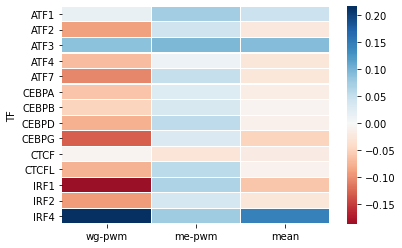

In [246]:
heat4=heat2[(heat2.index.str.contains('IRF'))|(heat2.index.str.contains('CTCF'))|
      (heat2.index.str.contains('ATF'))|(heat2.index.str.contains('CEB'))]
heat4=heat4[(heat4.index.str.contains('BATF'))==False]
heat4['mean']=np.mean([heat4['wg-pwm'],heat4['me-pwm']],axis=0)
heat4
ax = sns.heatmap(heat4,linewidth=.1,center=0,cmap='RdBu',yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})


In [327]:
# heat3=heat[(heat.index.str.contains('IRF'))|(heat.index.str.contains('CTCF'))|
#       (heat.index.str.contains('ATF'))|(heat.index.str.contains('CEB'))]
# heat4=heat4[(heat4.index.str.contains('BATF'))==False]
# heat4['mean']=np.mean([heat4['wg-pwm'],heat4['me-pwm']],axis=0)
# heat4
# ax = sns.heatmap(heat4,linewidth=.1,center=0,cmap='RdBu',yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
# heat3
pwmmm=np.mean(heat[heat.columns[heat.columns.str.contains('pwm')]],axis=1)
wgbsss=np.mean(heat[heat.columns[heat.columns.str.contains('wg')]],axis=1)
meee=np.mean(heat[heat.columns[heat.columns.str.contains('me')]],axis=1)
invData=pd.DataFrame([pwmmm,wgbsss,meee]).transpose()
invData.columns=['pwm','wg','me']
subinv=invData[invData['me']<.5]
subinv=subinv[subinv['pwm']>.4]
subinv


pwm        wg        me
TF                                 
CEBPA  0.495076  0.434386  0.464085
MBD2   0.509902  0.623388  0.461302

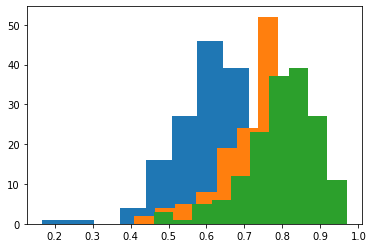

In [328]:
a=plt.hist(invData['pwm'])
b=plt.hist(invData['wg'])
c=plt.hist(invData['me'])

In [329]:
[invData[invData['pwm']<.4] , 
 invData[invData['wg']<.5] ,
 invData[invData['me']<.5] ]

[             pwm        wg        me
 TF                                  
 ZEB1    0.375837  0.878994  0.820513
 SREBF1  0.167489  0.914130  0.934581
 ZNF740  0.396693  0.758353  0.824766
 ZNF282  0.236812  0.493268  0.619583,
              pwm        wg        me
 TF                                  
 AHR     0.627718  0.409683  0.584687
 CEBPA   0.495076  0.434386  0.464085
 ZNF282  0.236812  0.493268  0.619583
 CEBPG   0.597839  0.469946  0.503230,
             pwm        wg        me
 TF                                 
 CEBPA  0.495076  0.434386  0.464085
 MBD2   0.509902  0.623388  0.461302]

# which data has largest overall signal

In [32]:
invData[sP]=invData[invData['pwm']]-.5
invData[sW]=invData[invData['wg']]-.5
invData[sA]=invData[invData['wA']]-.5

NameError: name 'invData' is not defined

In [ ]:
a=plt.hist(invData['sP'])
b=plt.hist(invData['sW'])
c=plt.hist(invData['sA'])

<AxesSubplot:xlabel='pwm', ylabel='auc'>

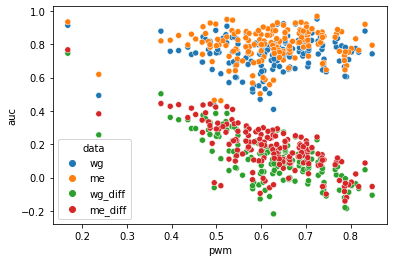

In [351]:
# invData['methyl-mean']=np.nanmean([invData['me'],invData['me']],axis=0)
# invData['wg_diff']=invData['wg']-invData['pwm']
# invData['me_diff']=invData['me']-invData['pwm']
invData['TF']=invData.index
invData2=pd.melt(invData,id_vars=['TF','pwm'])
invData2.columns=['TF','pwm','data','auc']
sns.scatterplot(
    data=invData2, x="pwm", y='auc', hue='data',# size="diff",
    sizes=(200, 200), legend='full'
)
# # invData

In [362]:

invData=pd.DataFrame([pwmmm,wgbsss,meee]).transpose()
invData.columns=['pwm','wg','me']
invData['TF']=invData.index
invData2=pd.melt(invData,id_vars=['TF','pwm'])
invData2.columns=['TF','pwm','data','auc']

fig = px.scatter(invData2, x="pwm", y="auc",
    color="data",
    hover_name="TF")#, log_x=True, size_max=60)
fig.show()

In [6]:
chA549=pd.read_csv('data/MotifPipeline/remap/remap_TFcell.txt',sep=':',names=['TF','cell'])


In [ ]:
# chA549['TF']=(chA549['TF:cell'].str.split(':').str[0].tolist())
# chA549['cell']=(chA549['TF:cell'].str.split(':').str[1].tolist())

In [31]:
sub=chA549[(chA549['cell']=='A-549')|
           (chA549['cell']=='GM12878')|
           (chA549['cell']=='Hep-G2')|
           (chA549['cell']=='HeLa')|
            (chA549['cell']=='K-562')|
            (chA549['cell']=='SK-N-SH')]



In [33]:
pd.unique(sub.cell)

array(['GM12878', 'K-562', 'A-549', 'Hep-G2', 'HeLa', 'SK-N-SH'],
      dtype=object)

In [38]:
remap=sub.groupby(sub.columns.tolist(),as_index=False).size()

In [49]:
reA549=chA549[chA549['cell']=='A-549']
reA549=reA549.groupby(reA549.columns.tolist(),as_index=False).size()

reGM12878=chA549[chA549['cell']=='GM12878']
reGM12878=reGM12878.groupby(reGM12878.columns.tolist(),as_index=False).size()

reHepG2=chA549[chA549['cell']=='Hep-G2']
reHepG2=reHepG2.groupby(reHepG2.columns.tolist(),as_index=False).size()

reHeLa=chA549[chA549['cell']=='HeLa']
reHeLa=reHeLa.groupby(reHeLa.columns.tolist(),as_index=False).size()

reK562=chA549[chA549['cell']=='K-562']
reK562=reK562.groupby(reK562.columns.tolist(),as_index=False).size()

reSKNSH=chA549[chA549['cell']=='SK-N-SH']
reSKNSH=reSKNSH.groupby(reSKNSH.columns.tolist(),as_index=False).size()


[Text(0, 0.5, 'count'), Text(0.5, 0, 'log10 TF reads')]

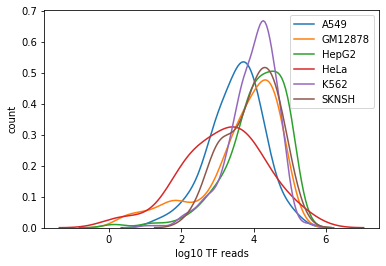

In [69]:
y=sns.distplot(np.log10(reA549),hist=None,kde_kws={"label":'A549'})
y=sns.distplot(np.log10(reGM12878),hist=None,kde_kws={"label":'GM12878'})
y=sns.distplot(np.log10(reHepG2),hist=None,kde_kws={"label":'HepG2'})
y=sns.distplot(np.log10(reHeLa),hist=None,kde_kws={"label":'HeLa'})
y=sns.distplot(np.log10(reK562),hist=None,kde_kws={"label":'K562'})
y=sns.distplot(np.log10(reSKNSH),hist=None,kde_kws={"label":'SKNSH'})
y.set(xlabel='log10 TF reads', ylabel='count')





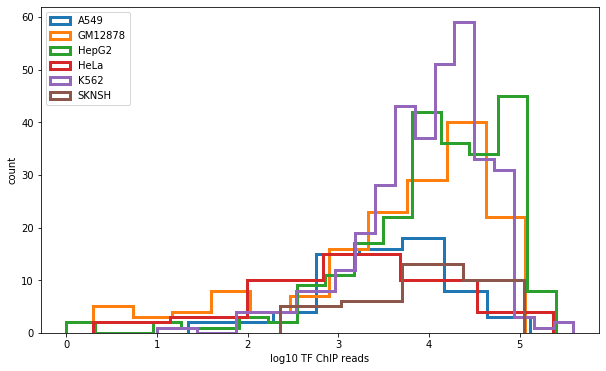

In [86]:
plt.figure(figsize=(10, 6))
x=sns.distplot(np.log10(reA549),kde=0,label='A549',
             hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
x=sns.distplot(np.log10(reGM12878),kde=0,label='GM12878',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
x=sns.distplot(np.log10(reHepG2),kde=0,label='HepG2',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
x=sns.distplot(np.log10(reHeLa),kde=0,label='HeLa',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
x=sns.distplot(np.log10(reK562),kde=0,label='K562',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
x=sns.distplot(np.log10(reSKNSH),kde=0,label='SKNSH',hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})

x.set(xlabel='log10 TF ChIP reads', ylabel='count')
plt.legend(loc='upper left')


## read depth analysis

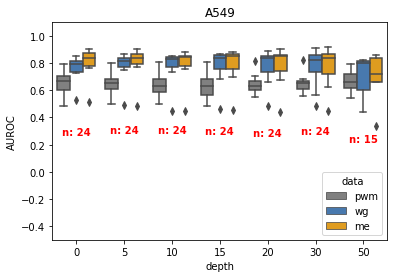

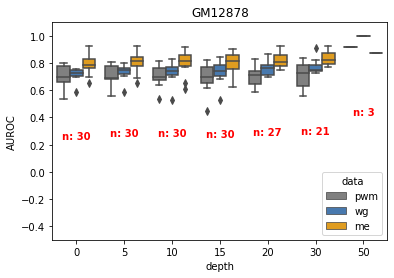

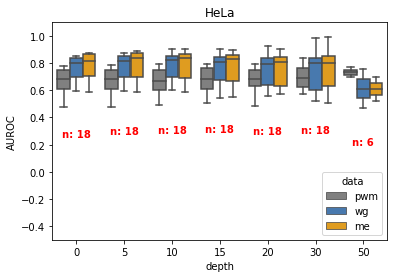

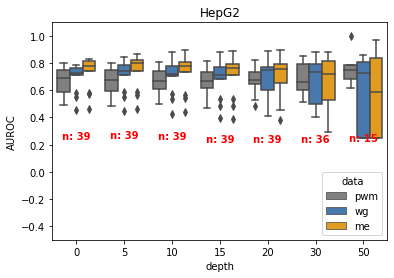

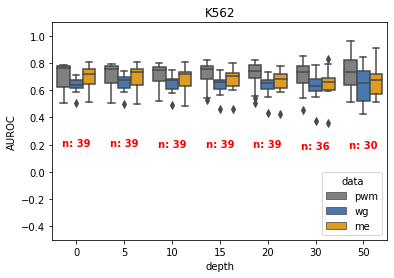

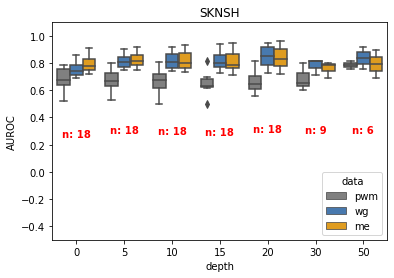

In [967]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)

# plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox=allbox.sort_values('depth', axis=0)
for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='buffer')
#     plt.figure(figsize=(8, 5))
    allbox2=allbox[allbox['cell']==cell]
    allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
#     allbox2=allbox2[allbox2['data']!='me']
    aa=allbox2[allbox2['data']=='pwm']
    bb=allbox2[allbox2['data']=='wg']
    cc=allbox2[allbox2['data']=='me']
#     dd=(cc.merge(bb,left_on=['TF','region'],right_on=['TF','region']))
#     dd['AUROC']=(dd['AUROC_x']-dd['AUROC_y'])
#     dd['data']='me-wg'
#     dd['depth']=dd['depth_y']
    allbox2=pd.concat([aa,bb,cc])
#     cc=allbox2[allbox2['data']=='me']
#     allbox2=pd.concat([aa,bb])
#     allbox3['diff_auroc']=aa[method.upper()]-bb[method.upper()]
#     allbox3['depth']=allbox2['depth'][allbox2['data']=='wg']
#     allbox2=allbox2.sort_values('data', axis=0)

    ax=sns.boxplot(x='depth',y=method.upper(), data=allbox2,hue='data',palette=['grey',sns.xkcd_rgb["windows blue"],'orange','deeppink'])#,fliersize=1,meanline=True)
    medians = allbox2.groupby(['depth'])['AUROC'].median().values
    nobs = np.array([allbox2[(allbox2['depth']==0)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==5)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==10)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==15)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==20)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==30)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==50)]['AUROC'].dropna().shape[0]])
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] - 0.5, nobs[tick],
        horizontalalignment='center', size='medium', color='r', weight='semibold')
    # g=sns.swarmplot(x='depth',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
    ax.set(ylim=(-0.5, 1.1))
    ax.set(title = cell)
    #     plt.title=it
    #     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

In [918]:
np.array([allbox2[(allbox2['depth']==0)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==5)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==10)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==15)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==20)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==30)]['AUROC'].dropna().shape[0],
allbox2[(allbox2['depth']==50)]['AUROC'].dropna().shape[0]])

array([24, 24, 24, 24, 24, 24, 15])

### ST3

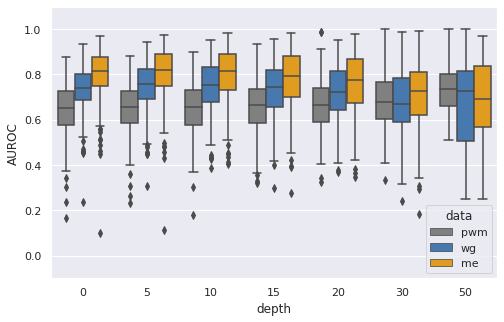

In [54]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)

# plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox=allbox.sort_values('depth', axis=0)
# for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='buffer')
plt.figure(figsize=(8, 5))
allbox2=allbox
# allbox2=allbox[allbox['cell']==cell]
# allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
#     allbox2=allbox2[allbox2['data']!='me']
aa=allbox2[allbox2['data']=='pwm']
bb=allbox2[allbox2['data']=='wg']
cc=allbox2[allbox2['data']=='me']
#     dd=(cc.merge(bb,left_on=['TF','region'],right_on=['TF','region']))
#     dd['AUROC']=(dd['AUROC_x']-dd['AUROC_y'])
#     dd['data']='me-wg'
#     dd['depth']=dd['depth_y']
allbox2=pd.concat([aa,bb,cc])
#     cc=allbox2[allbox2['data']=='me']
#     allbox2=pd.concat([aa,bb])
#     allbox3['diff_auroc']=aa[method.upper()]-bb[method.upper()]
#     allbox3['depth']=allbox2['depth'][allbox2['data']=='wg']
#     allbox2=allbox2.sort_values('data', axis=0)

g=sns.boxplot(x='depth',y=method.upper(), data=allbox2,hue='data',palette=['grey',sns.xkcd_rgb["windows blue"],'orange','deeppink'])
# g=sns.swarmplot(x='depth',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
g.set(ylim=(-0.1, 1.1))
# g.set(title = cell)
#     plt.title=it
#     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
allboxxx=allbox
#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

In [55]:
def ttest_plot_depth(allboxxx,datatype,regions=[]):

    allbox=allboxxx[allboxxx['data']==datatype]
    # allbox=allbox[allbox['data']=='wg']
    # allbox=allbox[allbox['data']=='me']
    aa=allbox[allbox['depth']==0]
    bb=allbox[allbox['depth']==5]
    cc=allbox[allbox['depth']==10]
    dd=allbox[allbox['depth']==15]
    ee=allbox[allbox['depth']==20]
    ff=allbox[allbox['depth']==30]
    gg=allbox[allbox['depth']==50]



    t0a, p0a = stats.ttest_ind(aa['AUROC'].dropna(),bb['AUROC'].dropna())
    t0b, p0b = stats.ttest_ind(aa['AUROC'].dropna(),cc['AUROC'].dropna())
    t1a, p1a = stats.ttest_ind(aa['AUROC'].dropna(),dd['AUROC'].dropna())
    t1b, p1b = stats.ttest_ind(aa['AUROC'].dropna(),ee['AUROC'].dropna())
    t2a, p2a = stats.ttest_ind(aa['AUROC'].dropna(),ff['AUROC'].dropna())
    t2aa, p2aa = stats.ttest_ind(aa['AUROC'].dropna(),gg['AUROC'].dropna())


    t2b, p2b = stats.ttest_ind(bb['AUROC'].dropna(),cc['AUROC'].dropna())
    t3a, p3a = stats.ttest_ind(bb['AUROC'].dropna(),dd['AUROC'].dropna())
    t3b, p3b = stats.ttest_ind(bb['AUROC'].dropna(),ee['AUROC'].dropna())
    t4a, p4a = stats.ttest_ind(bb['AUROC'].dropna(),ff['AUROC'].dropna())
    t4aa, p4aa = stats.ttest_ind(bb['AUROC'].dropna(),gg['AUROC'].dropna())


    t4b, p4b = stats.ttest_ind(cc['AUROC'].dropna(),dd['AUROC'].dropna())
    t5a, p5a = stats.ttest_ind(cc['AUROC'].dropna(),ee['AUROC'].dropna())
    t5b, p5b = stats.ttest_ind(cc['AUROC'].dropna(),ff['AUROC'].dropna())
    t5bb, p5bb = stats.ttest_ind(cc['AUROC'].dropna(),gg['AUROC'].dropna())


    t6a, p6a = stats.ttest_ind(dd['AUROC'].dropna(),ee['AUROC'].dropna())
    t6b, p6b = stats.ttest_ind(dd['AUROC'].dropna(),ff['AUROC'].dropna())
    t6bb, p6bb = stats.ttest_ind(dd['AUROC'].dropna(),gg['AUROC'].dropna())

    t7a, p7a = stats.ttest_ind(ee['AUROC'].dropna(),ff['AUROC'].dropna())
    t7aa, p7aa = stats.ttest_ind(ee['AUROC'].dropna(),gg['AUROC'].dropna())

    t8a, p8a = stats.ttest_ind(ee['AUROC'].dropna(),gg['AUROC'].dropna())


    # initialise data of lists. 
    ttest = {'0 ttest':[t0a,t0b,t1a,t1b,t2a,t2aa,1], 
             '5 ttest':[t2b,t3a,t3b,t4a,t4aa,1,0],
            '10 ttest':[t4b,t5a,t5b,t5bb,1,0,0],
            '15 ttest':[t6a,t6b,t6bb,1,0,0,0],
            '20 ttest':[t7a,t7aa,1,0,0,0,0],
            '30 ttest':[t8a,1,0,0,0,0,0],
            '50 ttest':[1,0,0,0,0,0,0]}

    pval = {'0 pval':[p0a,p0b,p1a,p1b,p2a,p2aa,1], 
             '5 pval':[p2b,p3a,p3b,p4a,p4aa,1,0],
            '10 pval':[p4b,p5a,p5b,p5bb,1,0,0],
            '15 pval':[p6a,p6b,p6bb,1,0,0,0],
            '20 pval':[p7a,p7aa,1,0,0,0,0],
            '30 pval':[p8a,1,0,0,0,0,0],
            '50 pval':[1,0,0,0,0,0,0]} 

    # Creates pandas DataFrame. 
    df_ttest = pd.DataFrame(ttest, index =['50','30', '20',  '15','10','5','0']) 
    df_pval = pd.DataFrame(pval, index =['50','30', '20',  '15','10','5','0']) 

    # df_ttest = pd.DataFrame(ttest, index =['OpenSea','N_Shelf', 'N_Shore', 'Island', 'S_Shore','S_Shelf']) 
    # df_pval = pd.DataFrame(pval, index =['OpenSea','N_Shelf', 'N_Shore', 'Island', 'S_Shore','S_Shelf']) 
    df_pval.index='pwm_'+df_pval.index

    df_pval_pwm=df_pval
    return df_pval_pwm

### ST3

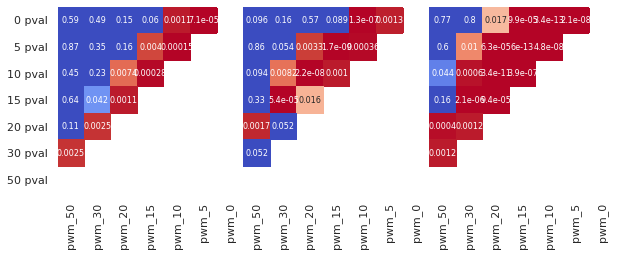

In [63]:
df_pval_pwm=ttest_plot_depth(allboxxx,'pwm')
df_pval_wg=ttest_plot_depth(allboxxx,'wg')
df_pval_me=ttest_plot_depth(allboxxx,'me')

allPval=pd.concat([df_pval_pwm,df_pval_wg,df_pval_me])

mask = np.zeros_like(allPval)
mask[np.triu_indices_from(allPval)] = True
cc=pd.DataFrame(np.flip(mask[0:7,0:7],axis=0))
mask=np.array(pd.concat([cc.T,cc.T,cc.T]))

sns.set(font_scale=1)

sns.set(font_scale=1)

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 7))
    
    ax = sns.heatmap(allPval.T,annot=True,mask=mask.T,cbar=False,
                     vmax=.05, square=True,cmap='coolwarm_r',
                    annot_kws={"size":8})
#     plt.xticks(rotation=30)

In [416]:
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
# plt.figure(figsize=(12, 5))
# plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox=allbox.sort_values('depth', axis=0)

In [ ]:
# aa=allbox[(allbox['data']=='pwm')&(allbox['cell']=='A549')]
# len((allbox[(allbox['data']=='pwm')&(allbox['cell']=='SKNSH')]['TF']))
# bb=allbox[(allbox['data']=='wg')&(allbox['cell']=='A549')]
# pd.DataFrame(aa['AUROC']-bb['AUROC']).dropna()
# bb.dropna()
# allbox=allbox[allbox['cell']=='A549']
cells=np.sort((pd.unique(allbox['cell'])).tolist())
# for cell in cells:
allbox2=allbox[allbox['cell']==cell]
allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
allbox2['merge']=allbox2['TF']+'_'+allbox2['depth'].astype('str')+allbox2['cell']
aa=allbox2[allbox2['data']=='wg']
bb=allbox2[allbox2['data']=='pwm']
cc=aa.merge(bb,left_on='merge',right_on='merge')
cc['diff_AUROC']=cc['AUROC_x']-cc['AUROC_y']
g=sns.boxplot(x='depth_x',y='diff_AUROC', hue=cell,data=cc).set(title = cell)
plt.show()

### Fig SM3

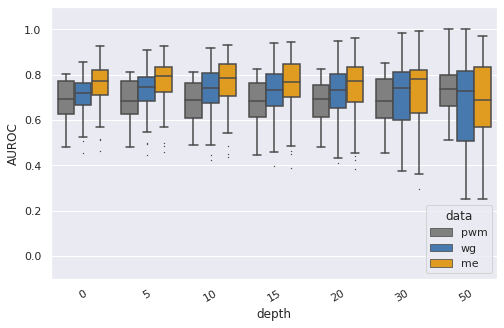

In [96]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(8, 5))
plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox=allbox.sort_values('depth', axis=0)
# for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='buffer')
aa=allbox[allbox['data']=='pwm']
bb=allbox[allbox['data']=='wg']
cc=allbox[allbox['data']=='me']
allbox2=pd.concat([aa,bb,cc])
#     allbox2=allbox[allbox['cell']==cell]
allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
# allbox2=allbox2[allbox2['data']!='me']
#     allbox2=allbox2.sort_values('data', axis=0)

g=sns.boxplot(x='depth',y=method.upper(), data=allbox2,hue='data',fliersize = .5,palette=['grey',sns.xkcd_rgb["windows blue"],'orange'])#.set(title = cell)
# g=sns.swarmplot(x='depth',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
g.set(ylim=(-0.1, 1.1))
#     plt.title=it
#     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

In [208]:
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/*',recursive = True)
for trace in (traces):
    data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,15,16],names=["chr", "start", "end",'weight','pval',"depth",'W1','array','region','ChIPTF','gene'])
    data5=data[data['depth']>5]
    data10=data[data['depth']>10]
    data20=data[data['depth']>20]
    data30=data[data['depth']>30]
    data50=data[data['depth']>50]
    print(os.path.basename(trace),[data5.shape,data10.shape,data20.shape,data30.shape,data50.shape])

HeLa_FOXI1 [(661, 11), (513, 11), (231, 11), (93, 11), (5, 11)]
HeLa_E2F7 [(3238, 11), (2583, 11), (1203, 11), (544, 11), (69, 11)]
HeLa_HOXD9 [(0, 11), (0, 11), (0, 11), (0, 11), (0, 11)]
HeLa_CLOCK [(5746, 11), (4795, 11), (2548, 11), (1102, 11), (140, 11)]
HeLa_NFAT5 [(2405, 11), (1864, 11), (949, 11), (429, 11), (54, 11)]
A549_HOXB5 [(16, 11), (15, 11), (8, 11), (7, 11), (3, 11)]
HeLa_ARID3C [(150, 11), (134, 11), (92, 11), (55, 11), (6, 11)]
HepG2_TBX21 [(2126, 11), (1455, 11), (413, 11), (132, 11), (5, 11)]
SKNSH_SP5 [(6692, 11), (3295, 11), (1119, 11), (438, 11), (74, 11)]
SKNSH_RFX6 [(775, 11), (479, 11), (210, 11), (88, 11), (16, 11)]
GM12878_SNAI2 [(0, 11), (0, 11), (0, 11), (0, 11), (0, 11)]
GM12878_KLF2 [(11248, 11), (7447, 11), (2055, 11), (331, 11), (2, 11)]
K562_CREB3L2 [(13844, 11), (11369, 11), (5250, 11), (1748, 11), (200, 11)]
SKNSH_GATA2 [(621, 11), (475, 11), (256, 11), (155, 11), (46, 11)]
HepG2_ZFHX2 [(69, 11), (63, 11), (33, 11), (8, 11), (0, 11)]
GM12878_NFATC3

KeyboardInterrupt: 

### Fig S4D

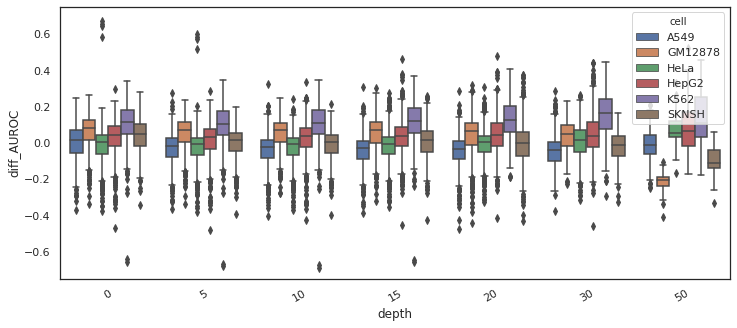

In [23]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox2=allbox.sort_values('cell', axis=0)
# for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='cell')
    
# allbox2=allbox[allbox['cell']==cell]
#     allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
#     allbox2=allbox2[allbox2['data']!='me']
# allbox2=allbox2.sort_values('data', axis=0)
aa=allbox2[allbox2['data']=='pwm']
bb=allbox2[allbox2['data']=='wg']
cc=allbox2[allbox2['data']=='me']
dd=(cc.merge(bb,left_on=['TF','region'],right_on=['TF','region']))
dd['diff_AUROC']=(dd['AUROC_x']-dd['AUROC_y'])
dd['data']='me-wg'
dd['depth']=dd['depth_y']
dd['cell']=dd['cell_y']
allbox2=pd.concat([dd])
sns.set_style("white")
g=sns.boxplot(x='depth',y='diff_AUROC', data=allbox2,hue='cell')#.set(title = cell)
# g=sns.swarmplot(x='cell',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
g.set(ylim=(-.75, .75))
#     plt.title=it
#     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

### Fig S7

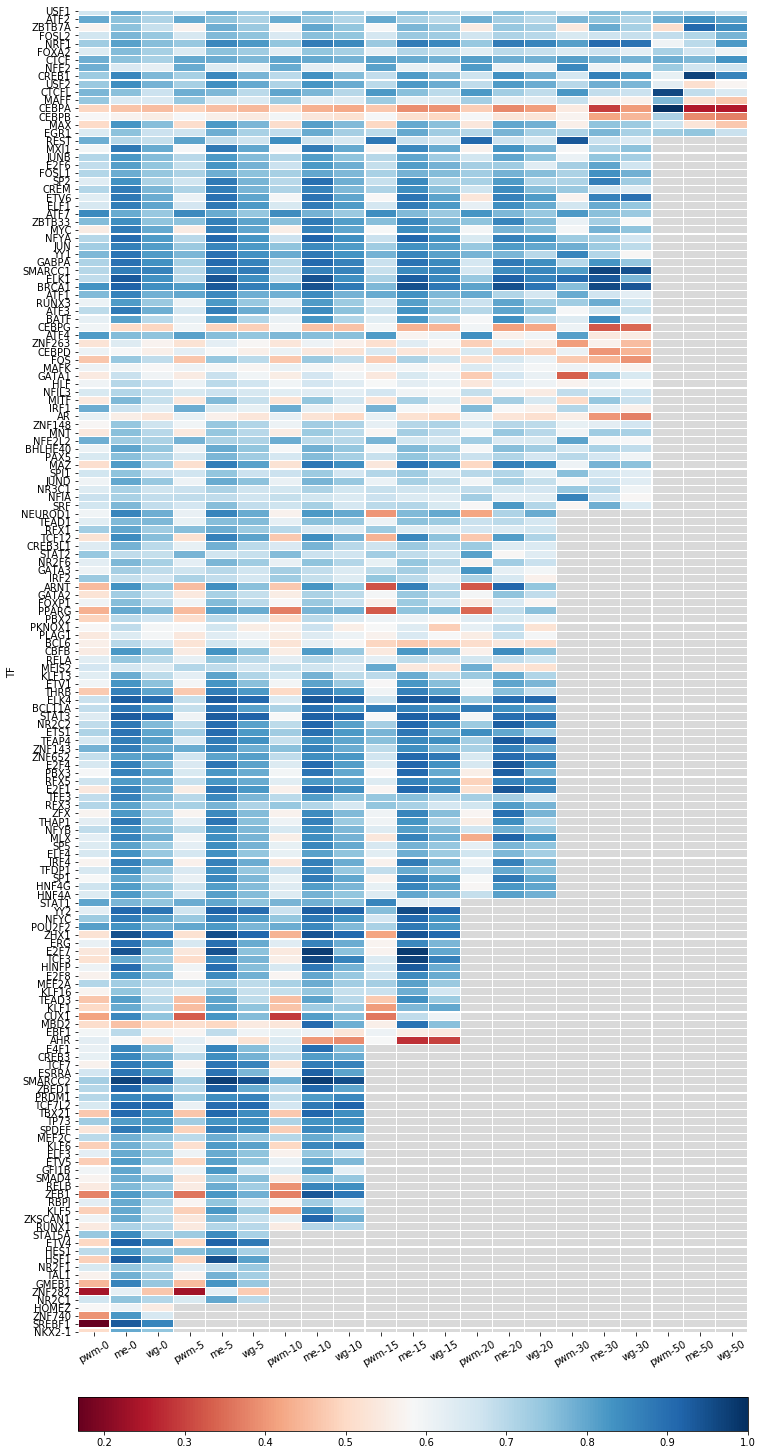

In [195]:
allbox=pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/all/**/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'sthlm_PRE_overall' in s]
measure='auroc'

for jac in (indices):
    trace=traces[jac]
    aurocs=pd.read_table(trace,sep=',',usecols=[1,2,3,4,5],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc'])#,'mo_aupr','wgbs_aupr','me_aupr','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_auroc','tr_me_auroc','tr_wg_aupr','tr_me_aupr'])
    aurocs=aurocs[aurocs.cell!='0']
    aurocs['depth']=(trace.split('/')[6])
    
#     if measure=='auroc':
#         aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc'],axis=1,inplace=True)
#     elif measure=='aupr':
#         aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr',],axis=1,inplace=True)

    allbox=pd.concat([allbox,aurocs],axis=0)
    ###PLOT
    # measure="wg_auroc"
    # measure='auroc'

    ##sum across cells and sort
# allbox=allbox[allbox['depth']!='all']
allbox['depth']=allbox['depth'].replace('all',0)
allbox.depth=allbox.depth.astype(int)
allbox=allbox.sort_values(by='depth')

heat=allbox.pivot_table(index=['TF'], columns='depth')
# heat=heat[[measure]]
heat['mean']=np.nanmean(heat,axis=1)
heat['count']=heat.isnull().sum(axis=1)
#     heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
heat['weight']=heat['mean']*(heat['count'])
heat=heat.sort_values(by=['weight'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
# heat=heat.dropna(axis=1, how='all')
del heat['count']
del heat['mean']
del heat['weight']
heat['sum']=heat.isnull().sum(axis=1)
heat=heat.sort_values(by=['sum'],ascending=True)
del heat['sum']
heat=pd.DataFrame(heat.to_records())


heat.columns=['TF','me-0','me-5','me-10','me-15','me-20','me-30','me-50',
             'pwm-0','pwm-5','pwm-10','pwm-15','pwm-20','pwm-30','pwm-50',
             'wg-0','wg-5','wg-10','wg-15','wg-20','wg-30','wg-50']

# heat=heat[['TF','pwm-0','pwm-5','pwm-10','pwm-20','pwm-30','pwm-50',
#           'me-0','me-5','me-10','me-20','me-30','me-50',
#              'wg-0','wg-5','wg-10','wg-20','wg-30','wg-50']]


heat=heat[['TF','pwm-0','me-0','wg-0',
           'pwm-5','me-5','wg-5',
           'pwm-10', 'me-10','wg-10',
           'pwm-15', 'me-15','wg-15',
           'pwm-20','me-20','wg-20',
           'pwm-30','me-30','wg-30',
           'pwm-50','me-50','wg-50']]
heat55=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# rdgn=sns.color_palette("RdBu", 100)
rdgn = plt.get_cmap("RdBu")
rdgn.set_bad(color='black', alpha=0.15)
# rdgn.set_bad(color='red')

ax = sns.heatmap(heat,linewidth=.1,cmap=rdgn, cbar=False,mask=heat.isnull(),yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)
# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

#     plt.savefig(outdir+"sthlm_"+measure+"_heat.png",dpi=300,bbox_inches = "tight")
plt.show

#     print([(heat55['pwm-OpenSea'].dropna().shape),(heat55['pwm-N_Shelf'].dropna().shape),(heat55['pwm-N_Shore'].dropna().shape),(heat55['pwm-Island'].dropna().shape),(heat55['pwm-S_Shore'].dropna().shape),(heat55['pwm-S_Shelf'].dropna().shape)])

box=heat55

In [557]:
P=stats.f_oneway(box['pwm-0'].dropna(),box['pwm-5'].dropna(),box['pwm-10'].dropna(),box['pwm-20'].dropna(),box['pwm-30'].dropna(),box['pwm-50'].dropna())
W=stats.f_oneway(box['wg-0'].dropna(),box['wg-5'].dropna(),box['wg-10'].dropna(),box['wg-20'].dropna(),box['wg-30'].dropna(),box['wg-50'].dropna())
A=stats.f_oneway(box['me-0'].dropna(),box['me-5'].dropna(),box['me-10'].dropna(),box['me-20'].dropna(),box['me-30'].dropna(),box['me-50'].dropna())

[P,W,A]


[F_onewayResult(statistic=4.244071488394406, pvalue=0.0008401777965445997),
 F_onewayResult(statistic=8.486759389948162, pvalue=8.769273065900511e-08),
 F_onewayResult(statistic=10.645830192381577, pvalue=7.896820332242624e-10)]

## CG content analysis

In [89]:
allbox = pd.DataFrame()
dirr='../../d/tmp/redmo/camb_motif_ALL/'
# dirrA='../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_gamma0/

# dirr2='../../d/tmp/redmo/camb_motif_ALL/'
# dirr2A='../../d/tmp/redmo/camb_motif/'
outdir='../../d/tmp/redmo/camb_motif/'
traces= glob.glob(dirr+'CG/'+'*',recursive = False)
# traces2= glob.glob(dirrA+'CG/'+'*',recursive = False)
# traces=traces+traces2
# traces= glob.glob(dirrA+'*',recursive = False)


# trace=traces[0]
for i,trace in enumerate(traces):
#     print(trace)
#     plt.subplot(2, 2, 3)
    combo=trace.split('/')[7]
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
    dataCG=pd.read_csv(trace,sep='\t',names=['pwm','ChIPTF'])

    dataCG.ChIPTF=dataCG.ChIPTF.replace(' ',0)
    dataCG.ChIPTF=dataCG.ChIPTF.fillna(0)
    dataCG.ChIPTF[(dataCG.ChIPTF==TF)]=1
    dataCG=dataCG[(dataCG.ChIPTF==0)|(dataCG.ChIPTF==1)]
    dataCG.ChIPTF=pd.to_numeric(dataCG.ChIPTF)
    
    data_nonCG=pd.read_csv(dirr+'nonCG/'+combo,sep='\t',names=['pwm','ChIPTF'])

    data_nonCG.ChIPTF=data_nonCG.ChIPTF.replace(' ',0)
    data_nonCG.ChIPTF=data_nonCG.ChIPTF.fillna(0)
    data_nonCG.ChIPTF[(data_nonCG.ChIPTF==TF)]=1
    data_nonCG=data_nonCG[(data_nonCG.ChIPTF==0)|(data_nonCG.ChIPTF==1)]
    data_nonCG.ChIPTF=pd.to_numeric(data_nonCG.ChIPTF)

    if np.sum(dataCG.ChIPTF)>5 and np.sum(data_nonCG.ChIPTF)>5:
        plt.plot([0, 1], [0, 1], 'k--')
        fpr, tpr, thresholds = metrics.roc_curve(dataCG.ChIPTF, dataCG.pwm)
        roc_auc=metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,
                 label='CG (area = {0:0.2f})'
                     ''.format(roc_auc),
                 color='b', linestyle=':', linewidth=4)

        fpr2, tpr2, thresholds = metrics.roc_curve(data_nonCG.ChIPTF, data_nonCG.pwm)
        roc_auc2=metrics.auc(fpr2, tpr2)
        plt.plot(fpr2, tpr2,
                 label='nonCG (area = {0:0.2f})'
                       ''.format(roc_auc2),
                 color='r', linestyle=':', linewidth=4)
        
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUROC for '+TF+' in '+cell)
        plt.legend(loc="best")
        
        plt.show()

        Col1=cell
        Col2=TF
        Col3=roc_auc #motif auroc
        Col4=roc_auc2
        column = Col1, Col2, Col3, Col4
        np.transpose(pd.DataFrame((column))).to_csv(outdir+'camb_PRE_overall.txt',mode='a')
        del roc_auc, roc_auc2

### Fig S9

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:87: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))


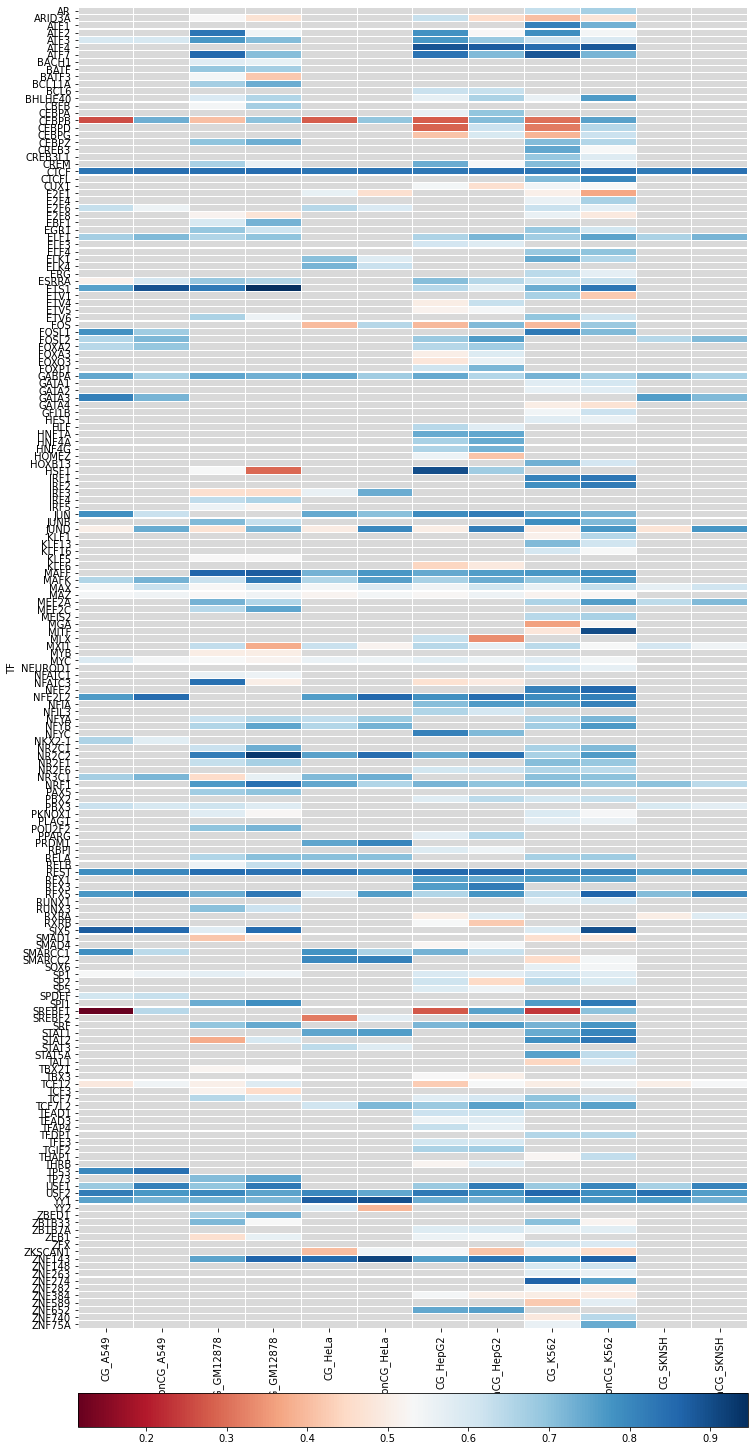

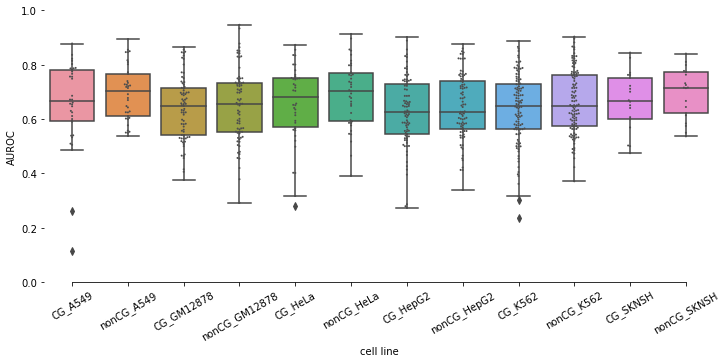

In [44]:
indir="../../d/tmp/redmo/camb_motif/camb_PRE_overall.txt"
# outdir="../../d/tmp/redmo/"
agg_meth='mean'
measure='auroc'
region='all'
depth='all'

aurocs=pd.read_table(indir,sep=',',names=['cell','TF','CG','nonCG'])
aurocs=aurocs[aurocs.cell!='0']

# if measure=='auroc':
#     aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr','rand_mo_aupr','rand_wgbs_aupr','rand_me_aupr','tr_wg_aupr','tr_me_aupr','rand_mo_auroc','rand_wgbs_auroc','rand_me_auroc','tr_wg_auroc','tr_me_auroc'],axis=1,inplace=True)


###PLOT
# measure="wg_auroc"
# measure='auroc'

##sum across cells and sort
# aurocs['diff']=aurocs['CG']-aurocs['nonCG']
heat=aurocs.pivot_table(index=['TF'], columns='cell')
# heat=heat[[measure]]
# heat['mean']=np.nanmean(heat,axis=1)
# heat['count']=heat.isnull().sum(axis=1)
# heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
# heat['diff']=heat['CG']-heat['nonCG']
# heat=heat.sort_values(by=['diff'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
heat=heat.dropna(axis=1, how='all')
# del heat['count']
# del heat['mean']
# del heat['weight']
# heat['sum']=heat.isnull().sum(axis=0)
# heat=heat.sort_values(by=['sum'],ascending=True)
# del heat['sum']
heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','CG_A549','CG_GM12878','CG_HeLa','CG_HepG2','CG_K562','CG_SKNSH',
             'nonCG_A549','nonCG_GM12878','nonCG_HeLa','nonCG_HepG2','nonCG_K562','nonCG_SKNSH']

# # heat=heat[['TF','pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
# #           'me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
# #              'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]

# heat['A549_diff']=GM12878['CG_A549']-GM12878['nonCG_A549']

# heat['GM12878_diff']=heat['CG_GM12878']-heat['nonCG_GM12878']
# heat['HeLa_diff']=heat['CG_HeLa']-heat['nonCG_HeLa']
# heat['HepG2_diff']=heat['CG_HepG2']-heat['nonCG_HepG2']
# heat['K562_diff']=heat['CG_K562']-heat['nonCG_K562']
# heat['SKNSH_diff']=heat['CG_SKNSH']-heat['nonCG_SKNSH']

heat=heat[['TF','CG_A549','nonCG_A549',#'A549_diff',
           'CG_GM12878','nonCG_GM12878',#'GM12878_diff',
           'CG_HeLa','nonCG_HeLa',#'HeLa_diff',
           'CG_HepG2','nonCG_HepG2',#'HepG2_diff',
           'CG_K562','nonCG_K562',#'K562_diff',
           'CG_SKNSH','nonCG_SKNSH'#'SKNSH_diff'
           ]]
heat55=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# rdgn=sns.color_palette("RdBu", 100)
# rdgn = plt.get_cmap("RdBu")
# rdgn.set_bad(color='black', alpha=0.15)
# # rdgn.set_bad(color='red')
# ax = sns.heatmap(heat, center=.5,linewidth=.1,cmap=rdgn,mask=heat.isnull(), cbar=False)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})

# mappable = ax.get_children()[0]
# plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
# plt.xticks(rotation=30)


rdgn = plt.get_cmap("RdBu")
rdgn.set_bad(color='black', alpha=0.15)
# rdgn.set_bad(color='red')

ax = sns.heatmap(heat,linewidth=.1,cmap=rdgn, cbar=False,mask=heat.isnull(),yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40



# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

plt.savefig(outdir+"sthlm_"+measure+"_heat.png",dpi=300,bbox_inches = "tight")
plt.show

# print([(heat55['pwm-A549'].dropna().shape),(heat55['pwm-GM12878'].dropna().shape),(heat55['pwm-HeLa'].dropna().shape),(heat55['pwm-HepG2'].dropna().shape),(heat55['pwm-K562'].dropna().shape)])

box=heat55
# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
meltbox=pd.melt(box,id_vars=['TF'])
# del box.TF
if measure=='auroc':
    meltbox.columns=['TF','cell line','AUROC']
    plt.figure(figsize=(12, 5))
    plt.xticks(rotation=30)
    g=sns.boxplot(x='cell line',y='AUROC', data=meltbox)
    g=sns.swarmplot(x='cell line',y='AUROC', data=meltbox,
                  size=2, color=".3", linewidth=0)
# elif measure=='aupr':
#     meltbox.columns=['TF','data - cell line','AUPR']
#     plt.figure(figsize=(12, 5))
#     plt.xticks(rotation=30)
#     g=sns.boxplot(x='data - cell line',y='AUPR', data=meltbox)
#     g=sns.swarmplot(x='data - cell line',y='AUPR', data=meltbox,
#                   size=2, color=".3", linewidth=0)
g.set(ylim=(0, 1))
plt.savefig(outdir+"camb_heat_CG-non.png",dpi=300,bbox_inches = "tight")
# meltbox.to_csv(outdir+measure+"meltbox.txt")

# plt.show
# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.show()


# t0a, p0a = stats.ttest_ind(box[''].dropna(),box['wg-A549'].dropna())
t0a, p0a = stats.ttest_ind(box['CG_A549'].dropna(),box['nonCG_A549'].dropna())
t1a, p1a = stats.ttest_ind(box['CG_GM12878'].dropna(),box['nonCG_GM12878'].dropna())
# t1b, p1b = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['me-GM12878'].dropna())
t2a, p2a = stats.ttest_ind(box['CG_HeLa'].dropna(),box['nonCG_HeLa'].dropna())
# t2b, p2b = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['me-HeLa'].dropna())
t3a, p3a = stats.ttest_ind(box['CG_HepG2'].dropna(),box['nonCG_HepG2'].dropna())
# t3b, p3b = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['me-HepG2'].dropna())
t4a, p4a = stats.ttest_ind(box['CG_K562'].dropna(),box['nonCG_K562'].dropna())
# t4b, p4b = stats.ttest_ind(box['pwm-K562'].dropna(),box['me-K562'].dropna())
t5a, p5a = stats.ttest_ind(box['CG_SKNSH'].dropna(),box['nonCG_SKNSH'].dropna())


# initialise data of lists. 
ttest = {'CG-nonCG ttest':[t0a,t1a,t2a,t3a,t4a,t5a], 'CG-non pvalue':[p0a,p1a,p2a,p3a,p4a,p5a],}# 'Me ttest':[t0b,t1b,t2b,t3b,t4b],'Me pvalue':[p0b,p1b,p2b,p3b,p4b]} 

# Creates pandas DataFrame. 
df_ttest = pd.DataFrame(ttest, index =['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']) 

df_ttest.to_csv(outdir+"/camb_ttest.txt")
meltbox.to_csv(outdir+"/camb_meltbox.txt",sep='\t')

In [ ]:
df_ttest

## counts per window size ancilary analysis


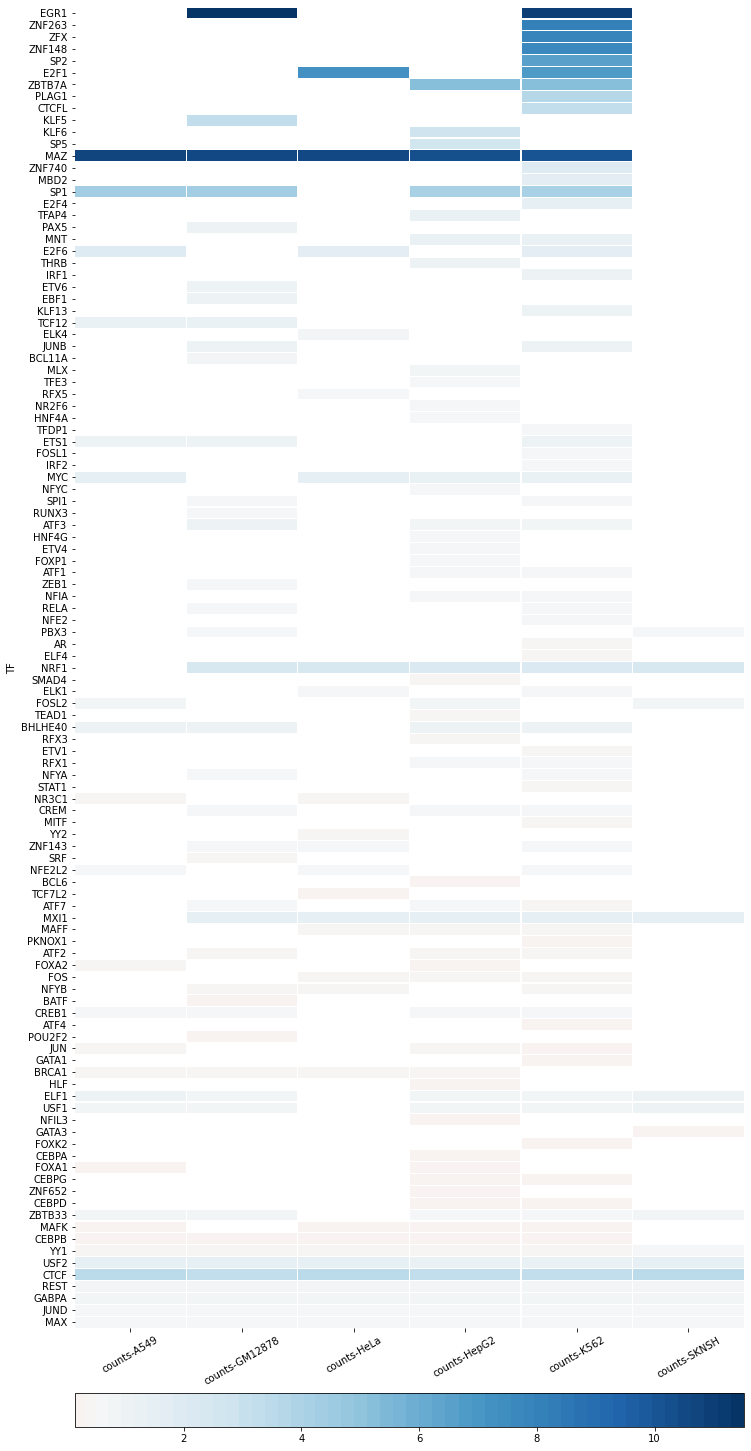

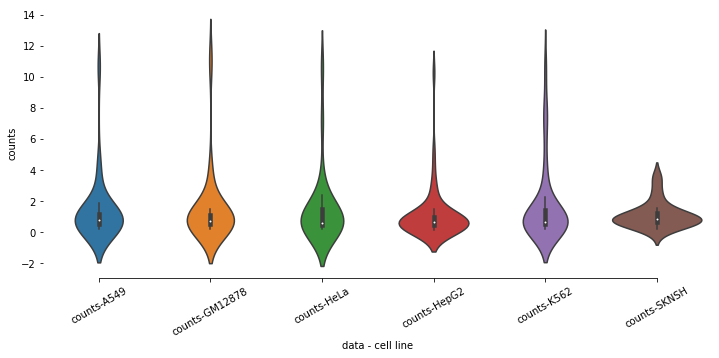

In [50]:

# aurocs.columns=['cell','TF','pwm','wgbs','array','counts']
##sum across cells and sort
heat=aurocs.pivot_table(index=['TF'], columns='cell',aggfunc='first')# heat=heat[[measure]]
heat['mean']=np.nanmean(heat,axis=1)
heat['count']=heat.isnull().sum(axis=1)

heat['weight']=heat['mean']*(heat['count'])
heat=heat.sort_values(by=['weight'],ascending=False)

heat=heat.dropna(axis=1, how='all')
del heat['count']
del heat['mean']
del heat['weight']

heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
              'counts-A549','counts-GM12878','counts-HeLa','counts-HepG2','counts-K562','counts-SKNSH',
              'pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
            'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

heat=heat[['TF','counts-A549','counts-GM12878','counts-HeLa','counts-HepG2','counts-K562','counts-SKNSH']]
heat55=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
rdgn=sns.color_palette("RdBu", 100)
ax = sns.heatmap(heat/10000, center=.5,linewidth=.1,cmap=rdgn, cbar=False)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)

# plt.savefig(indir+"/test/camb_auroc_heat.png",dpi=300,bbox_inches = "tight")
plt.show

# print([(heat55['pwm-A549'].dropna().shape),(heat55['pwm-GM12878'].dropna().shape),(heat55['pwm-HeLa'].dropna().shape),(heat55['pwm-HepG2'].dropna().shape),(heat55['pwm-K562'].dropna().shape),(heat55['pwm-SKNSH'].dropna().shape)])

box=heat55
# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
countbox=pd.melt(box,id_vars=['TF'])
# del box.TF
# if measure=='auroc':
countbox.columns=['TF','data - cell line','counts']
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
g=sns.violinplot(x='data - cell line',y=countbox.counts/10000, data=countbox)
# g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox,
#               size=2, color=".3", linewidth=0)
plt.xticks(rotation=30)
# g.set(ylim=(0, 1))
# plt.savefig(indir+"/test/camb_auroc_box.png",dpi=300,bbox_inches = "tight")
countbox.to_csv(outdir+"countbox.txt")

plt.show

sns.despine(trim=True, left=True)
# plt.show()



/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

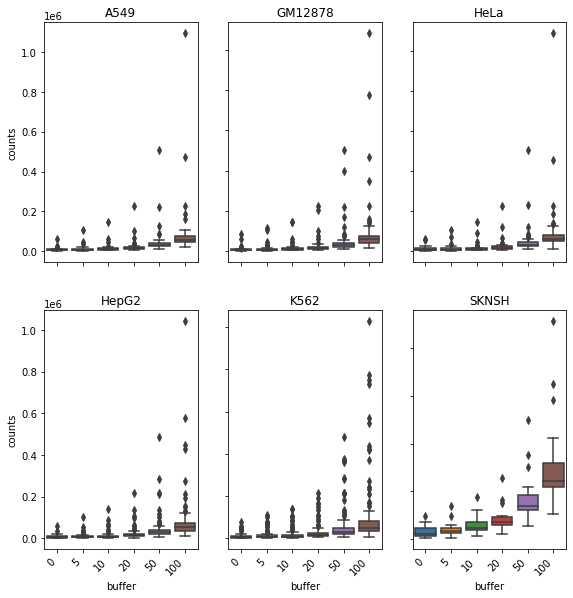

In [122]:
# indir='../../pc/redmo/data/MotifPipeline/**'

# # indir='../../pc/redmo/data/MotifPipeline/'
# # aurocs=pd.read_csv(indir+'/test/.txt',)

# # outdir='../../pc/redmo/data/MotifPipeline'
# allbox = pd.DataFrame()
# traces= glob.glob(indir+'/test/*',recursive = True)
# indices = [i for i, s in enumerate(traces) if '' in s]
# # method='auroc'


indir='../../pc/redmo/data/MotifPipeline/**'
outdir='../../pc/redmo/data/MotifPipeline'
allbox = pd.DataFrame()
traces= glob.glob(indir+'/test/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'camb_PRE_window_methyl' in s]

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[6]
    buffer=(buffer).split('_')[3]
    buffer=(buffer).split('a')[2]

    meltbox=pd.read_csv(trace,sep=',',names=['cell','TF','pwm','wgbs','array','counts'])
    meltbox['buffer']=buffer
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['cell']+'_'+allbox['buffer'].astype(str)
from pathlib import Path
# outdir='data/MotifPipeline/compare'
Path(outdir).mkdir(parents=True, exist_ok=True)
fig=plt.figure(figsize=(8, 8))
plt.xticks(rotation=30)
# plt.subplot(2, 2, 3)
cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
# for cell in (cells): ##### aggregate across all cellines per data type
#     for test in tests:
# fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()
plt.subplot(2,3,1)
allbox2=allbox[allbox['cell_buff'].str.contains(pat="A549")]
#         allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
allbox2.buffer=(allbox2.buffer).astype(int)
allbox2=allbox2.sort_values(by='buffer')
g=sns.boxplot(x='buffer',y='counts', data=allbox2)
# g=sns.swarmplot(x='cell_buff',y='counts', data=allbox2,size=2, color=".3", linewidth=0)
#     g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('A549')
# g.set_yticklabels([])
g.set_xticklabels([])
# g.set_ylabel([])
g.set_xlabel('')

plt.subplot(2,3,2)
allbox2=allbox[allbox['cell_buff'].str.contains(pat="GM12878")]
#         allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
allbox2.buffer=(allbox2.buffer).astype(int)
allbox2=allbox2.sort_values(by='buffer')
g=sns.boxplot(x='buffer',y='counts', data=allbox2)
# g=sns.swarmplot(x='cell_buff',y='counts', data=allbox2,size=2, color=".3", linewidth=0)
#     g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('GM12878')
g.set_yticklabels([])
g.set_xticklabels([])
g.set_ylabel('')
g.set_xlabel('')

plt.subplot(2,3,3)
allbox2=allbox[allbox['cell_buff'].str.contains(pat="HeLa")]
#         allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
allbox2.buffer=(allbox2.buffer).astype(int)
allbox2=allbox2.sort_values(by='buffer')
g=sns.boxplot(x='buffer',y='counts', data=allbox2)
# g=sns.swarmplot(x='cell_buff',y='counts', data=allbox2,size=2, color=".3", linewidth=0)
#     g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('HeLa')
g.set_yticklabels([])
g.set_xticklabels([])
g.set_ylabel('')
g.set_xlabel('')

plt.subplot(2,3,4)
allbox2=allbox[allbox['cell_buff'].str.contains(pat="HepG2")]
#         allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
allbox2.buffer=(allbox2.buffer).astype(int)
allbox2=allbox2.sort_values(by='buffer')
g=sns.boxplot(x='buffer',y='counts', data=allbox2)
# g=sns.swarmplot(x='cell_buff',y='counts', data=allbox2,size=2, color=".3", linewidth=0)
#     g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('HepG2')
# g.set_yticklabels([])
# g.set_xticklabels([])
# g.set_ylabel([])
# g.set_xlabel([])

plt.subplot(2,3,5)
allbox2=allbox[allbox['cell_buff'].str.contains(pat="K562")]
#         allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
allbox2.buffer=(allbox2.buffer).astype(int)
allbox2=allbox2.sort_values(by='buffer')
g=sns.boxplot(x='buffer',y='counts', data=allbox2)
# g=sns.swarmplot(x='cell_buff',y='counts', data=allbox2,size=2, color=".3", linewidth=0)
#     g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('K562')
g.set_yticklabels([])
# g.set_xticklabels([])
g.set_ylabel('')
# g.set_xlabel([])

plt.subplot(2,3,6)
allbox2=allbox[allbox['cell_buff'].str.contains(pat="SKNSH")]
#         allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
allbox2.buffer=(allbox2.buffer).astype(int)
allbox2=allbox2.sort_values(by='buffer')
g=sns.boxplot(x='buffer',y='counts', data=allbox2)
# g=sns.swarmplot(x='cell_buff',y='counts', data=allbox2,size=2, color=".3", linewidth=0)
#     g.set(ylim=(0, 1))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('SKNSH')
g.set_yticklabels([])
# g.set_xticklabels([])
g.set_ylabel('')
# g.set_xlabel([])

plt.show()
plt.savefig(outdir+"camb_allbox_buff.png",dpi=300,bbox_inches = "tight")
plt.close()
# return

## promoter centric analysis and functions

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PBX1 in A549
AUROC calculated for PROX1 in A549
AUROC calculated for TFAP2A in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV4 in HepG2
AUROC calculated for STAT5A in K562
AUROC calculated for NKX1-1 in K562
AUROC calculated for ZBED1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAFF in A549
AUROC calculated for STAT4 in SKNSH
AUROC calculated for CREB3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2B in SKNSH
AUROC calculated for TWIST1 in HepG2
AUROC calculated for IRF1 in A549
AUROC calculated for MSC in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2E in HeLa
AUROC calculated for HEY2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for USF2 in HepG2
AUROC calculated for ZEB1 in HeLa
AUROC calculated for TFAP2E in A549
AUROC calculated for NHLH2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB1 in SKNSH
AUROC calculated for TFAP4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for WT1 in K562
AUROC calculated for E2F8 in K562
AUROC calculated for PPARD in SKNSH
AUROC calculated for E2F8 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFX in A549
AUROC calculated for HNF4A in SKNSH
AUROC calculated for REL in SKNSH
AUROC calculated for ELK1 in K562
AUROC calculated for RFX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF6 in HepG2
AUROC calculated for HOXA4 in K562
AUROC calculated for ONECUT1 in K562
AUROC calculated for JUNB in HepG2
AUROC calculated for PKNOX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MXI1 in K562
AUROC calculated for KLF3 in HepG2
AUROC calculated for CEBPZ in HepG2
AUROC calculated for TGIF2LX in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAFK in SKNSH
AUROC calculated for ZNF333 in K562
AUROC calculated for GSX1 in A549
AUROC calculated for KLF16 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA9 in HepG2
AUROC calculated for RFX1 in SKNSH
AUROC calculated for HESX1 in A549
AUROC calculated for RORA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC5 in HepG2
AUROC calculated for ATF1 in A549
AUROC calculated for LBX2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB3L2 in HepG2
AUROC calculated for NKX3-2 in SKNSH
AUROC calculated for PKNOX1 in A549
AUROC calculated for RELB in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLL in K562
AUROC calculated for NR2C2 in K562
AUROC calculated for TBR1 in A549
AUROC calculated for HOXC11 in HepG2
AUROC calculated for FOS in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ONECUT3 in HepG2
AUROC calculated for KLF7 in HeLa
AUROC calculated for GATA1 in A549
AUROC calculated for MEOX1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SPZ1 in A549
AUROC calculated for GLI1 in K562
AUROC calculated for HOXA2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RXRG in HepG2
AUROC calculated for GLIS2 in A549
AUROC calculated for POU4F3 in SKNSH
AUROC calculated for KLF13 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BHLHA15 in K562
AUROC calculated for ZNF282 in A549
AUROC calculated for TBX2 in K562
AUROC calculated for FEV in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP2 in A549
AUROC calculated for NAIF1 in HeLa
AUROC calculated for ZIC5 in A549
AUROC calculated for IRF6 in HepG2
AUROC calculated for NR4A3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MESP1 in K562
AUROC calculated for HMX2 in A549
AUROC calculated for NR2E3 in K562
AUROC calculated for MAFK in A549
AUROC calculated for RFX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KDM2B in K562
AUROC calculated for ONECUT2 in HepG2
AUROC calculated for NR2E1 in K562
AUROC calculated for ID4 in K562
AUROC calculated for NKX2-1 in K562
AUROC calculated for MYBL1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA11 in A549
AUROC calculated for ESR2 in K562
AUROC calculated for DNMT1 in K562
AUROC calculated for RXRA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for POU4F2 in HepG2
AUROC calculated for MAFB in A549
AUROC calculated for TBX10 in A549
AUROC calculated for POU2F2 in SKNSH
AUROC calculated for POU5F1 in A549
AUROC calculated for EGR2 in SKNSH
AUROC calculated for EMX1 in K562
AUROC calculated for POU5F1 in HepG2
AUROC calculated for MYF5 in K562
AUROC calculated for AR in K562
AUROC calculated for HNF4A in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOSL1 in HepG2
AUROC calculated for OTX2 in K562
AUROC calculated for RFX5 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for OSR1 in SKNSH
AUROC calculated for NR1I2 in A549
AUROC calculated for SOX4 in A549
AUROC calculated for TLX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for JUND in K562
AUROC calculated for ZNF281 in A549
AUROC calculated for ZNF202 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXB7 in HepG2
AUROC calculated for FEZF1 in HepG2
AUROC calculated for FEV in A549
AUROC calculated for ARID3A in A549
AUROC calculated for KLF1 in A549
AUROC calculated for FOXP2 in HepG2
AUROC calculated for IRF1 in K562
AUROC calculated for PAX8 in K562
AUROC calculated for RFX6 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR1 in HepG2
AUROC calculated for ERG in K562
AUROC calculated for CEBPZ in A549
AUROC calculated for CUX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GATA2 in HepG2
AUROC calculated for DLX3 in K562
AUROC calculated for HOXA3 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HSF4 in K562
AUROC calculated for ZSCAN4 in SKNSH
AUROC calculated for POU6F1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR1 in K562
AUROC calculated for ERF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7A in A549
AUROC calculated for PAX3 in K562
AUROC calculated for CREB5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF384 in SKNSH
AUROC calculated for CUX2 in HepG2
AUROC calculated for ARX in A549
AUROC calculated for TFDP1 in K562
AUROC calculated for SPZ1 in SKNSH
AUROC calculated for PLAGL1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ARNTL in SKNSH
AUROC calculated for ATF2 in K562
AUROC calculated for BARHL2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXL2 in HepG2
AUROC calculated for FOXA3 in K562
AUROC calculated for SRF in K562
AUROC calculated for PRDM4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7B in SKNSH
AUROC calculated for HOXC9 in HeLa
AUROC calculated for THRB in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB3L1 in K562
AUROC calculated for ZBTB33 in A549
AUROC calculated for SPDEF in A549
AUROC calculated for TBX4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BRCA1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for ZBTB7C in A549
AUROC calculated for E2F6 in HepG2
AUROC calculated for HOXD13 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP3 in K562
AUROC calculated for HOXA3 in A549
AUROC calculated for TFEB in SKNSH
AUROC calculated for HSF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC5 in SKNSH
AUROC calculated for ARID2 in HeLa
AUROC calculated for NR2E1 in A549
AUROC calculated for HOXD11 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCF15 in SKNSH
AUROC calculated for NFKB1 in HeLa
AUROC calculated for KLF5 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF350 in A549
AUROC calculated for PLAGL1 in K562
AUROC calculated for REST in SKNSH
AUROC calculated for NR2F1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES1 in SKNSH
AUROC calculated for PAX1 in HepG2
AUROC calculated for EBF1 in SKNSH
AUROC calculated for CBFB in K562
AUROC calculated for CDC5L in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BHLHE41 in K562
AUROC calculated for NFYA in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP2 in SKNSH
AUROC calculated for PRDM4 in A549
AUROC calculated for HSF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFP161 in HepG2
AUROC calculated for ZIC1 in K562
AUROC calculated for GLI1 in HepG2
AUROC calculated for NHLH2 in HeLa
AUROC calculated for FOXC2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E4F1 in K562
AUROC calculated for VSX2 in K562
AUROC calculated for SOX2 in HepG2
AUROC calculated for TAL1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB5 in SKNSH
AUROC calculated for PAX5 in A549
AUROC calculated for NFIL3 in HepG2
AUROC calculated for RFX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GLIS3 in HepG2
AUROC calculated for RXRB in A549
AUROC calculated for NR1I3 in K562
AUROC calculated for EN1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFKB2 in K562
AUROC calculated for OLIG1 in K562
AUROC calculated for CREB3 in A549
AUROC calculated for NFIB in A549
AUROC calculated for PDX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF15 in SKNSH
AUROC calculated for NFKB1 in A549
AUROC calculated for HOXC9 in K562
AUROC calculated for PPARD in HepG2
AUROC calculated for GLIS1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PLAGL1 in HepG2
AUROC calculated for FIGLA in SKNSH
AUROC calculated for GLI3 in K562
AUROC calculated for GFI1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF7 in A549
AUROC calculated for FIGLA in A549
AUROC calculated for AR in HeLa
AUROC calculated for SPI1 in A549
AUROC calculated for ZNF683 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA5 in HepG2
AUROC calculated for MYPOP in HeLa
AUROC calculated for PAX6 in HepG2
AUROC calculated for TFEC in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BPTF in SKNSH
AUROC calculated for TFCP2 in K562
AUROC calculated for RFX5 in A549
AUROC calculated for OTX2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CXXC1 in HepG2
AUROC calculated for NR6A1 in K562
AUROC calculated for KLF9 in SKNSH
AUROC calculated for GSX1 in HepG2
AUROC calculated for RFX2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MECP2 in K562
AUROC calculated for DMBX1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for STAT4 in K562
AUROC calculated for TFE3 in K562
AUROC calculated for AHR in A549
AUROC calculated for CEBPZ in K562
AUROC calculated for CGBP in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FUBP1 in HepG2
AUROC calculated for TCF7 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF5 in SKNSH
AUROC calculated for KLF15 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXJ2 in K562
AUROC calculated for TAL1 in SKNSH
AUROC calculated for IRF5 in A549
AUROC calculated for DMBX1 in SKNSH
AUROC calculated for CEBPA in SKNSH
AUROC calculated for POU2F2 in HepG2
AUROC calculated for NR6A1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR2 in K562
AUROC calculated for KLF3 in SKNSH
AUROC calculated for CENPB in SKNSH
AUROC calculated for SOX6 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMARCC1 in HeLa
AUROC calculated for HOXB13 in K562
AUROC calculated for HOXC11 in K562
AUROC calculated for RBPJ in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GATA2 in K562
AUROC calculated for AHR in HepG2
AUROC calculated for ERF in A549
AUROC calculated for CREM in HepG2
AUROC calculated for NKX2-3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NRF1 in SKNSH
AUROC calculated for GLI2 in HepG2
AUROC calculated for NR5A2 in HepG2
AUROC calculated for ZNF691 in HepG2
AUROC calculated for ZNF691 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEF2C in SKNSH
AUROC calculated for ZNF713 in HepG2
AUROC calculated for NR2F6 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CIC in HepG2
AUROC calculated for IRF1 in HeLa
AUROC calculated for MBD2 in K562
AUROC calculated for ZNF274 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA13 in HepG2
AUROC calculated for E2F5 in K562
AUROC calculated for ENO1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EPAS1 in K562
AUROC calculated for NFYB in SKNSH
AUROC calculated for HOXA11 in K562
AUROC calculated for HOXA2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB4 in K562
AUROC calculated for NAIF1 in HepG2
AUROC calculated for TET1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GFI1B in A549
AUROC calculated for RFX7 in HeLa
AUROC calculated for ENSG00000235187 in HeLa
AUROC calculated for PAX6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEF2C in HeLa
AUROC calculated for MAX in SKNSH
AUROC calculated for OSR2 in HeLa
AUROC calculated for MNT in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PURA in HepG2
AUROC calculated for RFX3 in SKNSH
AUROC calculated for TP63 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF6 in SKNSH
AUROC calculated for PGR in A549
AUROC calculated for IRX5 in K562
AUROC calculated for RXRA in HepG2
AUROC calculated for FOXJ1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CTCFL in A549
AUROC calculated for FOXI1 in SKNSH
AUROC calculated for ESRRA in HepG2
AUROC calculated for TBX10 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFE2 in HepG2
AUROC calculated for ENSG00000235187 in K562
AUROC calculated for STAT1 in HepG2
AUROC calculated for MBD2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ASCL2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF281 in SKNSH
AUROC calculated for SIX1 in K562
AUROC calculated for TEF in SKNSH
AUROC calculated for SOX21 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NRF1 in K562
AUROC calculated for HNF4A in A549
AUROC calculated for ZNF683 in HeLa
AUROC calculated for ZNF219 in A549
AUROC calculated for ZNF589 in SKNSH
AUROC calculated for ZEB1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRF2 in A549
AUROC calculated for FOXI1 in A549
AUROC calculated for ZNF740 in HepG2
AUROC calculated for TET1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXM1 in HepG2
AUROC calculated for EN2 in K562
AUROC calculated for EBF1 in HepG2
AUROC calculated for ZNF713 in SKNSH
AUROC calculated for KDM2B in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for STAT5B in HepG2
AUROC calculated for HSF4 in SKNSH
AUROC calculated for ZKSCAN3 in SKNSH
AUROC calculated for SOX30 in SKNSH
AUROC calculated for IRF8 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2C in SKNSH
AUROC calculated for NAIF1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAZ in K562
AUROC calculated for NFYC in HepG2
AUROC calculated for ZNF740 in SKNSH
AUROC calculated for STAT2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR3C1 in HepG2
AUROC calculated for GLIS3 in A549
AUROC calculated for SMAD4 in K562
AUROC calculated for ZNF410 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZKSCAN1 in HeLa
AUROC calculated for ZNF76 in SKNSH
AUROC calculated for MAFK in HeLa
AUROC calculated for NFIB in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BCL11A in A549
AUROC calculated for IRF4 in A549
AUROC calculated for GSC in A549
AUROC calculated for SNAI3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFP161 in SKNSH
AUROC calculated for FOXL2 in HeLa
AUROC calculated for HOXA3 in K562
AUROC calculated for CTCF in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC5 in HeLa
AUROC calculated for HOXD11 in SKNSH
AUROC calculated for LHX2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NPAS4 in SKNSH
AUROC calculated for JUN in K562
AUROC calculated for BRCA1 in K562
AUROC calculated for SMARCC1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2B in K562
AUROC calculated for NFIX in HepG2
AUROC calculated for KLF4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NKX1-1 in HepG2
AUROC calculated for PBX2 in SKNSH
AUROC calculated for SMARCC2 in K562
AUROC calculated for CXXC1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DMRTA2 in HepG2
AUROC calculated for ZNF524 in HepG2
AUROC calculated for ZEB1 in SKNSH
AUROC calculated for IRF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F1 in SKNSH
AUROC calculated for PKNOX1 in SKNSH
AUROC calculated for OSR2 in K562
AUROC calculated for OSR2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFYA in HepG2
AUROC calculated for GMEB2 in A549
AUROC calculated for MXI1 in SKNSH
AUROC calculated for PITX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HIC1 in K562
AUROC calculated for KLF7 in SKNSH
AUROC calculated for TFAP2A in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFEB in A549
AUROC calculated for GATA1 in HepG2
AUROC calculated for BHLHE41 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SRF in A549
AUROC calculated for BARX1 in K562
AUROC calculated for MSC in HepG2
AUROC calculated for ARNTL in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR3C1 in K562
AUROC calculated for GLIS3 in SKNSH
AUROC calculated for IRF2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR0B1 in HepG2
AUROC calculated for FOXA2 in K562
AUROC calculated for TBX15 in A549
AUROC calculated for ELK1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXH1 in K562
AUROC calculated for POU3F1 in K562
AUROC calculated for HES2 in SKNSH
AUROC calculated for NR1H4 in SKNSH
AUROC calculated for ZNF238 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for OSR1 in A549
AUROC calculated for ZBTB12 in SKNSH
AUROC calculated for ATF4 in HepG2
AUROC calculated for HINFP in K562
AUROC calculated for ZBTB49 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB12 in K562
AUROC calculated for MECP2 in HepG2
AUROC calculated for FOXJ3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF15 in K562
AUROC calculated for MAX in HeLa
AUROC calculated for HMX3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RARG in HepG2
AUROC calculated for FLI1 in SKNSH
AUROC calculated for STAT5A in HepG2
AUROC calculated for KLF2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CIC in A549
AUROC calculated for ID2 in HepG2
AUROC calculated for FOXD2 in HepG2
AUROC calculated for NFIX in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2A in K562
AUROC calculated for NFIL3 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise c

AUROC calculated for FOSL2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXB8 in K562
AUROC calculated for SP5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR1 in A549
AUROC calculated for SIX1 in HepG2
AUROC calculated for NFYC in A549
AUROC calculated for KLF16 in SKNSH
AUROC calculated for GBX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SPIC in SKNSH
AUROC calculated for MEIS2 in SKNSH
AUROC calculated for TLX1 in K562
AUROC calculated for ZNF423 in SKNSH
AUROC calculated for ETS1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HSF2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise c

AUROC calculated for CREB3L1 in HepG2
AUROC calculated for ESX1 in K562
AUROC calculated for ZSCAN16 in HepG2
AUROC calculated for IRX2 in SKNSH
AUROC calculated for RHOXF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB3L2 in K562
AUROC calculated for SPDEF in K562
AUROC calculated for NFE2L2 in K562
AUROC calculated for HOMEZ in SKNSH
AUROC calculated for SOX2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRF3 in HepG2
AUROC calculated for OVOL1 in A549
AUROC calculated for ESR2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for MAZ in HepG2
AUROC calculated for GFI1B in SKNSH
AUROC calculated for MYBL2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CBFB in A549
AUROC calculated for PHOX2A in K562
AUROC calculated for RXRB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLXIPL in A549
AUROC calculated for SIM1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX5 in SKNSH
AUROC calculated for IRX4 in HeLa
AUROC calculated for POU3F1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES7 in A549
AUROC calculated for MSX1 in K562
AUROC calculated for E2F3 in SKNSH
AUROC calculated for TFE3 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RXRA in K562
AUROC calculated for ETV3 in SKNSH
AUROC calculated for MYBL2 in SKNSH
AUROC calculated for FOXC1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for STAT6 in K562
AUROC calculated for DDIT3 in SKNSH
AUROC calculated for FLI1 in K562
AUROC calculated for TBX3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for JUN in HeLa
AUROC calculated for SP8 in A549
AUROC calculated for JUND in SKNSH
AUROC calculated for LCOR in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX5 in K562
AUROC calculated for TFAP2D in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ENO1 in SKNSH
AUROC calculated for NFATC4 in A549
AUROC calculated for STAT6 in SKNSH
AUROC calculated for EMX2 in HepG2
AUROC calculated for NR3C1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX18 in K562
AUROC calculated for ZSCAN16 in A549
AUROC calculated for FOXO3 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR1 in SKNSH
AUROC calculated for HMX1 in K562
AUROC calculated for ASCL2 in A549
AUROC calculated for PAX3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F6 in SKNSH
AUROC calculated for MSX1 in A549
AUROC calculated for NR2C1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for JUND in A549
AUROC calculated for BCL6 in HepG2
AUROC calculated for IRF5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLL in HeLa
AUROC calculated for CEBPD in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for SP4 in K562
AUROC calculated for NFATC1 in SKNSH
AUROC calculated for SRF in HepG2
AUROC calculated for NR1I2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAFF in SKNSH
AUROC calculated for EPAS1 in SKNSH
AUROC calculated for FOXD3 in SKNSH
AUROC calculated for BATF in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for USF1 in HepG2
AUROC calculated for MSX1 in HepG2
AUROC calculated for PITX3 in HepG2
AUROC calculated for MTF1 in K562
AUROC calculated for ZNF784 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB6 in SKNSH
AUROC calculated for ZNF683 in K562
AUROC calculated for ZIC1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BATF3 in SKNSH
AUROC calculated for RELB in SKNSH
AUROC calculated for TLX1 in A549
AUROC calculated for E2F7 in K562
AUROC calculated for SOX4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP1 in SKNSH
AUROC calculated for EGR3 in HepG2
AUROC calculated for NR3C2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF282 in K562
AUROC calculated for NRL in A549
AUROC calculated for MEIS1 in A549
AUROC calculated for HOXB1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX2 in A549
AUROC calculated for ZNF143 in K562
AUROC calculated for IRX2 in A549
AUROC calculated for ID4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F1 in HepG2
AUROC calculated for EBF1 in K562
AUROC calculated for TCF7L2 in A549
AUROC calculated for MEIS2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RUNX1 in K562
AUROC calculated for TBX21 in SKNSH
AUROC calculated for USF2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E4F1 in HepG2
AUROC calculated for TBX19 in HepG2
AUROC calculated for HOXA11 in HeLa
AUROC calculated for HMX2 in K562
AUROC calculated for HSFY2 in A549
AUROC calculated for SOX14 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF4 in K562
AUROC calculated for PITX2 in SKNSH
AUROC calculated for MEF2D in HepG2
AUROC calculated for FOXI1 in HepG2
AUROC calculated for STAT5B in A549
AUROC calculated for PTF1A in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GRHL1 in SKNSH
AUROC calculated for DMBX1 in K562
AUROC calculated for POU6F2 in HepG2
AUROC calculated for FOXQ1 in K562
AUROC calculated for HMGA2 in HepG2
AUROC calculated for BPTF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF75A in A549
AUROC calculated for PPARG in SKNSH
AUROC calculated for E2F2 in HepG2
AUROC calculated for RELA in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for VSX2 in A549
AUROC calculated for TCF12 in SKNSH
AUROC calculated for HIVEP1 in HepG2
AUROC calculated for FOXO3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7C in K562
AUROC calculated for ZBTB7C in SKNSH
AUROC calculated for OTX2 in A549
AUROC calculated for RORB in HeLa
AUROC calculated for PITX3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BARHL1 in HepG2
AUROC calculated for ID2 in A549
AUROC calculated for NFATC4 in HepG2
AUROC calculated for KLF13 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SIX2 in HeLa
AUROC calculated for HEY1 in A549
AUROC calculated for MEF2B in HepG2
AUROC calculated for ESR1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EMX2 in SKNSH
AUROC calculated for SPIC in HepG2
AUROC calculated for KLF9 in K562
AUROC calculated for ATF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC3 in HepG2
AUROC calculated for FOXK1 in HepG2
AUROC calculated for CDX2 in HepG2
AUROC calculated for GRHL1 in K562
AUROC calculated for SMAD1 in K562
AUROC calculated for FOXP2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CENPB in K562
AUROC calculated for ZNF202 in HepG2
AUROC calculated for SOX18 in HepG2
AUROC calculated for HES7 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF423 in A549
AUROC calculated for ZHX1 in HeLa
AUROC calculated for E2F6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX20 in HepG2
AUROC calculated for KLF2 in HepG2
AUROC calculated for ZNF274 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP3 in HepG2
AUROC calculated for CEBPE in K562
AUROC calculated for HOXB4 in K562
AUROC calculated for HMGA2 in K562
AUROC calculated for NFYB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXF2 in HepG2
AUROC calculated for HHEX in SKNSH
AUROC calculated for RBPJ in SKNSH
AUROC calculated for DMRTC2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BCL11A in HeLa
AUROC calculated for FUBP1 in A549
AUROC calculated for SCRT2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRX2 in HepG2
AUROC calculated for NRL in SKNSH
AUROC calculated for TP73 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYF5 in SKNSH
AUROC calculated for CREB1 in SKNSH
AUROC calculated for HES7 in SKNSH
AUROC calculated for PRKRIR in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES5 in SKNSH
AUROC calculated for TFAP2E in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for GCM2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise c

AUROC calculated for BATF in K562
AUROC calculated for MGA in HepG2
AUROC calculated for NFATC1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFE2 in K562
AUROC calculated for AIRE in A549
AUROC calculated for STAT5A in SKNSH
AUROC calculated for CEBPB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF13 in K562
AUROC calculated for MSC in A549
AUROC calculated for SOX6 in K562
AUROC calculated for NR2C2 in SKNSH
AUROC calculated for HAND1 in K562
AUROC calculated for SOX21 in K562
AUROC calculated for GATA4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SREBF1 in HeLa
AUROC calculated for MSX1 in SKNSH
AUROC calculated for TFAP2D in SKNSH
AUROC calculated for SCRT2 in A549
AUROC calculated for IRX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD2 in HepG2
AUROC calculated for GLI2 in SKNSH
AUROC calculated for ZNF589 in HepG2
AUROC calculated for FOXO1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXO4 in K562
AUROC calculated for ATF6 in A549
AUROC calculated for HOXC5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RREB1 in HepG2
AUROC calculated for NRF1 in HeLa
AUROC calculated for NFIA in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX6 in HeLa
AUROC calculated for MTF1 in A549
AUROC calculated for ETV2 in K562
AUROC calculated for EMX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA4 in HeLa
AUROC calculated for BARX2 in HepG2
AUROC calculated for PPARD in A549
AUROC calculated for HOXC8 in HepG2
AUROC calculated for REST in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for OVOL1 in K562
AUROC calculated for KDM2B in HepG2
AUROC calculated for HOMEZ in K562
AUROC calculated for ETV5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CBFB in SKNSH
AUROC calculated for FOS in SKNSH
AUROC calculated for HOXB13 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRF4 in HepG2
AUROC calculated for ARNT in HepG2
AUROC calculated for TAL1 in A549
AUROC calculated for ESR2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF1 in SKNSH
AUROC calculated for NR1H2 in K562
AUROC calculated for ZBTB7C in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for LCOR in HepG2
AUROC calculated for MYPOP in SKNSH
AUROC calculated for HLTF in K562
AUROC calculated for OLIG3 in HepG2
AUROC calculated for TLX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX17 in A549
AUROC calculated for STAT1 in A549
AUROC calculated for GATA5 in K562
AUROC calculated for PBX3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZHX1 in SKNSH
AUROC calculated for ELF3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF148 in A549
AUROC calculated for BCL11A in K562
AUROC calculated for TWIST2 in A549
AUROC calculated for FOSB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF7 in HepG2
AUROC calculated for CREB3L2 in SKNSH
AUROC calculated for KLF14 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX2 in K562
AUROC calculated for RFX5 in HepG2
AUROC calculated for IRF4 in HeLa
AUROC calculated for HIC1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB49 in K562
AUROC calculated for CREB5 in A549
AUROC calculated for DDIT3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BCL6B in K562
AUROC calculated for ENSG00000250542 in HepG2
AUROC calculated for RELA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FIGLA in HepG2
AUROC calculated for ATF5 in K562
AUROC calculated for ZFHX2 in HepG2
AUROC calculated for BARX2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GCM2 in HepG2
AUROC calculated for EBF1 in HeLa
AUROC calculated for FOXO1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SIX1 in A549
AUROC calculated for MEF2C in K562
AUROC calculated for ATF7 in K562
AUROC calculated for JUN in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMARCC2 in SKNSH
AUROC calculated for SMAD2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SPI1 in HepG2
AUROC calculated for ZNF238 in K562
AUROC calculated for HOXA6 in K562
AUROC calculated for TP63 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CEBPD in SKNSH
AUROC calculated for PRDM1 in A549
AUROC calculated for SCRT1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TWIST2 in HepG2
AUROC calculated for TEAD3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF281 in HepG2
AUROC calculated for ZNF76 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP2 in K562
AUROC calculated for HIVEP1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXD12 in K562
AUROC calculated for ENSG00000250542 in SKNSH
AUROC calculated for ZNF683 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR6A1 in SKNSH
AUROC calculated for IRF2 in SKNSH
AUROC calculated for TFAP2A in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GATA2 in HeLa
AUROC calculated for IRX4 in K562
AUROC calculated for RELB in HepG2
AUROC calculated for TCF7L2 in HepG2
AUROC calculated for TCF3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD4 in HepG2
AUROC calculated for BATF3 in HepG2
AUROC calculated for MYC in SKNSH
AUROC calculated for GMEB1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for YY1 in SKNSH
AUROC calculated for DUXA in SKNSH
AUROC calculated for ZNF76 in A549
AUROC calculated for KLF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX2 in SKNSH
AUROC calculated for NFAT5 in K562
AUROC calculated for MNT in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for OLIG1 in HepG2
AUROC calculated for IRF6 in K562
AUROC calculated for FOXB2 in A549
AUROC calculated for KLF3 in A549
AUROC calculated for ASCL2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PLAGL1 in SKNSH
AUROC calculated for PBX2 in A549
AUROC calculated for ID4 in HepG2
AUROC calculated for TCF7L2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR2C1 in HepG2
AUROC calculated for FOXI1 in K562
AUROC calculated for TEAD1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TEAD1 in A549
AUROC calculated for BARX2 in A549
AUROC calculated for C11orf9 in HepG2
AUROC calculated for RFX3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD2 in A549
AUROC calculated for ZNF35 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXC9 in SKNSH
AUROC calculated for DUXA in HepG2
AUROC calculated for CIC in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAZ in SKNSH
AUROC calculated for ZNF384 in K562
AUROC calculated for KLF3 in K562
AUROC calculated for RUNX1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRF9 in HepG2
AUROC calculated for ZNF652 in HepG2
AUROC calculated for ZNF589 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD3 in SKNSH
AUROC calculated for RUNX2 in HeLa
AUROC calculated for ZNF410 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PBX2 in K562
AUROC calculated for TP73 in K562
AUROC calculated for FOXH1 in HepG2
AUROC calculated for HOXC9 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES5 in HepG2
AUROC calculated for SOX17 in SKNSH
AUROC calculated for MEIS1 in SKNSH
AUROC calculated for ESRRG in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF219 in SKNSH
AUROC calculated for FOXD2 in A549
AUROC calculated for MGA in K562
AUROC calculated for PITX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for USF1 in K562
AUROC calculated for HNF4G in HepG2
AUROC calculated for AIRE in HepG2
AUROC calculated for OSR2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ELF2 in K562
AUROC calculated for ETS2 in HepG2
AUROC calculated for NFKB1 in SKNSH
AUROC calculated for TFAP2A in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYB in K562
AUROC calculated for HOXD11 in A549
AUROC calculated for KLF5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for YY1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BACH2 in K562
AUROC calculated for KLF4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HIF1A in HepG2
AUROC calculated for TBX3 in SKNSH
AUROC calculated for TFE3 in HepG2
AUROC calculated for MYOG in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HSF1 in SKNSH
AUROC calculated for YY2 in HepG2
AUROC calculated for GSC2 in A549
AUROC calculated for ETV1 in SKNSH
AUROC calculated for FOXM1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX5 in HeLa
AUROC calculated for ZIC2 in A549
AUROC calculated for PAX8 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PDX1 in A549
AUROC calculated for ZBED1 in HepG2
AUROC calculated for PPARG in A549
AUROC calculated for ARNTL in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RELA in K562
AUROC calculated for KLF6 in HepG2
AUROC calculated for ZKSCAN3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ARID3A in SKNSH
AUROC calculated for EGR4 in K562
AUROC calculated for NFIA in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TP63 in SKNSH
AUROC calculated for HOXB9 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES2 in K562
AUROC calculated for FERD3L in K562
AUROC calculated for ETS1 in SKNSH
AUROC calculated for HOXC5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FEV in HepG2
AUROC calculated for E2F8 in HepG2
AUROC calculated for ZIC2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF148 in SKNSH
AUROC calculated for ARID2 in HepG2
AUROC calculated for TGIF2LX in K562
AUROC calculated for TCF12 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DUXA in K562
AUROC calculated for SREBF1 in SKNSH
AUROC calculated for HES5 in K562
AUROC calculated for NR3C1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV6 in SKNSH
AUROC calculated for NHLH1 in K562
AUROC calculated for ETV5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EPAS1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXC1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV4 in A549
AUROC calculated for NR4A3 in K562
AUROC calculated for NR2E1 in SKNSH
AUROC calculated for ZBTB6 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BACH1 in HepG2
AUROC calculated for MLX in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ESR1 in K562
AUROC calculated for NR2C1 in K562
AUROC calculated for BPTF in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for REL in HepG2
AUROC calculated for GLIS2 in SKNSH
AUROC calculated for HINFP in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYC in HeLa
AUROC calculated for RUNX2 in HepG2
AUROC calculated for CEBPE in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NHLH2 in SKNSH
AUROC calculated for TCF7L1 in A549
AUROC calculated for ARID3A in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F4 in HeLa
AUROC calculated for SIM1 in SKNSH
AUROC calculated for CENPB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXD3 in A549
AUROC calculated for PTF1A in K562
AUROC calculated for YBX1 in A549
AUROC calculated for GSC2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HNF4G in HeLa
AUROC calculated for HINFP in HepG2
AUROC calculated for TCF7L2 in HeLa
AUROC calculated for NFKB2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HESX1 in SKNSH
AUROC calculated for MYBL1 in SKNSH
AUROC calculated for SOX8 in A549
AUROC calculated for HNF1A in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2B in HepG2
AUROC calculated for ZKSCAN1 in HepG2
AUROC calculated for ZIC4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NPAS4 in A549
AUROC calculated for PHOX2A in HepG2
AUROC calculated for SPIB in K562
AUROC calculated for CGBP in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYCL1 in A549
AUROC calculated for PLAG1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX9 in K562
AUROC calculated for PRDM1 in SKNSH
AUROC calculated for KLF12 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RBPJ in A549
AUROC calculated for MAFB in SKNSH
AUROC calculated for MBD2 in A549
AUROC calculated for CEBPE in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TP53 in HepG2
AUROC calculated for LHX2 in K562
AUROC calculated for ATF3 in HeLa
AUROC calculated for NEUROG1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA7 in HepG2
AUROC calculated for EPAS1 in A549
AUROC calculated for FUBP1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RORB in SKNSH
AUROC calculated for STAT6 in HepG2
AUROC calculated for SMAD4 in A549
AUROC calculated for SOX8 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR1I3 in A549
AUROC calculated for FOXC1 in SKNSH
AUROC calculated for CEBPA in HepG2
AUROC calculated for NEUROD1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SPZ1 in K562
AUROC calculated for MAFB in K562
AUROC calculated for HMX3 in K562
AUROC calculated for GSC in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TWIST1 in SKNSH
AUROC calculated for AR in HepG2
AUROC calculated for BHLHE23 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SPIB in A549
AUROC calculated for MYF5 in HeLa
AUROC calculated for ZNF713 in A549
AUROC calculated for NR5A1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF7 in A549
AUROC calculated for POU6F2 in K562
AUROC calculated for TFAP2D in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PLAG1 in K562
AUROC calculated for NR2E1 in HeLa
AUROC calculated for SOX9 in A549
AUROC calculated for CUX1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BHLHE41 in HepG2
AUROC calculated for RFX4 in K562
AUROC calculated for GCM1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLXIP in K562
AUROC calculated for PRKRIR in K562
AUROC calculated for KLF2 in A549
AUROC calculated for HOXC12 in K562
AUROC calculated for DMRT1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF350 in K562
AUROC calculated for HOXA9 in K562
AUROC calculated for IRF7 in K562
AUROC calculated for ZNF143 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLXIP in HepG2
AUROC calculated for NKX3-2 in A549
AUROC calculated for TLX1 in SKNSH
AUROC calculated for ZSCAN10 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RORA in K562
AUROC calculated for FEZF1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXC8 in K562
AUROC calculated for SNAI3 in HeLa
AUROC calculated for ZSCAN4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB1 in HeLa
AUROC calculated for ZNF202 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV7 in A549
AUROC calculated for YBX1 in HepG2
AUROC calculated for TFCP2 in HepG2
AUROC calculated for TEAD4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFATC3 in HepG2
AUROC calculated for E2F2 in A549
AUROC calculated for SOX21 in A549
AUROC calculated for FERD3L in SKNSH
AUROC calculated for TEAD4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB3L1 in SKNSH
AUROC calculated for MBD2 in SKNSH
AUROC calculated for IRF4 in K562
AUROC calculated for ETV3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX21 in HepG2
AUROC calculated for ZBED1 in A549
AUROC calculated for IRX4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DNMT1 in HepG2
AUROC calculated for NR5A1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFY in HepG2
AUROC calculated for TCF4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOSL1 in SKNSH
AUROC calculated for HSF2 in HepG2
AUROC calculated for JUND in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX15 in HepG2
AUROC calculated for CIC in HeLa
AUROC calculated for TFAP2E in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEIS1 in K562
AUROC calculated for NR4A3 in SKNSH
AUROC calculated for NEUROG2 in HepG2
AUROC calculated for HIVEP1 in K562
AUROC calculated for ESRRB in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DBP in K562
AUROC calculated for HOXC6 in K562
AUROC calculated for NKX2-3 in HepG2
AUROC calculated for EN2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFP161 in HeLa
AUROC calculated for TBX2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GLI3 in A549
AUROC calculated for STAT3 in SKNSH
AUROC calculated for CEBPA in K562
AUROC calculated for NEUROD2 in A549
AUROC calculated for CDC5L in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TP73 in HepG2
AUROC calculated for ZNF75A in SKNSH
AUROC calculated for AHR in K562
AUROC calculated for GFI1 in HepG2
AUROC calculated for THRA in HepG2
AUROC calculated for ARID2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ARNT2 in SKNSH
AUROC calculated for MEOX2 in A549
AUROC calculated for SOX21 in SKNSH
AUROC calculated for NR5A2 in A549
AUROC calculated for POU4F3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MESP1 in SKNSH
AUROC calculated for HMBOX1 in A549
AUROC calculated for ERG in A549
AUROC calculated for FOXL2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F3 in A549
AUROC calculated for TFDP1 in A549
AUROC calculated for ZNF691 in A549
AUROC calculated for STAT3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TGIF2 in A549
AUROC calculated for ATF7 in SKNSH
AUROC calculated for TEAD1 in SKNSH
AUROC calculated for MYB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLXIP in HeLa
AUROC calculated for PKNOX2 in K562
AUROC calculated for MEOX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX8 in SKNSH
AUROC calculated for HSF4 in HepG2
AUROC calculated for HSF4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF7 in K562
AUROC calculated for FOXB1 in K562
AUROC calculated for PPARG in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAFA in A549
AUROC calculated for GLIS1 in A549
AUROC calculated for ZBTB3 in HeLa
AUROC calculated for FOXO3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD4 in SKNSH
AUROC calculated for SOX30 in HepG2
AUROC calculated for MLX in K562
AUROC calculated for PRDM1 in HepG2
AUROC calculated for NR1D1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SIM1 in A549
AUROC calculated for CTCF in A549
AUROC calculated for ZNF652 in A549
AUROC calculated for NFIX in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXO6 in K562
AUROC calculated for GFI1 in A549
AUROC calculated for NFE2 in A549
AUROC calculated for MECOM in K562
AUROC calculated for DMRT3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF232 in K562
AUROC calculated for HIF1A in A549
AUROC calculated for PAX5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HIVEP2 in HepG2
AUROC calculated for PHOX2B in K562
AUROC calculated for OTX2 in HepG2
AUROC calculated for RFX7 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX4 in A549
AUROC calculated for BCL6B in SKNSH
AUROC calculated for FOXB1 in A549
AUROC calculated for SOX7 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX3 in K562
AUROC calculated for MYC in HepG2
AUROC calculated for SMAD1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HLTF in SKNSH
AUROC calculated for NFIL3 in A549
AUROC calculated for RXRA in SKNSH
AUROC calculated for ETS1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF1 in HepG2
AUROC calculated for WT1 in SKNSH
AUROC calculated for HNF1A in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX7 in HepG2
AUROC calculated for ATF2 in HeLa
AUROC calculated for ZBTB12 in A549
AUROC calculated for GABPA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for T in HepG2
AUROC calculated for GLIS1 in K562
AUROC calculated for TCF4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ESR1 in HeLa
AUROC calculated for HOXC9 in A549
AUROC calculated for MYCL1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES7 in HepG2
AUROC calculated for DMRTC2 in K562
AUROC calculated for ZNF143 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRX5 in SKNSH
AUROC calculated for TCF15 in HepG2
AUROC calculated for ZNF238 in SKNSH
AUROC calculated for RXRB in K562
AUROC calculated for ELF1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for THAP1 in A549
AUROC calculated for ESR2 in HepG2
AUROC calculated for BCL11A in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7B in HepG2
AUROC calculated for PKNOX1 in K562
AUROC calculated for ETV3 in HepG2
AUROC calculated for ZBTB49 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLXIPL in K562
AUROC calculated for NR2E3 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for CREB1 in K562
AUROC calculated for NHLH1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ELF1 in HeLa
AUROC calculated for TFAP2C in HepG2
AUROC calculated for MLL in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV3 in K562
AUROC calculated for ATF3 in A549
AUROC calculated for JUN in SKNSH
AUROC calculated for HOXA2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HSFY2 in K562
AUROC calculated for VSX2 in HepG2
AUROC calculated for MYBL1 in K562
AUROC calculated for ATF5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GBX1 in K562
AUROC calculated for FOS in A549
AUROC calculated for OSR1 in K562
AUROC calculated for NFIB in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HIF1A in SKNSH
AUROC calculated for MYB in SKNSH
AUROC calculated for TFAP2E in HepG2
AUROC calculated for FOXD2 in K562
AUROC calculated for ONECUT2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR3C2 in SKNSH
AUROC calculated for FOXK1 in SKNSH
AUROC calculated for NR1I2 in SKNSH
AUROC calculated for TCF7L2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HEY2 in A549
AUROC calculated for PROX1 in K562
AUROC calculated for SP5 in K562
AUROC calculated for PBX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for THRB in SKNSH
AUROC calculated for HHEX in K562
AUROC calculated for BATF3 in A549
AUROC calculated for HOXA3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF6 in K562
AUROC calculated for NHLH2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TP63 in HeLa
AUROC calculated for E2F6 in HeLa
AUROC calculated for PITX2 in K562
AUROC calculated for MITF in SKNSH
AUROC calculated for SOX30 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ESRRG in SKNSH
AUROC calculated for SPI1 in K562
AUROC calculated for EVX1 in HepG2
AUROC calculated for HLF in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for AR in A549
AUROC calculated for RFX4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX2 in HepG2
AUROC calculated for SOX12 in K562
AUROC calculated for SREBF2 in A549
AUROC calculated for ZFY in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXJ2 in HepG2
AUROC calculated for TBX19 in SKNSH
AUROC calculated for POU4F3 in A549
AUROC calculated for ZFP161 in A549
AUROC calculated for NFKB1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXO6 in SKNSH
AUROC calculated for TCFL5 in A549
AUROC calculated for NR1D1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR3 in A549
AUROC calculated for PRDM1 in K562
AUROC calculated for ESRRB in HepG2
AUROC calculated for MAFF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KDM2B in SKNSH
AUROC calculated for NFATC1 in HepG2
AUROC calculated for MXI1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GRHL1 in HepG2
AUROC calculated for TFEB in K562
AUROC calculated for RUNX3 in SKNSH
AUROC calculated for HOXB4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFYB in HeLa
AUROC calculated for POU6F1 in SKNSH
AUROC calculated for tmpCC in overlap


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7A in HepG2
AUROC calculated for JUNB in SKNSH
AUROC calculated for POU4F1 in SKNSH
AUROC calculated for TCF3 in SKNSH
AUROC calculated for HOXA13 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX3 in K562
AUROC calculated for NR2E1 in HepG2
AUROC calculated for ARID2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB1 in A549
AUROC calculated for ZNF713 in K562
AUROC calculated for ZIC4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise c

AUROC calculated for ELK4 in HepG2
AUROC calculated for CEBPB in A549
AUROC calculated for POU5F1 in K562
AUROC calculated for RFX6 in SKNSH
AUROC calculated for GABPA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXA2 in A549
AUROC calculated for ATF6 in SKNSH
AUROC calculated for TBX21 in A549
AUROC calculated for ZBED1 in SKNSH
AUROC calculated for FOXB1 in SKNSH
AUROC calculated for NFATC1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF12 in SKNSH
AUROC calculated for ELK3 in HepG2
AUROC calculated for PAX1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES1 in HepG2
AUROC calculated for PRKRIR in SKNSH
AUROC calculated for FOXH1 in SKNSH
AUROC calculated for ZBTB49 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ID2 in K562
AUROC calculated for RXRG in K562
AUROC calculated for BCL6 in A549
AUROC calculated for TBX4 in K562
AUROC calculated for NFAT5 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV5 in A549
AUROC calculated for TBX15 in SKNSH
AUROC calculated for ZNF219 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for LBX2 in SKNSH
AUROC calculated for HHEX in HeLa
AUROC calculated for ARID5B in K562
AUROC calculated for LCOR in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F1 in K562
AUROC calculated for ESRRA in SKNSH
AUROC calculated for IRF9 in K562
AUROC calculated for POU4F1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HLTF in A549
AUROC calculated for ENSG00000250542 in A549
AUROC calculated for THRA in SKNSH
AUROC calculated for SOX18 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EMX1 in A549
AUROC calculated for HLF in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RREB1 in K562
AUROC calculated for NPAS2 in SKNSH
AUROC calculated for RUNX1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF238 in HepG2
AUROC calculated for DDIT3 in A549
AUROC calculated for GLI2 in K562
AUROC calculated for MECP2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RARB in HepG2
AUROC calculated for ZFY in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP3 in A549
AUROC calculated for SOX2 in K562
AUROC calculated for GATA3 in K562
AUROC calculated for BPTF in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF202 in SKNSH
AUROC calculated for SMARCC1 in SKNSH
AUROC calculated for RUNX2 in A549
AUROC calculated for MAX in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR5A2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR0B1 in K562
AUROC calculated for NR2C2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2C in A549
AUROC calculated for KLF12 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PKNOX2 in SKNSH
AUROC calculated for FOS in K562
AUROC calculated for ZNF232 in HepG2
AUROC calculated for TCF4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NPAS4 in K562
AUROC calculated for IRF5 in K562
AUROC calculated for ARNT2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NAIF1 in SKNSH
AUROC calculated for PAX9 in A549
AUROC calculated for RXRA in A549
AUROC calculated for NR1I3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXB13 in A549
AUROC calculated for MLXIPL in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEF2A in K562
AUROC calculated for NKX3-2 in HepG2
AUROC calculated for HSFY2 in HepG2
AUROC calculated for ZSCAN4 in HepG2
AUROC calculated for FOXC2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for USF1 in A549
AUROC calculated for WT1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCFL5 in SKNSH
AUROC calculated for MEOX1 in K562
AUROC calculated for BCL6 in K562
AUROC calculated for E2F2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SCRT1 in HepG2
AUROC calculated for EOMES in K562
AUROC calculated for NFKB1 in HepG2
AUROC calculated for FOXP2 in SKNSH
AUROC calculated for ATF4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for INSM1 in HepG2
AUROC calculated for STAT5B in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PRKRIR in HeLa
AUROC calculated for RBPJ in K562
AUROC calculated for ZNF76 in HeLa
AUROC calculated for FOXB2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX8 in SKNSH
AUROC calculated for GLIS2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GATA5 in HepG2
AUROC calculated for RARB in A549
AUROC calculated for MLL in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ENO1 in K562
AUROC calculated for SIX4 in K562
AUROC calculated for MYCL1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2B in A549
AUROC calculated for ELK4 in A549
AUROC calculated for NAIF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ELF5 in HepG2
AUROC calculated for C11orf9 in SKNSH
AUROC calculated for TP63 in A549
AUROC calculated for TBX19 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEIS2 in K562
AUROC calculated for GSX2 in HepG2
AUROC calculated for NFKB2 in A549
AUROC calculated for ESRRA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXB7 in A549
AUROC calculated for EMX2 in K562
AUROC calculated for SREBF2 in K562
AUROC calculated for ASCL2 in HepG2
AUROC calculated for OLIG2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB33 in HepG2
AUROC calculated for YY2 in A549
AUROC calculated for CREB5 in HepG2
AUROC calculated for LBX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DPRX in HepG2
AUROC calculated for HES1 in K562
AUROC calculated for CGBP in A549
AUROC calculated for ZBTB12 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP3 in SKNSH
AUROC calculated for NR2C2 in HepG2
AUROC calculated for SOX30 in HeLa
AUROC calculated for GSC in K562
AUROC calculated for SOX30 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GFI1 in SKNSH
AUROC calculated for SOHLH2 in HeLa
AUROC calculated for IRF8 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for POU4F2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP2 in HepG2
AUROC calculated for MYOG in SKNSH
AUROC calculated for ZHX1 in K562
AUROC calculated for NKX3-2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BHLHE41 in SKNSH
AUROC calculated for POU3F1 in HepG2
AUROC calculated for HIVEP1 in A549
AUROC calculated for STAT1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB1 in K562
AUROC calculated for SNAI3 in A549
AUROC calculated for NR2F6 in K562
AUROC calculated for CEBPG in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD3 in A549
AUROC calculated for CGBP in SKNSH
AUROC calculated for FOXK1 in K562
AUROC calculated for HESX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for OVOL1 in HepG2
AUROC calculated for ARNT in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for USF2 in K562
AUROC calculated for NR3C2 in A549
AUROC calculated for NR2F6 in SKNSH
AUROC calculated for CREB3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for POU4F2 in SKNSH
AUROC calculated for RFX7 in A549
AUROC calculated for BHLHE22 in K562
AUROC calculated for MEF2A in HeLa
AUROC calculated for MEF2D in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV6 in K562
AUROC calculated for ZBTB4 in SKNSH
AUROC calculated for MESP1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOSL1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ELK1 in SKNSH
AUROC calculated for RREB1 in SKNSH
AUROC calculated for HOXA11 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFKB2 in HepG2
AUROC calculated for BHLHA15 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMARCC1 in K562
AUROC calculated for CEBPB in HeLa
AUROC calculated for BACH1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOHLH2 in SKNSH
AUROC calculated for REL in A549
AUROC calculated for FLI1 in HepG2
AUROC calculated for SOX1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAFA in K562
AUROC calculated for RUNX1 in HepG2
AUROC calculated for TP53 in SKNSH
AUROC calculated for HIC2 in A549
AUROC calculated for NKX1-1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR4 in SKNSH
AUROC calculated for PAX1 in A549
AUROC calculated for KLF16 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF14 in K562
AUROC calculated for HHEX in A549
AUROC calculated for SOX2 in A549
AUROC calculated for ZIC4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DLX1 in HepG2
AUROC calculated for ONECUT1 in HepG2
AUROC calculated for HOXA1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FIGLA in K562
AUROC calculated for STAT2 in HepG2
AUROC calculated for CEBPD in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MECP2 in A549
AUROC calculated for HIC2 in K562
AUROC calculated for HSF2 in K562
AUROC calculated for HNF4A in K562
AUROC calculated for PAX6 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SRF in HeLa
AUROC calculated for SCRT2 in K562
AUROC calculated for JUNB in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CUX1 in HepG2
AUROC calculated for CUX2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRX4 in A549
AUROC calculated for OSR1 in HeLa
AUROC calculated for GMEB1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC3 in SKNSH
AUROC calculated for MEF2B in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYBL1 in HepG2
AUROC calculated for ZNF740 in A549
AUROC calculated for NPAS4 in HepG2
AUROC calculated for IRF5 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BHLHE40 in K562
AUROC calculated for NFATC4 in K562
AUROC calculated for POU5F1 in HeLa
AUROC calculated for C11orf9 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F7 in HepG2
AUROC calculated for ZBTB3 in K562
AUROC calculated for POU6F1 in HepG2
AUROC calculated for LBX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF281 in K562
AUROC calculated for DDIT3 in HepG2
AUROC calculated for HHEX in HepG2
AUROC calculated for PRKRIR in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP1 in A549
AUROC calculated for ATF3 in SKNSH
AUROC calculated for E2F4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAFK in HepG2
AUROC calculated for ESR2 in A549
AUROC calculated for SOHLH2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF263 in K562
AUROC calculated for REST in HeLa
AUROC calculated for KLF9 in HepG2
AUROC calculated for FOXM1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF9 in A549
AUROC calculated for SMARCC2 in HeLa
AUROC calculated for KLF16 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PURA in A549
AUROC calculated for KLF1 in SKNSH
AUROC calculated for HOXB1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PLAG1 in SKNSH
AUROC calculated for TFDP1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF148 in HepG2
AUROC calculated for IRF7 in SKNSH
AUROC calculated for PAX7 in K562
AUROC calculated for FOXK1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7B in A549
AUROC calculated for ZNF524 in SKNSH
AUROC calculated for NKX2-1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX12 in HeLa
AUROC calculated for YY1 in HeLa
AUROC calculated for IRF6 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF282 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NEUROG2 in K562
AUROC calculated for NR5A2 in SKNSH
AUROC calculated for MEOX2 in HepG2
AUROC calculated for CREB1 in HepG2
AUROC calculated for PAX7 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF2 in K562
AUROC calculated for HES2 in HepG2
AUROC calculated for TEAD3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR2 in HepG2
AUROC calculated for TGIF1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREM in A549
AUROC calculated for NR2C1 in A549
AUROC calculated for POU4F3 in HepG2
AUROC calculated for CEBPA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCF3 in HepG2
AUROC calculated for ZNF263 in A549
AUROC calculated for ETS1 in HeLa
AUROC calculated for TBR1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF76 in K562
AUROC calculated for ESRRG in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF2 in HepG2
AUROC calculated for ZSCAN10 in K562
AUROC calculated for TP53 in K562
AUROC calculated for STAT2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF410 in HepG2
AUROC calculated for ELK3 in K562
AUROC calculated for REST in A549
AUROC calculated for NR1H2 in SKNSH
AUROC calculated for EGR3 in K562
AUROC calculated for CLOCK in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CTCF in HeLa
AUROC calculated for RUNX2 in K562
AUROC calculated for HOXA5 in K562
AUROC calculated for MEIS1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC3 in K562
AUROC calculated for PAX2 in SKNSH
AUROC calculated for FOXO4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXA2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for SP4 in A549
AUROC calculated for IRF7 in HepG2
AUROC calculated for TEAD3 in SKNSH
AUROC calculated for BARHL1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYCN in HepG2
AUROC calculated for ZKSCAN1 in A549
AUROC calculated for SP8 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV7 in K562
AUROC calculated for STAT2 in K562
AUROC calculated for HOXB4 in HepG2
AUROC calculated for NFIA in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB1 in HepG2
AUROC calculated for FOXB2 in HepG2
AUROC calculated for GBX1 in HepG2
AUROC calculated for SIX4 in HepG2
AUROC calculated for ELF5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TGIF2LX in SKNSH
AUROC calculated for GSC2 in HepG2
AUROC calculated for ATF6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BCL6B in A549
AUROC calculated for FOXJ1 in K562
AUROC calculated for ZNF384 in A549
AUROC calculated for BATF3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ELF3 in HepG2
AUROC calculated for ZNF143 in HepG2
AUROC calculated for KLF8 in K562
AUROC calculated for ELF2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXO1 in HepG2
AUROC calculated for SCRT1 in SKNSH
AUROC calculated for SPI1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFCP2L1 in HepG2
AUROC calculated for HIVEP2 in SKNSH
AUROC calculated for MAFA in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOHLH2 in HepG2
AUROC calculated for ZBTB3 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for STAT6 in A549
AUROC calculated for RORC in SKNSH
AUROC calculated for TFAP4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX7 in K562
AUROC calculated for KLF12 in K562
AUROC calculated for THAP1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for JUND in HeLa
AUROC calculated for ZFY in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP4 in K562
AUROC calculated for ZIC5 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF4 in SKNSH
AUROC calculated for ZBTB33 in K562
AUROC calculated for SNAI3 in SKNSH
AUROC calculated for KLF13 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF2 in HeLa
AUROC calculated for NKX2-1 in SKNSH
AUROC calculated for RFX1 in HepG2
AUROC calculated for KLF5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX3 in A549
AUROC calculated for FOXP1 in SKNSH
AUROC calculated for ZIC1 in SKNSH
AUROC calculated for BARHL1 in K562
AUROC calculated for NR5A1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMAD3 in K562
AUROC calculated for ARID5A in K562
AUROC calculated for E2F7 in A549
AUROC calculated for IRF6 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for XBP1 in HepG2
AUROC calculated for NR1H4 in HepG2
AUROC calculated for TCF7 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCFL5 in HeLa
AUROC calculated for IRF1 in SKNSH
AUROC calculated for FOXP1 in A549
AUROC calculated for GSC in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZKSCAN1 in SKNSH
AUROC calculated for FOXO6 in HepG2
AUROC calculated for EN1 in K562
AUROC calculated for NR2F1 in HepG2
AUROC calculated for GLI3 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF423 in K562
AUROC calculated for EOMES in A549
AUROC calculated for NR1H2 in HepG2
AUROC calculated for BACH1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NPAS2 in HeLa
AUROC calculated for HES5 in A549
AUROC calculated for HMBOX1 in K562
AUROC calculated for ZKSCAN3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ARNT in K562
AUROC calculated for HNF4G in SKNSH
AUROC calculated for TBX20 in K562
AUROC calculated for ZNF274 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRF6 in SKNSH
AUROC calculated for T in K562
AUROC calculated for FOXJ1 in HepG2
AUROC calculated for ELF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCFL5 in K562
AUROC calculated for NFIX in SKNSH
AUROC calculated for TFE3 in A549
AUROC calculated for ETV5 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXO3 in K562
AUROC calculated for CDC5L in A549
AUROC calculated for EOMES in SKNSH
AUROC calculated for SPZ1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX9 in HepG2
AUROC calculated for HOXB3 in HepG2
AUROC calculated for FEZF1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for JUNB in K562
AUROC calculated for ZNF202 in A549
AUROC calculated for BARHL2 in SKNSH
AUROC calculated for ZNF652 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYPOP in A549
AUROC calculated for GABPA in K562
AUROC calculated for ARID2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for YY1 in HepG2
AUROC calculated for SOX7 in K562
AUROC calculated for EVX1 in K562
AUROC calculated for NHLH2 in K562
AUROC calculated for PKNOX2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX5 in K562
AUROC calculated for FOXA2 in HepG2
AUROC calculated for FOXO1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for T in A549
AUROC calculated for HIF1A in K562
AUROC calculated for CLOCK in SKNSH
AUROC calculated for HOXC5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HSF1 in A549
AUROC calculated for ERF in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR2F1 in A549
AUROC calculated for TFAP2C in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CREB3L2 in HeLa
AUROC calculated for HMX1 in HepG2
AUROC calculated for IRF8 in K562
AUROC calculated for GLI2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F6 in A549
AUROC calculated for MAFA in HepG2
AUROC calculated for GFI1B in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DBP in A549
AUROC calculated for tmpCC in overlap
AUROC calculated for CEBPE in HepG2
AUROC calculated for ZBTB1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB4 in HepG2
AUROC calculated for DMRT1 in A549
AUROC calculated for MECOM in HepG2
AUROC calculated for ATF2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX6 in SKNSH
AUROC calculated for ALX4 in A549
AUROC calculated for DBP in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RARB in K562
AUROC calculated for EBF1 in A549
AUROC calculated for ETS1 in K562
AUROC calculated for RUNX2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF350 in HepG2
AUROC calculated for ELF4 in K562
AUROC calculated for GATA1 in K562
AUROC calculated for TP53 in HeLa
AUROC calculated for ONECUT3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFE2L2 in A549
AUROC calculated for SOX12 in HepG2
AUROC calculated for ZNF784 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFX in K562
AUROC calculated for IRX1 in A549
AUROC calculated for ARNTL in HepG2
AUROC calculated for EOMES in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PURA in SKNSH
AUROC calculated for SOX14 in K562
AUROC calculated for SMAD1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F5 in HepG2
AUROC calculated for INSM1 in SKNSH
AUROC calculated for SIX5 in HepG2
AUROC calculated for E2F5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RUNX3 in A549
AUROC calculated for USF2 in HeLa
AUROC calculated for HOXB7 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MNT in A549
AUROC calculated for TET1 in HepG2
AUROC calculated for ID4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF15 in A549
AUROC calculated for PGR in K562
AUROC calculated for CREB3 in SKNSH
AUROC calculated for NEUROD1 in A549
AUROC calculated for ONECUT2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXO6 in A549
AUROC calculated for THRA in K562
AUROC calculated for ETV1 in A549
AUROC calculated for MXI1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR5A1 in SKNSH
AUROC calculated for ZNF282 in HepG2
AUROC calculated for CREB3L2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MXI1 in A549
AUROC calculated for TFAP2D in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCF12 in K562
AUROC calculated for CUX1 in SKNSH
AUROC calculated for SMAD1 in SKNSH
AUROC calculated for TBX2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF35 in HepG2
AUROC calculated for NKX3-1 in K562
AUROC calculated for PBX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GMEB2 in SKNSH
AUROC calculated for FOXP2 in HeLa
AUROC calculated for NFAT5 in HepG2
AUROC calculated for FOXK1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GCM2 in K562
AUROC calculated for IRX5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7A in K562
AUROC calculated for PBX3 in HepG2
AUROC calculated for GATA1 in SKNSH
AUROC calculated for NR2E3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RXRG in SKNSH
AUROC calculated for FOXJ1 in HeLa
AUROC calculated for MYOG in A549
AUROC calculated for NKX2-2 in K562
AUROC calculated for CDX2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for THRB in K562
AUROC calculated for SOX18 in A549
AUROC calculated for ZBTB6 in HepG2
AUROC calculated for FOXL2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCFL5 in HepG2
AUROC calculated for SOX11 in K562
AUROC calculated for TFEC in A549
AUROC calculated for HEY2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETS2 in SKNSH
AUROC calculated for CUX1 in K562
AUROC calculated for DNMT1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXP1 in HeLa
AUROC calculated for CTCF in HepG2
AUROC calculated for BCL6B in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYF5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise c

AUROC calculated for HOXA1 in K562
AUROC calculated for DMRTC2 in HeLa
AUROC calculated for PPARD in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP1 in HeLa
AUROC calculated for NPAS2 in K562
AUROC calculated for ENSG00000250542 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DNMT1 in A549
AUROC calculated for HES2 in HeLa
AUROC calculated for RORB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FEV in K562
AUROC calculated for LCOR in A549
AUROC calculated for SPIB in SKNSH
AUROC calculated for POU4F2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HESX1 in HepG2
AUROC calculated for TFEC in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX1 in A549
AUROC calculated for PRDM4 in SKNSH
AUROC calculated for TCF23 in HepG2
AUROC calculated for ESRRA in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV2 in A549
AUROC calculated for FOS in HeLa
AUROC calculated for NFATC3 in K562
AUROC calculated for TFCP2L1 in SKNSH
AUROC calculated for HOXB13 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NRF1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for SP4 in HepG2
AUROC calculated for BARX1 in A549
AUROC calculated for BACH1 in K562
AUROC calculated for HLTF in HepG2
AUROC calculated for ZBTB33 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA7 in A549
AUROC calculated for PITX3 in A549
AUROC calculated for THAP1 in K562
AUROC calculated for HOXB2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR2 in A549
AUROC calculated for SOX11 in A549
AUROC calculated for FOXC1 in A549
AUROC calculated for GABPA in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZKSCAN3 in HepG2
AUROC calculated for HIC2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF263 in HepG2
AUROC calculated for ZSCAN10 in HeLa
AUROC calculated for NFIB in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PDX1 in K562
AUROC calculated for IRF2 in HepG2
AUROC calculated for IRX1 in SKNSH
AUROC calculated for EVX1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX2 in A549
AUROC calculated for STAT4 in A549
AUROC calculated for MYPOP in K562
AUROC calculated for NR0B1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRX2 in K562
AUROC calculated for ESRRG in HepG2
AUROC calculated for CXXC1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TET1 in SKNSH
AUROC calculated for CEBPB in K562
AUROC calculated for ETV6 in A549
AUROC calculated for TP73 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF3 in HepG2
AUROC calculated for SP8 in SKNSH
AUROC calculated for NFE2L2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ESRRB in A549
AUROC calculated for SPIB in HepG2
AUROC calculated for ENSG00000235187 in SKNSH
AUROC calculated for TCF7L1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F4 in HepG2
AUROC calculated for IRF3 in SKNSH
AUROC calculated for SOX14 in HepG2
AUROC calculated for STAT1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCF15 in K562
AUROC calculated for TGIF1 in HepG2
AUROC calculated for HOXB6 in HepG2
AUROC calculated for NRL in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E4F1 in SKNSH
AUROC calculated for SP1 in K562
AUROC calculated for HOXD12 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFAP2C in HeLa
AUROC calculated for MAFB in HepG2
AUROC calculated for NR2F1 in SKNSH
AUROC calculated for HOXC12 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX4 in K562
AUROC calculated for BATF in A549
AUROC calculated for FOXQ1 in HepG2
AUROC calculated for TCF4 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for IRF4 in SKNSH
AUROC calculated for ARNT in SKNSH
AUROC calculated for RARB in SKNSH
AUROC calculated for NFYA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BRCA1 in HeLa
AUROC calculated for ESR1 in HepG2
AUROC calculated for BRCA1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV4 in K562
AUROC calculated for SOX6 in HeLa
AUROC calculated for XBP1 in K562
AUROC calculated for NFAT5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYB in A549
AUROC calculated for DMBX1 in HepG2
AUROC calculated for ESR1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F3 in HepG2
AUROC calculated for NEUROG1 in K562
AUROC calculated for CTCFL in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFEC in K562
AUROC calculated for NR0B1 in A549
AUROC calculated for NFYC in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CIC in SKNSH
AUROC calculated for FOXJ3 in K562
AUROC calculated for ELK3 in A549
AUROC calculated for MYCN in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP1 in HepG2
AUROC calculated for NR2F6 in A549
AUROC calculated for GMEB2 in K562
AUROC calculated for BHLHE23 in HepG2
AUROC calculated for ARID5B in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for POU4F1 in HepG2
AUROC calculated for ELF1 in K562
AUROC calculated for HOXD11 in HepG2
AUROC calculated for tmpCC in overlap


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F4 in SKNSH
AUROC calculated for BHLHE40 in A549
AUROC calculated for RORB in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYCL1 in HepG2
AUROC calculated for E4F1 in A549
AUROC calculated for TEF in A549
AUROC calculated for HOXB1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PRDM1 in HeLa
AUROC calculated for EGR4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HES1 in A549
AUROC calculated for THRB in HepG2
AUROC calculated for ELF4 in A549
AUROC calculated for TBX10 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PBX3 in HeLa
AUROC calculated for GMEB1 in HeLa
AUROC calculated for AIRE in K562
AUROC calculated for ZNF350 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TEAD1 in HepG2
AUROC calculated for ID2 in HeLa
AUROC calculated for XBP1 in SKNSH
AUROC calculated for SOX12 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ENSG00000235187 in A549
AUROC calculated for HNF4G in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF14 in HepG2
AUROC calculated for FOXD2 in SKNSH
AUROC calculated for SOX8 in HepG2
AUROC calculated for NEUROD2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEF2C in HepG2
AUROC calculated for ZNF589 in K562
AUROC calculated for ENSG00000235187 in HepG2
AUROC calculated for SPIC in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SCRT2 in SKNSH
AUROC calculated for NEUROG1 in A549
AUROC calculated for TLX1 in HepG2
AUROC calculated for SOX17 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBR1 in HepG2
AUROC calculated for ELK1 in A549
AUROC calculated for ZNF232 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PROX1 in SKNSH
AUROC calculated for SREBF1 in A549
AUROC calculated for PAX8 in HepG2
AUROC calculated for RFX4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PAX1 in K562
AUROC calculated for PAX9 in SKNSH
AUROC calculated for BACH2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFX in SKNSH
AUROC calculated for FOXL2 in K562
AUROC calculated for FOXA3 in HepG2
AUROC calculated for EMX2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOSB in K562
AUROC calculated for NRF1 in A549
AUROC calculated for USF1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RARG in SKNSH
AUROC calculated for TBX20 in A549
AUROC calculated for NRL in K562
AUROC calculated for TCF12 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GCM1 in HepG2
AUROC calculated for NFYA in SKNSH
AUROC calculated for RORB in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NPAS2 in HepG2
AUROC calculated for ZNF75A in K562
AUROC calculated for NR4A3 in A549
AUROC calculated for AIRE in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ATF3 in K562
AUROC calculated for MGA in SKNSH
AUROC calculated for RELA in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for LHX3 in A549
AUROC calculated for E2F3 in K562
AUROC calculated for ELK4 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR4 in A549
AUROC calculated for ELF3 in K562
AUROC calculated for SPDEF in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MLXIP in A549
AUROC calculated for KLF8 in SKNSH
AUROC calculated for FOSL2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CXXC1 in SKNSH
AUROC calculated for TEAD3 in HepG2
AUROC calculated for TFDP1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF12 in HepG2
AUROC calculated for PTF1A in HepG2
AUROC calculated for CREM in SKNSH
AUROC calculated for POU6F1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BRCA1 in SKNSH
AUROC calculated for GLI1 in SKNSH
AUROC calculated for NR2C2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HIC1 in A549
AUROC calculated for NFIA in K562
AUROC calculated for BARX1 in HepG2
AUROC calculated for ZBTB3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CLOCK in A549
AUROC calculated for ZSCAN10 in A549
AUROC calculated for ZHX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DUX4 in K562
AUROC calculated for HIC1 in SKNSH
AUROC calculated for OVOL1 in SKNSH
AUROC calculated for ZNF784 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXC11 in A549
AUROC calculated for ETV7 in SKNSH
AUROC calculated for IRX4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX1 in SKNSH
AUROC calculated for INSM1 in K562
AUROC calculated for TBX21 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYC in K562
AUROC calculated for TFEB in HepG2
AUROC calculated for TCF12 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F1 in A549
AUROC calculated for TEF in HepG2
AUROC calculated for HAND1 in HepG2
AUROC calculated for RELA in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV6 in HepG2
AUROC calculated for ZSCAN16 in SKNSH
AUROC calculated for NFYC in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BATF in HepG2
AUROC calculated for EVX2 in A549
AUROC calculated for ETV4 in SKNSH
AUROC calculated for HOMEZ in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for STAT4 in HepG2
AUROC calculated for TCF7L1 in HepG2
AUROC calculated for ELK4 in SKNSH
AUROC calculated for KDM2B in HeLa
AUROC calculated for ZEB1 in HepG2
AUROC calculated for HOXB9 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MNT in K562
AUROC calculated for BCL6 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCF7L1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP2 in HeLa
AUROC calculated for NEUROG1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for XBP1 in A549
AUROC calculated for ZBTB3 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV1 in K562
AUROC calculated for PKNOX1 in HepG2
AUROC calculated for PPARG in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RARG in A549
AUROC calculated for HOXA6 in A549
AUROC calculated for ATF5 in A549
AUROC calculated for DMRT1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CLOCK in K562
AUROC calculated for PBX1 in HepG2
AUROC calculated for FOXD3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP8 in HepG2
AUROC calculated for POU2F2 in K562
AUROC calculated for ETV2 in SKNSH
AUROC calculated for CEBPA in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MESP1 in HepG2
AUROC calculated for POU3F3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F7 in SKNSH
AUROC calculated for HAND1 in A549
AUROC calculated for MGA in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR6A1 in HepG2
AUROC calculated for SPDEF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TGIF2 in HepG2
AUROC calculated for CREB3L1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for WT1 in HepG2
AUROC calculated for SOX1 in HepG2
AUROC calculated for ZNF384 in HepG2
AUROC calculated for NFYB in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DUX4 in HepG2
AUROC calculated for RARG in K562
AUROC calculated for HOXA4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SMARCC2 in A549
AUROC calculated for HOXB2 in K562
AUROC calculated for KLF8 in A549
AUROC calculated for C11orf9 in K562
AUROC calculated for ARID5B in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ERG in HepG2
AUROC calculated for SIX4 in HeLa
AUROC calculated for VSX2 in SKNSH
AUROC calculated for NFATC3 in A549
AUROC calculated for SIX2 in A549
AUROC calculated for TLX2 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BARHL2 in A549
AUROC calculated for BCL11A in HepG2
AUROC calculated for FLI1 in A549
AUROC calculated for IRF9 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GCM1 in SKNSH
AUROC calculated for FOXH1 in HeLa
AUROC calculated for ELF5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PROP1 in K562
AUROC calculated for HEY1 in K562
AUROC calculated for HNF1B in K562
AUROC calculated for IRF8 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXB9 in HepG2
AUROC calculated for GMEB1 in K562
AUROC calculated for TCF3 in A549
AUROC calculated for ZNF524 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC4 in A549
AUROC calculated for MITF in A549
AUROC calculated for KLF8 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR3C1 in A549
AUROC calculated for PROX1 in HepG2
AUROC calculated for HMX2 in HepG2
AUROC calculated for IRX1 in K562
AUROC calculated for FOXC2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXP2 in A549
AUROC calculated for LHX2 in HepG2
AUROC calculated for RFX5 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for SP4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise c

AUROC calculated for THAP1 in SKNSH
AUROC calculated for PHOX2B in A549
AUROC calculated for RORC in HepG2
AUROC calculated for NFE2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC2 in K562
AUROC calculated for IRX5 in A549
AUROC calculated for TFCP2L1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GLIS3 in K562
AUROC calculated for USF1 in HeLa
AUROC calculated for NEUROD1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GCM2 in SKNSH
AUROC calculated for SREBF2 in HepG2
AUROC calculated for PBX3 in SKNSH
AUROC calculated for ELF5 in SKNSH
AUROC calculated for GSC2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZSCAN10 in HepG2
AUROC calculated for ELF2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX4 in K562
AUROC calculated for NR2E3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF740 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB7A in SKNSH
AUROC calculated for ATF2 in A549
AUROC calculated for DBP in HepG2
AUROC calculated for TLX2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HSF2 in A549
AUROC calculated for PITX2 in HepG2
AUROC calculated for E2F5 in SKNSH
AUROC calculated for ESX1 in HepG2
AUROC calculated for CDC5L in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TCF7 in HepG2
AUROC calculated for IRF3 in K562
AUROC calculated for KLF5 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GABPA in SKNSH
AUROC calculated for ETV2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR1I2 in HepG2
AUROC calculated for SOX4 in HepG2
AUROC calculated for KLF5 in SKNSH
AUROC calculated for SOHLH2 in A549
AUROC calculated for ZKSCAN1 in K562
AUROC calculated for SOX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HOXA7 in K562
AUROC calculated for ZNF143 in SKNSH
AUROC calculated for T in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC2 in SKNSH
AUROC calculated for ENO1 in HepG2
AUROC calculated for MITF in K562
AUROC calculated for HOXD13 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ENSG00000250542 in HeLa
AUROC calculated for AR in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXF1 in HepG2
AUROC calculated for TBX1 in SKNSH
AUROC calculated for TEAD4 in K562
AUROC calculated for PAX4 in HepG2
AUROC calculated for MITF in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXQ1 in A549
AUROC calculated for OSR2 in A549
AUROC calculated for STAT5A in A549
AUROC calculated for YY2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYPOP in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for E2F1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFX in HepG2
AUROC calculated for CTCFL in SKNSH
AUROC calculated for ZNF75A in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F4 in A549
AUROC calculated for CEBPB in SKNSH
AUROC calculated for ZNF524 in A549
AUROC calculated for GATA5 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYCN in SKNSH
AUROC calculated for NPAS2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RREB1 in A549
AUROC calculated for NKX2-1 in A549
AUROC calculated for HIVEP2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYCN in K562
AUROC calculated for EGR3 in SKNSH
AUROC calculated for TBX1 in K562
AUROC calculated for ALX1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HLF in HepG2
AUROC calculated for EVX2 in HepG2
AUROC calculated for REST in K562
AUROC calculated for CEBPG in HepG2
AUROC calculated for HOXC6 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RXRB in SKNSH
AUROC calculated for TEAD4 in HepG2
AUROC calculated for SREBF2 in SKNSH
AUROC calculated for ELF4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RUNX3 in HepG2
AUROC calculated for MTF1 in SKNSH
AUROC calculated for STAT3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F8 in SKNSH
AUROC calculated for SREBF1 in K562
AUROC calculated for ZBTB4 in A549
AUROC calculated for NEUROD2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR1H2 in A549
AUROC calculated for SIX2 in HepG2
AUROC calculated for USF2 in SKNSH
AUROC calculated for FOXH1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAZ in A549
AUROC calculated for NR1I3 in SKNSH
AUROC calculated for ETS2 in K562
AUROC calculated for ARID5A in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for THRA in A549
AUROC calculated for NR1H4 in A549
AUROC calculated for MYBL2 in A549
AUROC calculated for BATF in SKNSH
AUROC calculated for PAX4 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TEF in K562
AUROC calculated for ZNF423 in HepG2
AUROC calculated for ELF2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for YY1 in A549
AUROC calculated for HNF4G in K562
AUROC calculated for SIX1 in HeLa
AUROC calculated for tmpCC in overlap


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PURA in K562
AUROC calculated for IRF3 in A549
AUROC calculated for ZSCAN16 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MEF2A in HepG2
AUROC calculated for TCF7 in K562
AUROC calculated for STAT3 in HepG2
AUROC calculated for YBX1 in SKNSH
AUROC calculated for GRHL1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF274 in SKNSH
AUROC calculated for DMRTA2 in K562
AUROC calculated for SOX9 in HepG2
AUROC calculated for TGIF1 in K562
AUROC calculated for CGBP in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DLX1 in K562
AUROC calculated for FOXF2 in K562
AUROC calculated for TBX19 in A549
AUROC calculated for FOXB1 in HepG2
AUROC calculated for TWIST1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB12 in HepG2
AUROC calculated for HAND1 in SKNSH
AUROC calculated for RORC in K562
AUROC calculated for MLL in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TFCP2L1 in K562
AUROC calculated for HEY1 in SKNSH
AUROC calculated for SREBF2 in HeLa
AUROC calculated for JUN in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TP53 in A549
AUROC calculated for TGIF1 in A549
AUROC calculated for ELF3 in SKNSH
AUROC calculated for FOXP1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MTF1 in HepG2
AUROC calculated for MLXIP in SKNSH
AUROC calculated for DMRT3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP5 in HepG2
AUROC calculated for TBX10 in HepG2
AUROC calculated for TGIF2 in SKNSH
AUROC calculated for SMAD3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NHLH1 in HepG2
AUROC calculated for MAFK in K562
AUROC calculated for MLXIPL in SKNSH
AUROC calculated for CEBPG in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ARID3A in HepG2
AUROC calculated for ZEB1 in A549
AUROC calculated for GCM1 in A549
AUROC calculated for ELF4 in SKNSH
AUROC calculated for TWIST2 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DPRX in K562
AUROC calculated for PTF1A in SKNSH
AUROC calculated for GMEB2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NEUROD1 in HepG2
AUROC calculated for NR3C2 in K562
AUROC calculated for SOX17 in K562
AUROC calculated for MYF5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SPIC in A549
AUROC calculated for MEOX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZFY in K562
AUROC calculated for ERG in SKNSH
AUROC calculated for BACH2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYCL1 in SKNSH
AUROC calculated for OLIG3 in K562
AUROC calculated for HOXA6 in HepG2
AUROC calculated for HEY1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SREBF1 in HepG2
AUROC calculated for SOX11 in HepG2
AUROC calculated for TFCP2 in SKNSH
AUROC calculated for MYC in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for FOXD3 in HepG2
AUROC calculated for ATF4 in A549
AUROC calculated for CREM in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SP5 in SKNSH
AUROC calculated for AHR in SKNSH
AUROC calculated for RFX6 in A549
AUROC calculated for TBX15 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GLIS1 in SKNSH
AUROC calculated for HINFP in SKNSH
AUROC calculated for CRX in HepG2
AUROC calculated for FOSB in A549
AUROC calculated for DPRX in A549
AUROC calculated for BARX1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BARHL2 in K562
AUROC calculated for MLX in HepG2
AUROC calculated for KLF6 in A549
AUROC calculated for SNAI3 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX2 in A549
AUROC calculated for ELK4 in HeLa
AUROC calculated for NR1D1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for PLAG1 in A549
AUROC calculated for ID2 in SKNSH
AUROC calculated for TGIF2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZIC3 in A549
AUROC calculated for KLF14 in A549
AUROC calculated for REL in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for CEBPD in HepG2
AUROC calculated for GFI1B in HepG2
AUROC calculated for PGR in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HEY2 in HepG2
AUROC calculated for EVX2 in K562
AUROC calculated for MAX in A549
AUROC calculated for FOSB in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ERF in K562
AUROC calculated for ZHX1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ASCL2 in HeLa
AUROC calculated for FERD3L in HepG2
AUROC calculated for TWIST1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for EGR1 in HeLa
AUROC calculated for CTCFL in K562
AUROC calculated for DMRT1 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BACH2 in SKNSH
AUROC calculated for ARNT2 in HepG2
AUROC calculated for CEBPZ in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETS2 in A549
AUROC calculated for ARID5A in HepG2
AUROC calculated for TFCP2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZBTB6 in K562
AUROC calculated for YBX1 in K562
AUROC calculated for RXRG in A549
AUROC calculated for FOXJ1 in A549
AUROC calculated for SRF in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ETV7 in HepG2
AUROC calculated for ESRRB in K562
AUROC calculated for CENPB in A549
AUROC calculated for SOX9 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for E2F2 in SKNSH
AUROC calculated for CTCF in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for BHLHE40 in HepG2
AUROC calculated for FOSL2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF263 in SKNSH
AUROC calculated for POU3F1 in SKNSH
AUROC calculated for ARNT2 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZNF148 in K562
AUROC calculated for HOXB9 in HeLa
AUROC calculated for RFX6 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX1 in A549
AUROC calculated for CBFB in HepG2
AUROC calculated for BHLHE22 in HepG2
AUROC calculated for FERD3L in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NHLH1 in A549
AUROC calculated for CEBPG in SKNSH
AUROC calculated for TBX1 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for KLF7 in HepG2
AUROC calculated for RELB in K562
AUROC calculated for SMARCC2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HIC2 in SKNSH
AUROC calculated for IRF7 in A549
AUROC calculated for GATA5 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TBX3 in HepG2
AUROC calculated for GMEB1 in HepG2
AUROC calculated for TET1 in A549
AUROC calculated for SCRT1 in K562
AUROC calculated for HOXB4 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for GLI1 in A549
AUROC calculated for MYBL2 in K562
AUROC calculated for ETV1 in HepG2
AUROC calculated for HNF1B in HepG2
AUROC calculated for HOXC8 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for SOX11 in HeLa
AUROC calculated for ELF1 in A549
AUROC calculated for HIVEP2 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for HMBOX1 in HepG2
AUROC calculated for KLF9 in HeLa
AUROC calculated for GATA3 in SKNSH
AUROC calculated for FUBP1 in K562
AUROC calculated for GATA2 in A549
AUROC calculated for KLF4 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NR1H4 in K562
AUROC calculated for HES2 in A549
AUROC calculated for SIX2 in SKNSH
AUROC calculated for FOXB2 in HeLa
AUROC calculated for STAT1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MYOG in HepG2
AUROC calculated for TCF15 in A549
AUROC calculated for ZIC1 in A549


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for STAT3 in HeLa
AUROC calculated for PHOX2A in A549
AUROC calculated for PHOX2B in HepG2
AUROC calculated for MLX in A549
AUROC calculated for FOSL2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for TWIST2 in K562
AUROC calculated for TAL1 in HepG2
AUROC calculated for PGR in HepG2
AUROC calculated for OLIG2 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for NFIL3 in K562
AUROC calculated for FEZF1 in A549
AUROC calculated for ZFP161 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for ZSCAN4 in A549
AUROC calculated for YY2 in SKNSH
AUROC calculated for SIX2 in K562
AUROC calculated for BHLHE40 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RFX7 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for ZBTB7B in K562
AUROC calculated for KLF1 in K562
AUROC calculated for C11orf9 in A549
AUROC calculated for ZNF683 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for DNMT1 in SKNSH
AUROC calculated for CRX in K562
AUROC calculated for PRDM4 in HepG2
AUROC calculated for GATA3 in HepG2


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for OSR1 in HepG2
AUROC calculated for TBX20 in SKNSH
AUROC calculated for POU5F1 in SKNSH


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for RUNX3 in K562
AUROC calculated for TBX10 in K562
AUROC calculated for ZBTB33 in HeLa


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

AUROC calculated for MAX in K562
AUROC calculated for FOSL1 in K562


/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AUROC calculated for ZNF232 in SKNSH


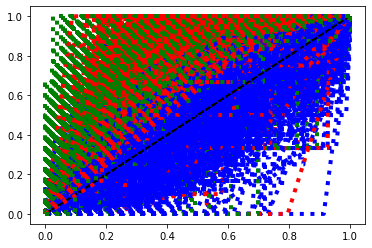

In [17]:
plotallll(indir='../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_gamma0')

# plotallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma0')
# plotallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma5')
# plotallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma10')
# plotallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma20')
# plotallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma50')
# plotallll(indir='../../d/tmp/redmo/data/MotifPipeline/camb_motif_pipeline_gamma100')
# plotallll(indir='../../d/tmp/redmo/data/MotifPipeline/camb_motif_pipeline_gamma250')
# plotallll(indir='../../d/tmp/redmo/data/MotifPipeline/camb_motif_pipeline_gamma500')



In [18]:
def plotallll(indir):
    traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
    indices = [i for i, s in enumerate(traces) if 'txt' not in s]

    aurocs = pd.DataFrame()

    # os.makedirs(indir+'/test')


    # trace=traces[0]
    for i,trace in enumerate(indices):
        trace=traces[i]
    #     plt.subplot(2, 2, 3)
        if 'pc' in trace:
            combo=(trace).split('/')[7]

        elif 'd/tmp' in trace:
            combo=(trace).split('/')[8]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
        TF=combo.split('_')[1]
        cell=combo.split('_')[0]
    #     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
        try:
            data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,9,10,11],names=["chr", "start", "end",'pwm',"W1",'array','ChIPTF'])

            Col1=os.path.basename(trace).split('_')[0] #cell
            Col2=os.path.basename(trace).split('_')[1] #TF


            table2=[]
            tbl=[]
            tmpTBL2=[]
            tmpTBL=[]
            table3=[]
            tblC=[]
            tmpTBLC=[]
            data.pwm=(data.pwm-data.pwm.min())/(data.pwm.max()-data.pwm.min())
            data=data.fillna(0)
            data.ChIPTF=data.ChIPTF.replace('.',0)
            # print(data.shape)
            data.ChIPTF[(data.ChIPTF==Col2)]=1
            data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
            data.ChIPTF=pd.to_numeric(data.ChIPTF)

            if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

                plt.plot([0, 1], [0, 1], 'k--')
                fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
                roc_auc=metrics.auc(fpr, tpr)
                plt.plot(fpr, tpr,
                         label='pwm (area = {0:0.2f})'
                             ''.format(roc_auc),
                         color='b', linestyle=':', linewidth=4)

                fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
                roc_auc2=metrics.auc(fpr2, tpr2)
                plt.plot(fpr2, tpr2,
                         label='wgbs (area = {0:0.2f})'
                               ''.format(roc_auc2),
                         color='r', linestyle=':', linewidth=4)

                fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.array/100))
                roc_auc3=metrics.auc(fpr, tpr)
                plt.plot(fpr, tpr,
                         label='array (area = {0:0.2f})'
                             ''.format(roc_auc),
                         color='g', linestyle=':', linewidth=4)



#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
#                 plt.title('AUROC for '+TF+' in '+cell)
#                 plt.legend(loc="best")

#                 plt.show()

                Col1=cell
                Col2=TF
                Col3=roc_auc #motif auroc
                Col4=roc_auc2
                Col5=roc_auc3
                Col6=data.shape[0]
                column = [Col1, Col2, Col3, Col4,Col5,Col6]
                column=np.transpose(pd.DataFrame((column)))
                column.to_csv(indir+'/test/camb_PRE_window_methyl.txt',mode='a',header=False,index=False)
                aurocs=pd.concat([aurocs,column],axis=0)
                print("AUROC calculated for "+TF+" in "+cell)
        except:
            pass

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))


[(518,), (156,), (595,), (592,), (475,), (1,)]


/udd/redmo/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/udd/redmo/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


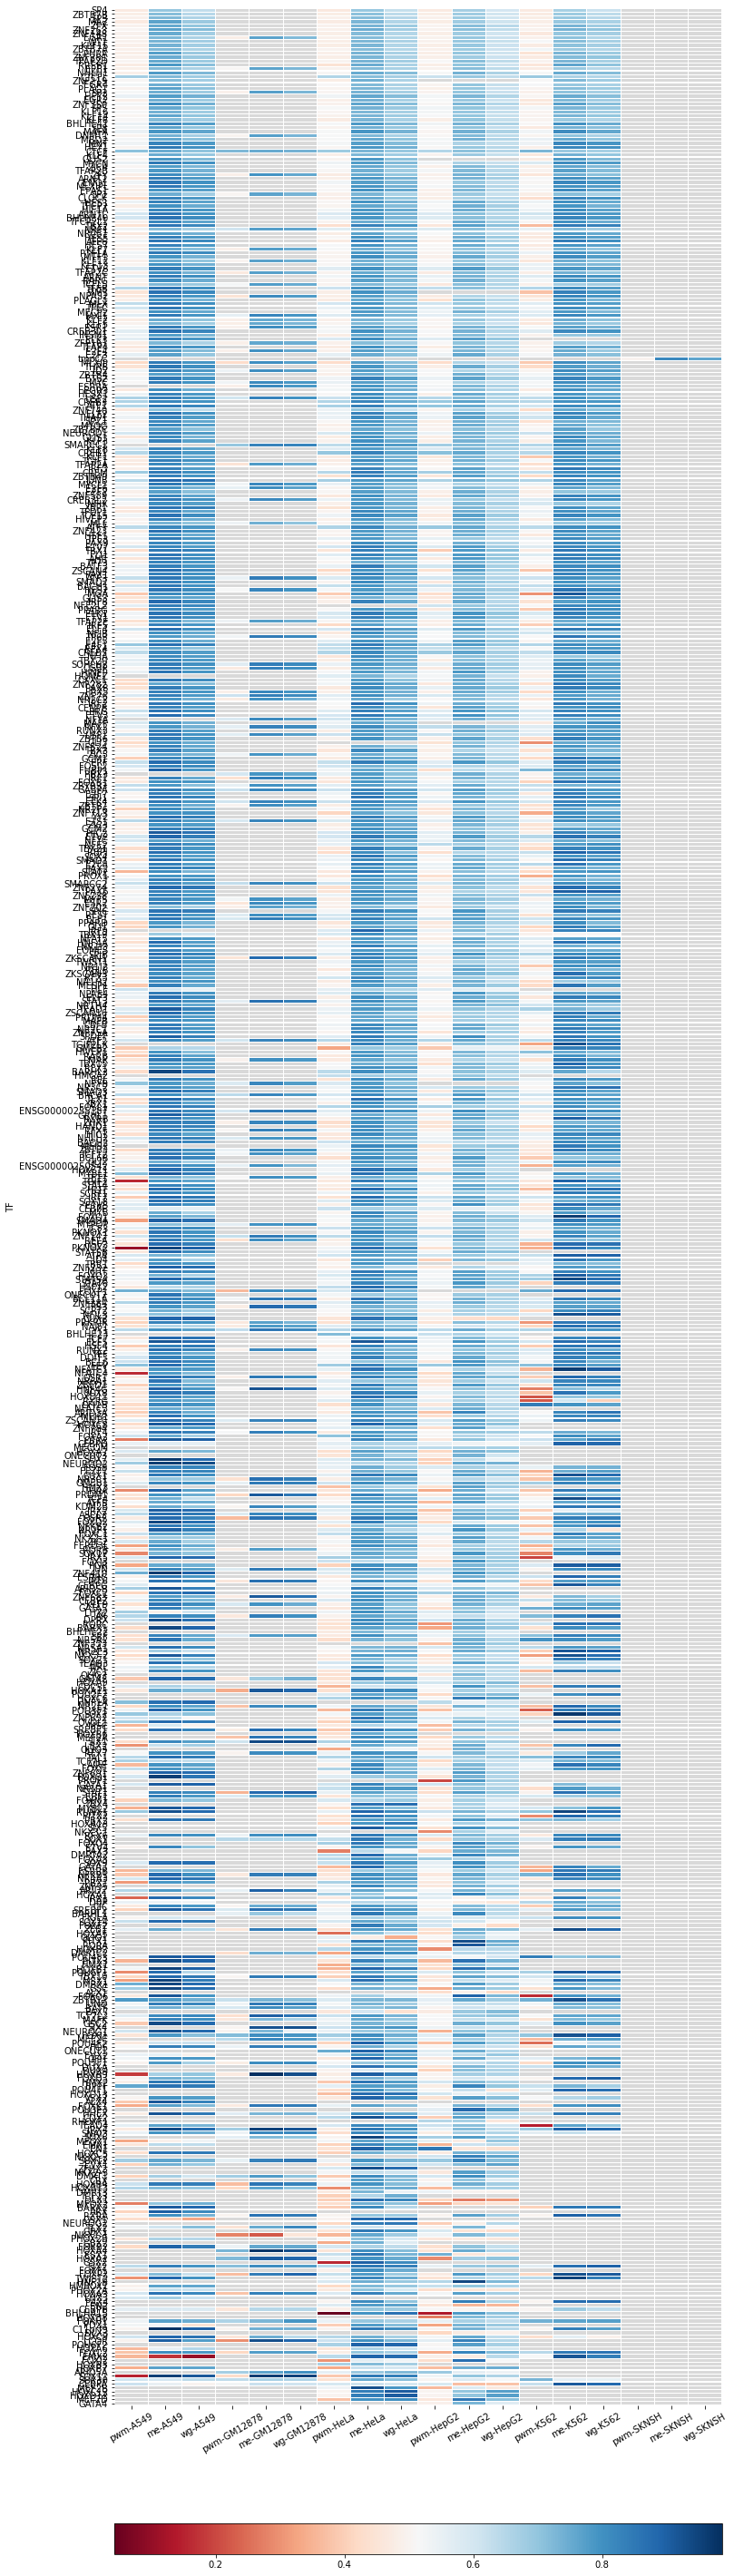

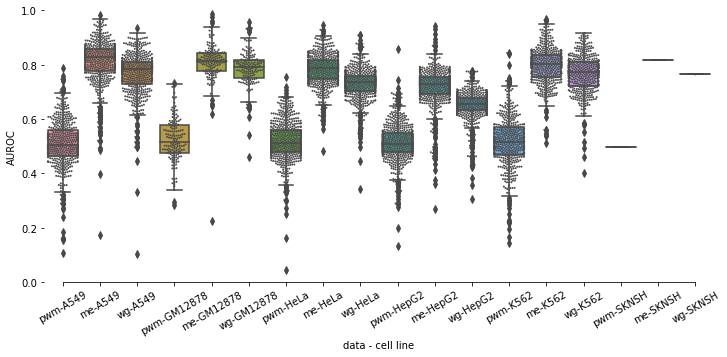

In [22]:
melt,heat=heatallll(indir='../../d/tmp/redmo/data/MotifPipeline/cbus_motif_pipeline_gamma0')

# melt,heat=heatallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma0')
#     heatallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma5')
#     heatallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma10')
#     heatallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma20')
#     heatallll(indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma50')
#     heatallll(indir='../../d/tmp/redmo/data/MotifPipeline/camb_motif_pipeline_gamma100')
# heatallll(indir='../../d/tmp/redmo/data/MotifPipeline/camb_motif_pipeline_gamma250')
# heatallll(indir='../../d/tmp/redmo/data/MotifPipeline/camb_motif_pipeline_gamma500')

# except:
#     pass

In [ ]:
aurocs=pd.read_csv(indir+'/test/camb_PRE_window_methyl.txt',names=['cell','TF','pwm','wgbs','array','counts'])


In [21]:
# indir='../../pc/redmo/data/MotifPipeline/camb_motif_pipeline_gamma0'
def heatallll(indir):
    aurocs=pd.read_csv(indir+'/test/camb_PRE_window_methyl.txt',names=['cell','TF','pwm','wgbs','array','counts'])

    aurocs.columns=['cell','TF','pwm','wgbs','array','counts']
    ##sum across cells and sort
    heat=aurocs.pivot_table(index=['TF'], columns='cell',aggfunc='first')# heat=heat[[measure]]
    heat['mean']=np.nanmean(heat,axis=1)
    heat['count']=heat.isnull().sum(axis=1)

    heat['weight']=heat['mean']*(heat['count'])
    heat=heat.sort_values(by=['weight'],ascending=False)

    heat=heat.dropna(axis=1, how='all')
    del heat['count']
    del heat['mean']
    del heat['weight']

    heat=pd.DataFrame(heat.to_records())

    heat.columns=['TF','me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
                  'counts-A549','counts-GM12878','counts-HeLa','counts-HepG2','counts-K562','counts-SKNSH',
                  'pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
                'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

    heat=heat[['TF','pwm-A549','me-A549','wg-A549',
               'pwm-GM12878','me-GM12878','wg-GM12878',
               'pwm-HeLa', 'me-HeLa','wg-HeLa',
               'pwm-HepG2','me-HepG2','wg-HepG2',
               'pwm-K562','me-K562','wg-K562',
               'pwm-SKNSH','me-SKNSH','wg-SKNSH']]
    heat55=heat
    heat=heat.set_index('TF')

    plt.figure(figsize=(12, 60))
    rdgn = plt.get_cmap("RdBu")
    rdgn.set_bad(color='black', alpha=0.15)
    # rdgn.set_bad(color='red')
    ax = sns.heatmap(heat,linewidth=.1,cmap=rdgn, cbar=False,mask=heat.isnull(),yticklabels=True)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
    #cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
    mappable = ax.get_children()[0]
    plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40

    plt.xticks(rotation=30)

    plt.savefig(indir+"/test/camb_auroc_heat.png",dpi=300,bbox_inches = "tight")
    plt.show

    print([(heat55['pwm-A549'].dropna().shape),(heat55['pwm-GM12878'].dropna().shape),(heat55['pwm-HeLa'].dropna().shape),(heat55['pwm-HepG2'].dropna().shape),(heat55['pwm-K562'].dropna().shape),(heat55['pwm-SKNSH'].dropna().shape)])

    box=heat55
    # box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
    meltbox=pd.melt(box,id_vars=['TF'])
    # del box.TF
    # if measure=='auroc':
    meltbox.columns=['TF','data - cell line','AUROC']
    plt.figure(figsize=(12, 5))
    plt.xticks(rotation=30)
    g=sns.boxplot(x='data - cell line',y='AUROC', data=meltbox)
    g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox,
                  size=2, color=".3", linewidth=0)

    g.set(ylim=(0, 1))
    plt.savefig(indir+"/test/camb_auroc_box.png",dpi=300,bbox_inches = "tight")
    # meltbox.to_csv(outdir+measure+"meltbox.txt")

    plt.show

    sns.despine(trim=True, left=True)
    # plt.show()


    t0a, p0a = stats.ttest_ind(box['pwm-A549'].dropna(),box['wg-A549'].dropna())
    t0b, p0b = stats.ttest_ind(box['pwm-A549'].dropna(),box['me-A549'].dropna())
    t1a, p1a = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['wg-GM12878'].dropna())
    t1b, p1b = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['me-GM12878'].dropna())
    t2a, p2a = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['wg-HeLa'].dropna())
    t2b, p2b = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['me-HeLa'].dropna())
    t3a, p3a = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['wg-HepG2'].dropna())
    t3b, p3b = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['me-HepG2'].dropna())
    t4a, p4a = stats.ttest_ind(box['pwm-K562'].dropna(),box['wg-K562'].dropna())
    t4b, p4b = stats.ttest_ind(box['pwm-K562'].dropna(),box['me-K562'].dropna())
    t5a, p5a = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['wg-SKNSH'].dropna())
    t5b, p5b = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['me-SKNSH'].dropna())


    # initialise data of lists. 
    ttest = {'WG ttest':[t0a,t1a,t2a,t3a,t4a,t5a], 'WG pvalue':[p0a,p1a,p2a,p3a,p4a,p5a], 'Me ttest':[t0b,t1b,t2b,t3b,t4b,t5b],'Me pvalue':[p0b,p1b,p2b,p3b,p4b,p5b]} 

    # Creates pandas DataFrame. 
    df_ttest = pd.DataFrame(ttest, index =['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']) 

    df_ttest.to_csv(indir+"/test/camb_auroc_ttest.txt")
    meltbox.to_csv(indir+"/test/camb_auroc_meltbox.txt",sep='\t')
    return meltbox,heat

In [ ]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
traces= glob.glob('data/MotifPipeline/sthlm_motif_0_QCbeta/red/test/**/all/*.txt',recursive = True)
indices = [i for i, s in enumerate(traces) if 'camb_auroc_meltbox' in s]
method='AUROC'

for jac in (indices):
    trace=traces[jac]
    buffer=(trace).split('/')[2]
    buffer=(buffer).split('_')[2]
    region=(trace).split('/')[5]
    depth=(trace).split('/')[6]
    meltbox=pd.read_csv(trace,sep='\t')
    meltbox['buffer']=buffer
    meltbox['region']=region
    meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox['depth']=allbox['depth'].replace('all',0)
# from pathlib import Path
# outdir='data/MotifPipeline/compare'
# Path(outdir).mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
allbox['data']=allbox['data - cell line'].str.split('-').str[0].tolist()
type=pd.unique(allbox['data'])
allbox['cell']=allbox['data - cell line'].str.split('-').str[1].tolist()
cells=pd.unique(allbox['cell'])
# cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
# tests=['pwm','me','wg']
allbox['depth']=allbox.depth.astype(int)
allbox2=allbox.sort_values('cell', axis=0)
# for cell in cells:
# it='pwm'
#     for test in tests:
#     allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
#     allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]
#     allbox2.buffer=(allbox2.buffer).astype(int)
#     allbox2=allbox2.sort_values(by='cell')
    
# allbox2=allbox[allbox['cell']==cell]
#     allbox2=allbox2[allbox2.TF.isin(allbox2[allbox2['depth']==50]['TF'])]
#     allbox2=allbox2[allbox2['data']!='me']
# allbox2=allbox2.sort_values('data', axis=0)
aa=allbox2[allbox2['data']=='pwm']
bb=allbox2[allbox2['data']=='wg']
cc=allbox2[allbox2['data']=='me']
dd=(cc.merge(bb,left_on=['TF','region'],right_on=['TF','region']))
dd['diff_AUROC']=(dd['AUROC_x']-dd['AUROC_y'])
dd['data']='me-wg'
dd['depth']=dd['depth_y']
dd['cell']=dd['cell_y']
allbox2=pd.concat([dd])
g=sns.boxplot(x='region',y='diff_AUROC', data=allbox2,hue='cell',fliersize=1)#.set(title = cell)
# g=sns.swarmplot(x='cell',y=method.upper(), data=allbox2,size=2, color=".3", linewidth=0,hue='data',palette="colorblind")
plt.axhline(y=0, xmin=-1, xmax=6)

g.set(ylim=(-.75, .75))
#     plt.title=it
#     g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#         plt.savefig(outdir+"/sthlm_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
#     plt.close()
# return

## TSS analysis

array([ 148.,    0., 1784.,    0.,   86.,    0.,   94.,    0.,  184.,
        156.])

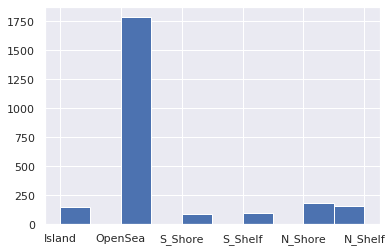

In [134]:
c=plt.hist(data.body)
c[0]

['GM12878', 'NRF1', 0.7326061783374007, 0.6827676981932502, 0.7347935954806907, 3225, 119]
AUROC calculated for NRF1 in GM12878
['GM12878', 'NRF1', 0.7004286594231743, 0.6078834783847544, 0.6401198821710363, 2523, 206]
AUROC calculated for NRF1 in GM12878
['GM12878', 'NRF1', 0.8100592166087374, 0.7375100937401257, 0.779719481796159, 2269, 78]
AUROC calculated for NRF1 in GM12878
['GM12878', 'NRF1', 0.6618574973413683, 0.8560439560439561, 0.870967741935484, 1098, 13]
AUROC calculated for NRF1 in GM12878
['GM12878', 'NRF1', 0.7088923511930523, 0.8237254392798408, 0.9272411206324476, 3869, 18]
AUROC calculated for NRF1 in GM12878
['HepG2', 'ETV4', 0.49056603773584906, 0.8301886792452831, 0.8710691823899372, 59, 6]
AUROC calculated for ETV4 in HepG2
['GM12878', 'E2F4', 0.7064048620850865, 0.7171575502571295, 0.8878499818191262, 2148, 9]
AUROC calculated for E2F4 in GM12878
['GM12878', 'E2F4', 0.7635946940759775, 0.6711229946524064, 0.7582471004930897, 1320, 11]
AUROC calculated for E2F4 in

['K562', 'EGR1', 0.681591836617304, 0.6729424013298859, 0.7259365140538223, 4448, 433]
AUROC calculated for EGR1 in K562
['K562', 'EGR1', 0.6599344433425545, 0.6072218502307756, 0.656316986421898, 14910, 1225]
AUROC calculated for EGR1 in K562
['HeLa', 'NFE2L2', 0.7641070389761488, 0.7175683536940081, 0.679173938336242, 391, 9]
AUROC calculated for NFE2L2 in HeLa
['HeLa', 'NFE2L2', 0.7453598484848485, 0.6717487373737374, 0.6541035353535354, 1006, 16]
AUROC calculated for NFE2L2 in HeLa
['K562', 'TFDP1', 0.6739062008183822, 0.7249763928234184, 0.8613865281712306, 742, 36]
AUROC calculated for TFDP1 in K562
['K562', 'TFDP1', 0.6809925629290617, 0.6799199084668193, 0.7991990846681922, 327, 23]
AUROC calculated for TFDP1 in K562
['K562', 'TFDP1', 0.5533923303834809, 0.7480088495575221, 0.8311209439528023, 577, 12]
AUROC calculated for TFDP1 in K562
['K562', 'TFDP1', 0.6144071844845705, 0.7335912869016911, 0.7815037737651667, 1172, 9]
AUROC calculated for TFDP1 in K562
['K562', 'ATF2', 0.80

['HepG2', 'CREM', 0.6724228981833544, 0.8209495141529362, 0.9304499366286438, 1590, 12]
AUROC calculated for CREM in HepG2
['SKNSH', 'NRF1', 0.713070190691474, 0.6320625398481423, 0.6715614675708572, 4014, 180]
AUROC calculated for NRF1 in SKNSH
['SKNSH', 'NRF1', 0.6202763555015572, 0.580040402287213, 0.628203737452631, 3282, 276]
AUROC calculated for NRF1 in SKNSH
['SKNSH', 'NRF1', 0.7182280655136692, 0.7159790658179004, 0.7727066172194815, 2672, 101]
AUROC calculated for NRF1 in SKNSH
['SKNSH', 'NRF1', 0.6708604954367666, 0.8021838331160365, 0.8307529335071708, 1206, 26]
AUROC calculated for NRF1 in SKNSH
['SKNSH', 'NRF1', 0.6656651126180674, 0.7991392185355614, 0.8249853677242269, 4177, 48]
AUROC calculated for NRF1 in SKNSH
['HepG2', 'NR2F6', 0.823512585812357, 0.7075228832951945, 0.806350114416476, 445, 8]
AUROC calculated for NR2F6 in HepG2
['HepG2', 'NR2F6', 0.3032258064516129, 0.6774193548387097, 0.7010752688172043, 161, 6]
AUROC calculated for NR2F6 in HepG2
['HepG2', 'NR2F6',

['A549', 'FOSL2', 0.6486077481840193, 0.7589790153349476, 0.7898506860371267, 437, 24]
AUROC calculated for FOSL2 in A549
['A549', 'FOSL2', 0.6178683385579937, 0.806896551724138, 0.904075235109718, 156, 11]
AUROC calculated for FOSL2 in A549
['A549', 'FOSL2', 0.59086531337976, 0.860534894058379, 0.8757223292339605, 431, 34]
AUROC calculated for FOSL2 in A549
['A549', 'FOSL2', 0.6938841201716738, 0.6766094420600859, 0.7273605150214592, 253, 20]
AUROC calculated for FOSL2 in A549
['A549', 'FOSL2', 0.6841402232534805, 0.7806032860905556, 0.8049855763200803, 1209, 70]
AUROC calculated for FOSL2 in A549
['A549', 'ETS1', 0.7296102490075784, 0.8251533742331288, 0.8669553711054974, 995, 17]
AUROC calculated for ETS1 in A549
['A549', 'ETS1', 0.706544502617801, 0.7774869109947643, 0.8691099476439791, 407, 25]
AUROC calculated for ETS1 in A549
['K562', 'NFE2L2', 0.7576252723311546, 0.7369281045751634, 0.663761801016703, 315, 9]
AUROC calculated for NFE2L2 in K562
['K562', 'NFE2L2', 0.756085686465

['K562', 'E2F6', 0.6717952124586982, 0.6721418008734028, 0.7614460823956191, 1645, 113]
AUROC calculated for E2F6 in K562
['K562', 'E2F6', 0.6743892262760187, 0.6268311622085208, 0.7398938389504427, 920, 106]
AUROC calculated for E2F6 in K562
['K562', 'E2F6', 0.5996956820508506, 0.6936205421627609, 0.7604723238952698, 1308, 57]
AUROC calculated for E2F6 in K562
['K562', 'E2F6', 0.6909294512877939, 0.591545352743561, 0.6832506798912175, 677, 19]
AUROC calculated for E2F6 in K562
['K562', 'E2F6', 0.639791351386161, 0.5342676369256528, 0.5595839907267283, 2441, 52]
AUROC calculated for E2F6 in K562
['K562', 'NFE2', 0.8586206896551722, 0.6480437665782494, 0.7270557029177719, 342, 52]
AUROC calculated for NFE2 in K562
['K562', 'NFE2', 0.7810569663692519, 0.6561427590940289, 0.7497140242507435, 140, 47]
AUROC calculated for NFE2 in K562
['K562', 'NFE2', 0.8509508416943035, 0.5907602535577852, 0.617270475630746, 370, 83]
AUROC calculated for NFE2 in K562
['K562', 'NFE2', 0.8550295857988166, 0

['HeLa', 'ELK1', 0.6654234654234654, 0.864957264957265, 0.8910644910644911, 596, 11]
AUROC calculated for ELK1 in HeLa
['HeLa', 'ELK1', 0.6620317460317461, 0.8342222222222222, 0.8925714285714286, 340, 25]
AUROC calculated for ELK1 in HeLa
['HeLa', 'ELK1', 0.6687995124923827, 0.9223034734917733, 0.9366240097501524, 553, 6]
AUROC calculated for ELK1 in HeLa
['HepG2', 'SMAD4', 0.41904761904761906, 0.7996598639455783, 0.8673469387755103, 251, 6]
AUROC calculated for SMAD4 in HepG2
['HepG2', 'SMAD4', 0.8099296536796536, 0.6264880952380951, 0.6458333333333333, 535, 7]
AUROC calculated for SMAD4 in HepG2
['SKNSH', 'YY1', 0.772127659574468, 0.8305437352245864, 0.8411820330969267, 473, 50]
AUROC calculated for YY1 in SKNSH
['SKNSH', 'YY1', 0.7676107480029049, 0.7352941176470589, 0.7530864197530864, 198, 45]
AUROC calculated for YY1 in SKNSH
['SKNSH', 'YY1', 0.8061773255813953, 0.815843023255814, 0.8851744186046512, 364, 20]
AUROC calculated for YY1 in SKNSH
['SKNSH', 'YY1', 0.775169535732916, 0

['K562', 'PLAG1', 0.5579661083473157, 0.6294437412302649, 0.6569328741181204, 3023, 69]
AUROC calculated for PLAG1 in K562
['K562', 'PLAG1', 0.4674680691209617, 0.5726127866623735, 0.6761010339522736, 1892, 77]
AUROC calculated for PLAG1 in K562
['K562', 'PLAG1', 0.5773565573770492, 0.5700507840342124, 0.642320028510335, 2486, 46]
AUROC calculated for PLAG1 in K562
['K562', 'PLAG1', 0.582050546930134, 0.5713104269583628, 0.6630866266760762, 1449, 32]
AUROC calculated for PLAG1 in K562
['K562', 'PLAG1', 0.5510616438356165, 0.546912100456621, 0.5599514840182649, 4747, 75]
AUROC calculated for PLAG1 in K562
['HepG2', 'JUND', 0.446520618556701, 0.7422680412371134, 0.8698453608247423, 105, 8]
AUROC calculated for JUND in HepG2
['HepG2', 'JUND', 0.6873638344226579, 0.6971677559912854, 0.7391067538126361, 120, 18]
AUROC calculated for JUND in HepG2
['HepG2', 'JUND', 0.6239128401758159, 0.6379407088749649, 0.6883942766295709, 326, 37]
AUROC calculated for JUND in HepG2
['GM12878', 'ELF1', 0.57

['HepG2', 'MXI1', 0.6053153372525829, 0.7975614846766619, 0.869942950568755, 1725, 34]
AUROC calculated for MXI1 in HepG2
['HepG2', 'MXI1', 0.6919561243144423, 0.7646556977452772, 0.9399146861669714, 562, 15]
AUROC calculated for MXI1 in HepG2
['HepG2', 'MXI1', 0.7060191797592328, 0.7943582942256683, 0.8671903693123852, 1719, 29]
AUROC calculated for MXI1 in HepG2
['HepG2', 'MXI1', 0.6271332446021887, 0.732745489500148, 0.8323055309080154, 4858, 28]
AUROC calculated for MXI1 in HepG2
['HeLa', 'NFYB', 0.7765938395415473, 0.7970093123209169, 0.8741045845272206, 365, 16]
AUROC calculated for NFYB in HeLa
['HeLa', 'NFYB', 0.5447214076246334, 0.7437159614578969, 0.7444490992878089, 239, 22]
AUROC calculated for NFYB in HeLa
['HepG2', 'ZBTB7A', 0.5739545503577722, 0.6643635750104413, 0.755331316053692, 5415, 137]
AUROC calculated for ZBTB7A in HepG2
['HepG2', 'ZBTB7A', 0.5520599877096588, 0.6222041732938115, 0.7308347491324465, 4064, 112]
AUROC calculated for ZBTB7A in HepG2
['HepG2', 'ZBTB7

['K562', 'ETV6', 0.6189311594202899, 0.7875000000000001, 0.9506340579710145, 932, 12]
AUROC calculated for ETV6 in K562
['K562', 'ETV6', 0.5689604898673276, 0.7051319434319873, 0.7920250765417699, 380, 19]
AUROC calculated for ETV6 in K562
['K562', 'ETV6', 0.6163139329805996, 0.8012345679012345, 0.9345679012345679, 817, 7]
AUROC calculated for ETV6 in K562
['A549', 'FOSL1', 0.6354907539118065, 0.8428165007112376, 0.8539930908351961, 717, 14]
AUROC calculated for FOSL1 in A549
['HeLa', 'CEBPB', 0.6119909502262444, 0.6825037707390649, 0.7375565610859728, 73, 34]
AUROC calculated for CEBPB in HeLa
['HeLa', 'CEBPB', 0.6015625, 0.68359375, 0.6796875, 24, 8]
AUROC calculated for CEBPB in HeLa
['HeLa', 'CEBPB', 0.573170731707317, 0.6010452961672474, 0.5909407665505226, 76, 35]
AUROC calculated for CEBPB in HeLa
['HeLa', 'CEBPB', 0.47066326530612246, 0.5306122448979591, 0.4209183673469388, 42, 14]
AUROC calculated for CEBPB in HeLa
['HeLa', 'CEBPB', 0.611358173076923, 0.5693509615384615, 0.539

['A549', 'REST', 0.8717559523809524, 0.7063194444444445, 0.6773412698412699, 1828, 28]
AUROC calculated for REST in A549
['HeLa', 'CTCF', 0.8027385606704716, 0.7633749415616593, 0.7910315913197771, 6450, 3566]
AUROC calculated for CTCF in HeLa
['HeLa', 'CTCF', 0.7989158228974458, 0.7345249524648052, 0.7662996543746429, 4182, 2410]
AUROC calculated for CTCF in HeLa
['HeLa', 'CTCF', 0.8254278053781248, 0.7787814577482889, 0.7907113071883394, 5941, 3123]
AUROC calculated for CTCF in HeLa
['HeLa', 'CTCF', 0.8388786827243656, 0.7630128597672995, 0.7815200381030143, 489, 213]
AUROC calculated for CTCF in HeLa
['HeLa', 'CTCF', 0.820578851435932, 0.8193268890980255, 0.836950356255323, 3460, 1867]
AUROC calculated for CTCF in HeLa
['HeLa', 'CTCF', 0.8376588612593789, 0.8326770283765463, 0.8564928349198839, 15536, 9868]
AUROC calculated for CTCF in HeLa
['K562', 'STAT2', 0.767094017094017, 0.7628205128205129, 0.7775641025641026, 402, 12]
AUROC calculated for STAT2 in K562
['K562', 'STAT2', 0.830

['K562', 'ETS1', 0.8537508846426043, 0.5676928520877564, 0.5472753007784854, 1579, 9]
AUROC calculated for ETS1 in K562
['K562', 'ELF4', 0.6462488740187877, 0.7787286063569683, 0.8641101531334447, 428, 19]
AUROC calculated for ELF4 in K562
['K562', 'ELF4', 0.5849415947181311, 0.7522854240731336, 0.8854748603351956, 201, 22]
AUROC calculated for ELF4 in K562
['K562', 'ELF4', 0.5108597285067873, 0.7461538461538462, 0.8762443438914027, 452, 10]
AUROC calculated for ELF4 in K562
['K562', 'ELF4', 0.7647294589178357, 0.6953907815631263, 0.6963927855711423, 1008, 10]
AUROC calculated for ELF4 in K562
['K562', 'GATA1', 0.5719280719280719, 0.7272727272727273, 0.855144855144855, 102, 11]
AUROC calculated for GATA1 in K562
['K562', 'GATA1', 0.7205882352941176, 0.5588235294117647, 0.7156862745098038, 23, 6]
AUROC calculated for GATA1 in K562
['K562', 'GATA1', 0.2575581395348837, 0.527906976744186, 0.5755813953488372, 96, 10]
AUROC calculated for GATA1 in K562
['K562', 'GATA1', 0.4087301587301587, 

['K562', 'THAP1', 0.5961680403493665, 0.7894882519375077, 0.8891622585803912, 761, 22]
AUROC calculated for THAP1 in K562
['K562', 'THAP1', 0.7697278911564626, 0.676530612244898, 0.8585034013605441, 257, 12]
AUROC calculated for THAP1 in K562
['K562', 'THAP1', 0.7462809917355371, 0.7590318772136954, 0.9641086186540732, 612, 7]
AUROC calculated for THAP1 in K562
['A549', 'GABPA', 0.6775058066821512, 0.7740932642487047, 0.8134893693049848, 994, 29]
AUROC calculated for GABPA in A549
['A549', 'GABPA', 0.6466389466389466, 0.7464541464541465, 0.8095172095172095, 594, 39]
AUROC calculated for GABPA in A549
['A549', 'GABPA', 0.8306756534604636, 0.8533207299030084, 0.9213381555153708, 883, 14]
AUROC calculated for GABPA in A549
['A549', 'GABPA', 0.6813590449954087, 0.8864292273383182, 0.9437229437229437, 1703, 9]
AUROC calculated for GABPA in A549
['K562', 'CEBPB', 0.5853202431042543, 0.5974754558204769, 0.675549322113137, 116, 93]
AUROC calculated for CEBPB in K562
['K562', 'CEBPB', 0.7119341

['HeLa', 'RELA', 0.6549376640419947, 0.8465387139107611, 0.8279199475065617, 520, 12]
AUROC calculated for RELA in HeLa
['HeLa', 'RELA', 0.30098934550989354, 0.7633181126331812, 0.8730974124809741, 231, 12]
AUROC calculated for RELA in HeLa
['HeLa', 'RELA', 0.5528964862298196, 0.621937321937322, 0.5998100664767331, 418, 13]
AUROC calculated for RELA in HeLa
['HeLa', 'RELA', 0.6676122001909791, 0.7542549008594057, 0.75936639892153, 956, 19]
AUROC calculated for RELA in HeLa
['GM12878', 'TCF12', 0.5508681084374047, 0.7982028632348461, 0.8473956746877855, 490, 21]
AUROC calculated for TCF12 in GM12878
['GM12878', 'TCF12', 0.5182291666666667, 0.7781862745098039, 0.8023897058823529, 220, 16]
AUROC calculated for TCF12 in GM12878
['GM12878', 'TCF12', 0.4422133660331085, 0.8435775597792765, 0.8772225628448804, 480, 14]
AUROC calculated for TCF12 in GM12878
['GM12878', 'TCF12', 0.34455624355005154, 0.7880546955624355, 0.8387512899896801, 335, 12]
AUROC calculated for TCF12 in GM12878
['GM12878

['HeLa', 'E2F1', 0.5429362025779307, 0.7803718225214538, 0.8400127341117858, 10920, 481]
AUROC calculated for E2F1 in HeLa
['HeLa', 'E2F1', 0.5546839578102014, 0.7292095629100995, 0.80637519636947, 7913, 591]
AUROC calculated for E2F1 in HeLa
['HeLa', 'E2F1', 0.5379255525017514, 0.8162303972721527, 0.8626263368558228, 7447, 285]
AUROC calculated for E2F1 in HeLa
['HeLa', 'E2F1', 0.6186641852770886, 0.8884615384615384, 0.9513647642679901, 3139, 39]
AUROC calculated for E2F1 in HeLa
['HeLa', 'E2F1', 0.623353496523263, 0.9023539817589086, 0.9227250456969491, 10192, 84]
AUROC calculated for E2F1 in HeLa
['HepG2', 'HLF', 0.6081174838112858, 0.8164893617021276, 0.866558741905643, 140, 46]
AUROC calculated for HLF in HepG2
['HepG2', 'HLF', 0.5340659340659341, 0.8021978021978022, 0.8890109890109891, 61, 26]
AUROC calculated for HLF in HepG2
['HepG2', 'HLF', 0.6191841415465268, 0.7029816513761469, 0.7377129750982963, 165, 56]
AUROC calculated for HLF in HepG2
['HepG2', 'HLF', 0.6109311740890688

['A549', 'MAX', 0.5983964578471848, 0.7993178962484294, 0.9004966193980734, 646, 27]
AUROC calculated for MAX in A549
['A549', 'MAX', 0.47742929659173305, 0.8240572878897752, 0.9379985496736767, 225, 28]
AUROC calculated for MAX in A549
['A549', 'MAX', 0.4984902621911328, 0.8611796084746615, 0.8929092647576871, 672, 31]
AUROC calculated for MAX in A549
['A549', 'MAX', 0.371900826446281, 0.8467723922269377, 0.8934554389099844, 418, 11]
AUROC calculated for MAX in A549
['A549', 'MAX', 0.43003522254242715, 0.7911143131604226, 0.8169788664745437, 1771, 36]
AUROC calculated for MAX in A549
['K562', 'CTCFL', 0.7610904367754711, 0.6861420299045458, 0.7891287297243175, 2816, 284]
AUROC calculated for CTCFL in K562
['K562', 'CTCFL', 0.7625808860129417, 0.617698136165035, 0.729940268790443, 1721, 245]
AUROC calculated for CTCFL in K562
['K562', 'CTCFL', 0.7725006301594304, 0.6669633667317832, 0.7492201777049593, 2435, 168]
AUROC calculated for CTCFL in K562
['K562', 'CTCFL', 0.8390827922077922, 

['GM12878', 'USF1', 0.6252936551428367, 0.607776798265469, 0.7413618927354602, 2304, 95]
AUROC calculated for USF1 in GM12878
['GM12878', 'BHLHE40', 0.6672013562858634, 0.729518779342723, 0.8302197443922796, 1636, 216]
AUROC calculated for BHLHE40 in GM12878
['GM12878', 'BHLHE40', 0.7058839597902098, 0.7181217220279719, 0.8604494463869463, 557, 128]
AUROC calculated for BHLHE40 in GM12878
['GM12878', 'BHLHE40', 0.6008173198883815, 0.7083353151953321, 0.7701753551496702, 1506, 192]
AUROC calculated for BHLHE40 in GM12878
['GM12878', 'BHLHE40', 0.5411782026979775, 0.7038021973977217, 0.7932256105416199, 878, 67]
AUROC calculated for BHLHE40 in GM12878
['GM12878', 'BHLHE40', 0.5915839003705113, 0.6444388092923659, 0.7411722994707652, 3882, 297]
AUROC calculated for BHLHE40 in GM12878
['K562', 'MAX', 0.5450990863834901, 0.6560777432337066, 0.7364435713059566, 590, 109]
AUROC calculated for MAX in K562
['K562', 'MAX', 0.4053334724976516, 0.6010332950631457, 0.7059805865776014, 210, 67]
AURO

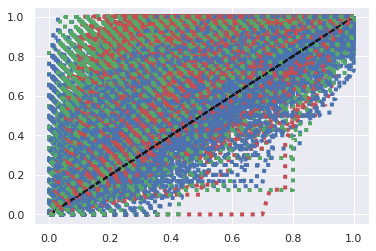

In [135]:
import shutil

indir='../../d/tmp/redmo/data/MotifPipeline/sthlm_motif_0_QCbeta'
traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
indices = [i for i, s in enumerate(traces) if 'txt' not in s]
www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR","0"]
aurocs = pd.DataFrame()

dir=(indir+'/test/')
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# trace=traces[0]
for i,trace in enumerate(indices):
    trace=traces[i]
#     plt.subplot(2, 2, 3)
    if 'pc' in trace:
        combo=(trace).split('/')[7]

    elif 'd/tmp' in trace:
        combo=(trace).split('/')[8]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
#     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
    for TSS in enumerate(www):
        Col1=os.path.basename(trace).split('_')[0] #cell
        Col2=os.path.basename(trace).split('_')[1] #TF
        TSS=TSS[1]
#         if Col1=='GM12878':
#             data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','xxx','body','ChIPTF'])
#             cc=data.body.str.find(TSS)
#             cc[cc!=-1]=TSS
#             data['TSS']=cc
#             print(Col2+'in'+Col1)
#         else:
        try:
            data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,16],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','body','TSS','ChIPTF'])
#                 break
        except:
            pass
        data=data[data['TSS']==TSS]


        table2=[]
        tbl=[]
        tmpTBL2=[]
        tmpTBL=[]
        table3=[]
        tblC=[]
        tmpTBLC=[]
#         data.pwm=(data.pwm-data.pwm.min())/(data.pwm.max()-data.pwm.min())
        data=data.fillna(0)
        data.ChIPTF=data.ChIPTF.replace('.',0)
        # print(data.shape)
        data.ChIPTF[(data.ChIPTF==Col2)]=1
        data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
        data.ChIPTF=pd.to_numeric(data.ChIPTF)

        if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

            plt.plot([0, 1], [0, 1], 'k--')
            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, (data.pwm))
            roc_auc=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc),
                     color='b', linestyle=':', linewidth=4)

            fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
            roc_auc2=metrics.auc(fpr2, tpr2)
            plt.plot(fpr2, tpr2,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc2),
                     color='r', linestyle=':', linewidth=4)

            fpr3, tpr3, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.array))
            roc_auc3=metrics.auc(fpr3, tpr3)
            plt.plot(fpr3, tpr3,
                     label='array (area = {0:0.2f})'
                         ''.format(roc_auc3),
                     color='g', linestyle=':', linewidth=4)



#             plt.xlabel('False Positive Rate')
#             plt.ylabel('True Positive Rate')
#             plt.title('AUROC for '+TF+' in '+cell)
#             plt.legend(loc="best")

#             plt.show()

            Col1=cell
            Col2=TF
            Col3=roc_auc #motif auroc
            Col4=roc_auc2
            Col5=roc_auc3
            Col6=data.shape[0]
            Col7=np.sum(data.ChIPTF)
            column = [Col1, Col2, Col3, Col4,Col5,Col6,Col7]
            print(column)
            column=np.transpose(pd.DataFrame((column)))
            column.to_csv(indir+'/test/'+TSS+'_PRE_window_methyl.txt',mode='a',header=False,index=False)
            aurocs=pd.concat([aurocs,column],axis=0)
            print("AUROC calculated for "+TF+" in "+cell)
#     except:
#         pass

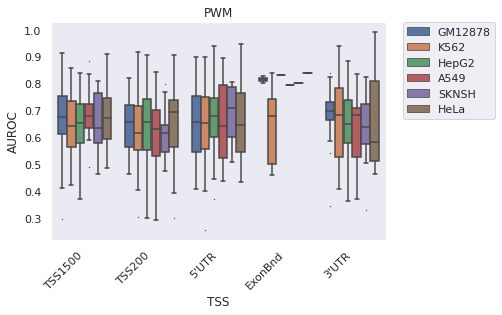

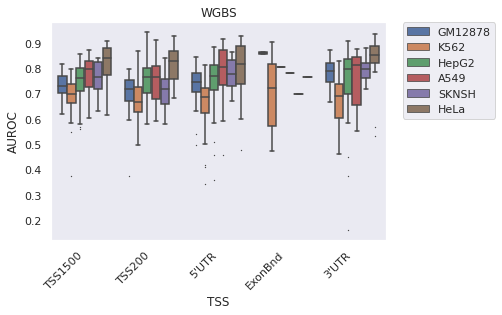

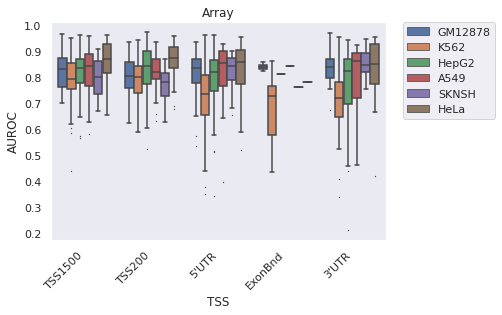

In [136]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR",'overlap']
indir='../../d/tmp/redmo/data/MotifPipeline/sthlm_motif_0_QCbeta'
traces= glob.glob(indir+'/test/*_PRE_window_methyl.txt',recursive = True)
# indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for i,trace in enumerate(traces):
#     trace=traces[jac]
    TSS=(traces[i]).split('/')[9]
    TSS=(TSS).split('_')[0]
#     region=(trace).split('/')[5]
#     depth=(trace).split('/')[6]
    meltbox=pd.read_csv(traces[i],sep=',',names=['cell','TF','pwm','wg','array','size','yes'])
    meltbox['TSS']=TSS
#     print(pd.unique(meltbox.cell))
#     meltbox['buffer']=buffer
    
#     meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox00=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['pwm','wg','array'])
allbox11=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['pwm'])
allbox22=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['wg'])
allbox33=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['array'])




allbox11=allbox11[allbox11.cell!='overlap']
allbox11['AUROC']=allbox11['value']
del allbox11['value']
aa=allbox11[allbox11['TSS']==www[0]]
bb=allbox11[allbox11['TSS']==www[1]]
cc=allbox11[allbox11['TSS']==www[2]]
dd=allbox11[allbox11['TSS']==www[3]]
ee=allbox11[allbox11['TSS']==www[4]]
ff=allbox11[allbox11['TSS']==www[5]]
allboxx11=pd.concat([aa,bb,cc,dd,ee,ff])

allbox22=allbox22[allbox22.cell!='overlap']
allbox22['AUROC']=allbox22['value']
del allbox22['value']
aa=allbox22[allbox22['TSS']==www[0]]
bb=allbox22[allbox22['TSS']==www[1]]
cc=allbox22[allbox22['TSS']==www[2]]
dd=allbox22[allbox22['TSS']==www[3]]
ee=allbox22[allbox22['TSS']==www[4]]
ff=allbox22[allbox22['TSS']==www[5]]
allboxx22=pd.concat([aa,bb,cc,dd,ee,ff])

allbox33=allbox33[allbox33.cell!='overlap']
allbox33['AUROC']=allbox33['value']
del allbox33['value']
aa=allbox33[allbox33['TSS']==www[0]]
bb=allbox33[allbox33['TSS']==www[1]]
cc=allbox33[allbox33['TSS']==www[2]]
dd=allbox33[allbox33['TSS']==www[3]]
ee=allbox33[allbox33['TSS']==www[4]]
ff=allbox33[allbox33['TSS']==www[5]]
allboxx33=pd.concat([aa,bb,cc,dd,ee,ff])
plt.grid(False)

plt.xticks(rotation=30)
g=sns.boxplot(x='TSS',y=method.upper(), data=allboxx11,hue='cell',fliersize = .5)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('PWM')
plt.show()
plt.grid(False)
h=sns.boxplot(x='TSS',y=method.upper(), data=allboxx22,hue='cell',fliersize = .5)
h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('WGBS')
plt.show()
plt.grid(False)
j=sns.boxplot(x='TSS',y=method.upper(), data=allboxx33,hue='cell',fliersize = .5)
j.set_xticklabels(j.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Array')
plt.show()
# plt.xticks(rotation=30)


### Fig 4

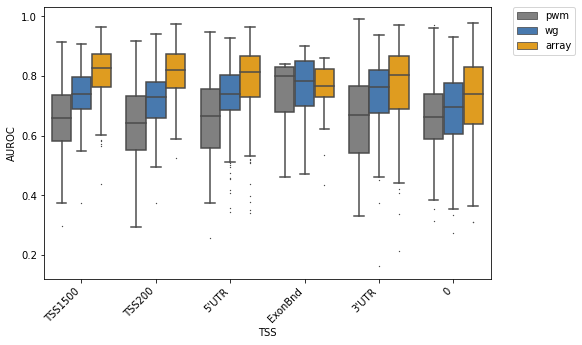

In [2]:
# def plot_allPredScore(directory,agg_meth='mean',method='auroc',region=None,depth=None):
allbox = pd.DataFrame()
www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR","0"]
indir='../../d/tmp/redmo/data/MotifPipeline/sthlm_motif_0_QCbeta'
traces= glob.glob(indir+'/test/*_PRE_window_methyl.txt',recursive = True)
# indices = [i for i, s in enumerate(traces) if 'sthlm_auroc_meltbox' in s]
method='AUROC'

for i,trace in enumerate(traces):
#     trace=traces[jac]
    TSS=(traces[i]).split('/')[9]
    TSS=(TSS).split('_')[0]
#     region=(trace).split('/')[5]
#     depth=(trace).split('/')[6]
    meltbox=pd.read_csv(traces[i],sep=',',names=['cell','TF','pwm','wg','array','size','yes'])
    meltbox['TSS']=TSS
#     print(pd.unique(meltbox.cell))
#     meltbox['buffer']=buffer
    
#     meltbox['depth']=depth
    allbox=pd.concat([allbox,meltbox],axis=0)
allbox00=pd.melt(allbox, id_vars=['TF','cell','TSS','size','yes'], value_vars=['pwm','wg','array'])
allbox11=pd.melt(allbox, id_vars=['TF','cell','TSS','size','yes','pwm'], value_vars=['wg','array'])
# allbox22=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['wg'])
# allbox33=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['array'])
plt.figure(figsize=(8, 5))
plt.grid(False)
allbox00=allbox00[allbox00.cell!='overlap']
allbox00['AUROC']=allbox00['value']
del allbox00['value']
aa=allbox00[allbox00['TSS']==www[0]]
bb=allbox00[allbox00['TSS']==www[1]]
cc=allbox00[allbox00['TSS']==www[2]]
dd=allbox00[allbox00['TSS']==www[3]]
ee=allbox00[allbox00['TSS']==www[4]]
ff=allbox00[allbox00['TSS']==www[5]]
allbox00=pd.concat([aa,bb,cc,dd,ee,ff])

j=sns.boxplot(x='TSS',y=method.upper(), data=allbox00,hue='variable',fliersize = .5,palette=['grey',sns.xkcd_rgb["windows blue"],'orange'])
j.set_xticklabels(j.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.title('Array')
plt.show()
# plt.xticks(rotation=30)
allboxxx=allbox


In [159]:
allbox11

TF     cell      TSS  size  yes       pwm variable     value  \
680      NRF1  GM12878  TSS1500  3225  119  0.732606       wg  0.682768   
681      E2F4  GM12878  TSS1500  2148    9  0.706405       wg  0.717158   
682     CREB3     K562  TSS1500   388    6  0.534686       wg  0.772251   
683      USF2    HepG2  TSS1500  1643  383  0.754080       wg  0.767739   
684      E2F8     K562  TSS1500   498    7  0.473814       wg  0.760692   
...       ...      ...      ...   ...  ...       ...      ...       ...   
2129     USF1  GM12878    3'UTR   524   28  0.663234    array  0.818620   
2130  BHLHE40  GM12878    3'UTR   878   67  0.541178    array  0.793226   
2131      MAX     K562    3'UTR   374   40  0.407635    array  0.653443   
2132    FOSL1     K562    3'UTR   126    7  0.808523    array  0.727491   
2133     MAFF     K562    3'UTR   170    7  0.683611    array  0.572305   

           auc methyl    region  
680   0.682768     wg  promoter  
681   0.717158     wg  promoter  
682   0.772251     wg  promoter  
683   0.767739     wg  promoter  
684   0.760692     wg  promoter  
...        ...    ...       ...  
2129  0.818620  array      body  
2130  0.793226  array      body  
2131  0.653443  array      body  
2132  0.727491  array      body  
2133  0.572305  array      body  

[1686 rows x 11 columns]

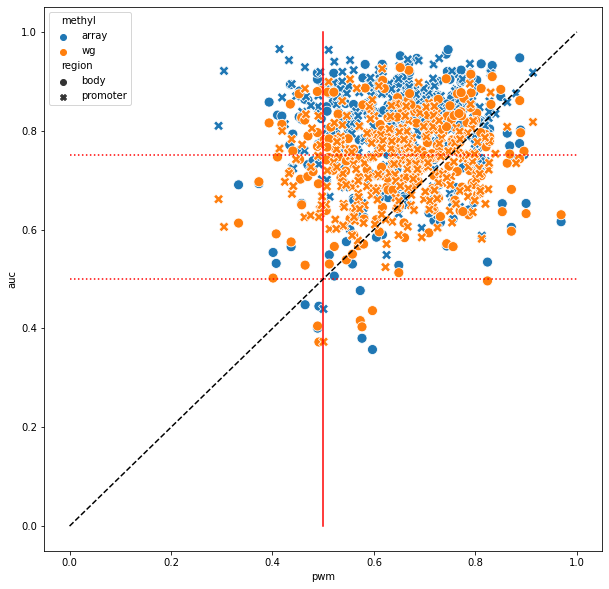

In [4]:
# pwmmm=np.mean(heat[heat.columns[heat.columns.str.contains('pwm')]],axis=1)
# wgbsss=np.mean(heat[heat.columns[heat.columns.str.contains('wg')]],axis=1)
# meee=np.mean(heat[heat.columns[heat.columns.str.contains('me')]],axis=1)
# invData=pd.DataFrame([pwmmm,wgbsss,meee]).transpose()
# invData.columns=['pwm','wg','me']

plt.figure(figsize=(10, 10))
allbox11['auc']=allbox11['value']
allbox11['methyl']=allbox11['variable']

aa=allbox11[allbox11['TSS']==www[0]]
bb=allbox11[allbox11['TSS']==www[1]]
cc=allbox11[allbox11['TSS']==www[2]]
dd=allbox11[allbox11['TSS']==www[3]]
ee=allbox11[allbox11['TSS']==www[4]]
aa['region']='promoter'
bb['region']='promoter'
cc['region']='body'
dd['region']='body'
ee['region']='body'
allbox11=pd.concat([aa,bb,cc,dd,ee])
allboxxx11=allbox11.groupby(['methyl','region','cell','TF']).mean()

# fig, ax = plt.subplots()
# invData['TF']=invData.index
# invData2=pd.melt(allbox00,id_vars=['TF','pwm'])
# invData2.columns=['TF','pwm','data','auc']
sns.scatterplot(
    data=allboxxx11, x="pwm", y='auc', style='region', hue="methyl",
    sizes=(200, 200), legend='full',s=100
)
plt.plot([0,1], [0.75,0.75], 'r:')#.add_legend().set_axis_labels("x", "y")
plt.plot([0.5,0.5],[0,1], 'r-')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,1], [0.5,0.5], 'r:')
# ax.fill_between(.5*invData2.auc, [0.5],1, alpha=0.2)

In [11]:
# t1b, p1b = stats.ttest_ind(aa['AUROC'].dropna(),bb['AUROC'].dropna())
def ttest_plot_TSS(allboxxx,datatype,regions=[]):

    allbox=allboxxx[allboxxx['variable']==datatype]
    # allbox=allbox[allbox['data']=='wg']
    # allbox=allbox[allbox['data']=='me']
    aa=allbox[allbox['TSS']=='TSS1500']
    bb=allbox[allbox['TSS']=='TSS200']
    cc=allbox[allbox['TSS']=="5'UTR"]
    dd=allbox[allbox['TSS']=='ExonBnd']
    ee=allbox[allbox['TSS']=="3'UTN"]
    ff=allbox[allbox['TSS']=='0']



    t0a, p0a = stats.ttest_ind(aa['AUROC'].dropna(),bb['AUROC'].dropna())
    t0b, p0b = stats.ttest_ind(aa['AUROC'].dropna(),cc['AUROC'].dropna())
    t1a, p1a = stats.ttest_ind(aa['AUROC'].dropna(),dd['AUROC'].dropna())
    t1b, p1b = stats.ttest_ind(aa['AUROC'].dropna(),ee['AUROC'].dropna())
    t2a, p2a = stats.ttest_ind(aa['AUROC'].dropna(),ff['AUROC'].dropna())

    t2b, p2b = stats.ttest_ind(bb['AUROC'].dropna(),cc['AUROC'].dropna())
    t3a, p3a = stats.ttest_ind(bb['AUROC'].dropna(),dd['AUROC'].dropna())
    t3b, p3b = stats.ttest_ind(bb['AUROC'].dropna(),ee['AUROC'].dropna())
    t4a, p4a = stats.ttest_ind(bb['AUROC'].dropna(),ff['AUROC'].dropna())

    t4b, p4b = stats.ttest_ind(cc['AUROC'].dropna(),dd['AUROC'].dropna())
    t5a, p5a = stats.ttest_ind(cc['AUROC'].dropna(),ee['AUROC'].dropna())
    t5b, p5b = stats.ttest_ind(cc['AUROC'].dropna(),ff['AUROC'].dropna())

    t6a, p6a = stats.ttest_ind(dd['AUROC'].dropna(),ee['AUROC'].dropna())
    t6b, p6b = stats.ttest_ind(dd['AUROC'].dropna(),ff['AUROC'].dropna())

    t7a, p7a = stats.ttest_ind(ee['AUROC'].dropna(),ff['AUROC'].dropna())

    # initialise data of lists. 
    ttest = {'0 ttest':[t0a,t0b,t1a,t1b,t2a,1], 
             "5'UTR ttest":[t2b,t3a,t3b,t4a,1,0],
            'ExonBnd ttest':[t4b,t5a,t5b,1,0,0],
             "3'UTR ttest":[t6a,t6b,1,0,0,0],
            'TSS200 ttest':[t7a,1,0,0,0,0],
            'TSS1500 ttest':[1,0,0,0,0,0]}

    pval = {'0 pval':[p0a,p0b,p1a,p1b,p2a,1], 
             "5'UTR pval":[p2b,p3a,p3b,p4a,1,0],
            'ExonBnd pval':[p4b,p5a,p5b,1,0,0],
            "3'UTR pval":[p6a,p6b,1,0,0,0],
            'TSS200 pval':[p7a,1,0,0,0,0],
            'TSS1500 pval':[1,0,0,0,0,0]} 

    # Creates pandas DataFrame. 
    df_ttest = pd.DataFrame(ttest, index =['TSS1500','TSS200', "3'UTR", 'ExonBnd',"5'UTR",'0']) 
    df_pval = pd.DataFrame(pval, index =['TSS1500','TSS200', "3'UTR", 'ExonBnd',"5'UTR",'0']) 

#     df_ttest = pd.DataFrame(ttest, index =['0',"5'UTR", 'ExonBnd', "3'UTR", 'TSS200','TSS1500']) 
#     df_pval = pd.DataFrame(pval, index =['0',"5'UTR", 'ExonBnd', "3'UTR", 'TSS200','TSS1500']) 
    df_pval.index='pwm_'+df_pval.index

    df_pval_pwm=df_pval
    return df_pval_pwm


### ST4

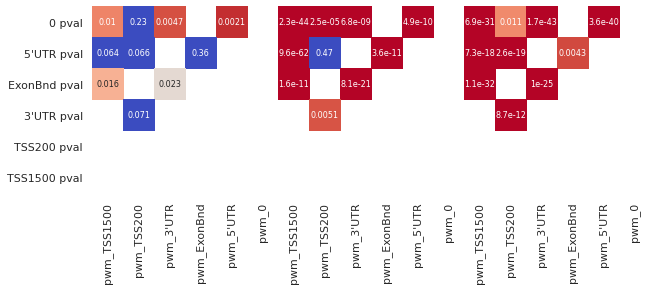

In [12]:
df_pval_pwm=ttest_plot_TSS(allbox00,'pwm')
df_pval_wg=ttest_plot_TSS(allbox00,'wg')
df_pval_me=ttest_plot_TSS(allbox00,'array')

allPval=pd.concat([df_pval_pwm,df_pval_wg,df_pval_me])

mask = np.zeros_like(allPval)
mask[np.triu_indices_from(allPval)] = True
cc=pd.DataFrame(np.flip(mask[0:6,0:6],axis=0))
mask=np.array(pd.concat([cc.T,cc.T,cc.T]))

sns.set(font_scale=1)

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 7))
    
    ax = sns.heatmap(allPval.T/2,annot=True,mask=mask.T,cbar=False,
                     vmax=.05, square=True,cmap='coolwarm_r',
                    annot_kws={"size":8})
#     plt.xticks(rotation=30)

In [13]:
allPval

0 pval    5'UTR pval  ExonBnd pval    3'UTR pval  \
pwm_TSS1500  2.020131e-02  1.279355e-01  3.130030e-02           NaN   
pwm_TSS200   4.695358e-01  1.329037e-01           NaN  1.416801e-01   
pwm_3'UTR    9.485684e-03           NaN  4.698696e-02  1.000000e+00   
pwm_ExonBnd           NaN  7.278260e-01  1.000000e+00  0.000000e+00   
pwm_5'UTR    4.161803e-03  1.000000e+00  0.000000e+00  0.000000e+00   
pwm_0        1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
pwm_TSS1500  4.577787e-44  1.927068e-61  3.176251e-11           NaN   
pwm_TSS200   4.977079e-05  9.490864e-01           NaN  1.026357e-02   
pwm_3'UTR    1.355775e-08           NaN  1.618114e-20  1.000000e+00   
pwm_ExonBnd           NaN  7.133736e-11  1.000000e+00  0.000000e+00   
pwm_5'UTR    9.872887e-10  1.000000e+00  0.000000e+00  0.000000e+00   
pwm_0        1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
pwm_TSS1500  1.384787e-30  1.457034e-17  2.250458e-32           NaN   
pwm_TSS200   2.114912e-02  5.164846e-19           NaN  1.746447e-11   
pwm_3'UTR    3.331920e-43           NaN  2.024310e-25  1.000000e+00   
pwm_ExonBnd           NaN  8.559963e-03  1.000000e+00  0.000000e+00   
pwm_5'UTR    7.257177e-40  1.000000e+00  0.000000e+00  0.000000e+00   
pwm_0        1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

             TSS200 pval  TSS1500 pval  
pwm_TSS1500          NaN             1  
pwm_TSS200           1.0             0  
pwm_3'UTR            0.0             0  
pwm_ExonBnd          0.0             0  
pwm_5'UTR            0.0             0  
pwm_0                0.0             0  
pwm_TSS1500          NaN             1  
pwm_TSS200           1.0             0  
pwm_3'UTR            0.0             0  
pwm_ExonBnd          0.0             0  
pwm_5'UTR            0.0             0  
pwm_0                0.0             0  
pwm_TSS1500          NaN             1  
pwm_TSS200           1.0             0  
pwm_3'UTR            0.0             0  
pwm_ExonBnd          0.0             0  
pwm_5'UTR            0.0             0  
pwm_0                0.0             0

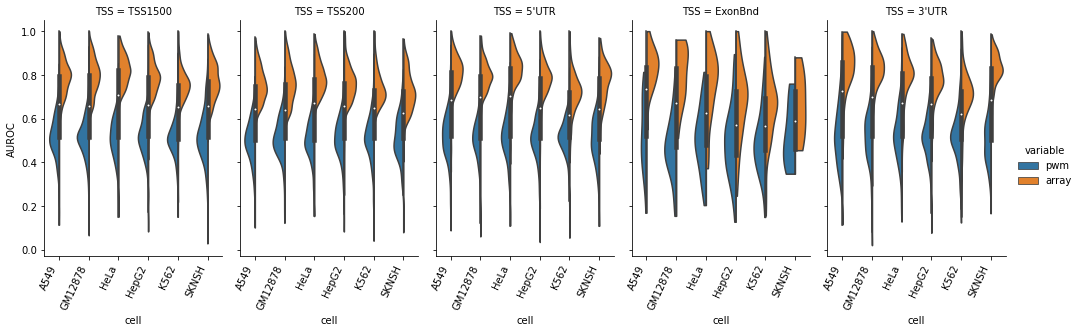

In [80]:
allbox00=allbox00[allbox00.cell!='overlap']
allbox00['AUROC']=allbox00['value']

aa=allbox00[allbox00['TSS']==www[0]]
bb=allbox00[allbox00['TSS']==www[1]]
cc=allbox00[allbox00['TSS']==www[2]]
dd=allbox00[allbox00['TSS']==www[3]]
ee=allbox00[allbox00['TSS']==www[4]]

allbox00=pd.concat([aa,bb,cc,dd,ee])

chart=sns.catplot(x="cell", y=method.upper(),hue="variable", col="TSS",data=allbox00, kind="violin",
                  split=True,height=4, aspect=.7,cut=0)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

## promoter v body

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

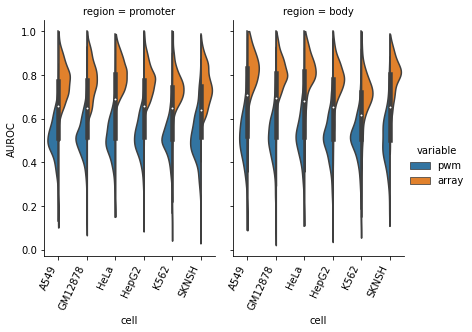

In [81]:
allbox00=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['pwm','array'])
allbox00=allbox00[allbox00.cell!='overlap']
allbox00['AUROC']=allbox00['value']

aa=allbox00[allbox00['TSS']==www[0]]
bb=allbox00[allbox00['TSS']==www[1]]
cc=allbox00[allbox00['TSS']==www[2]]
dd=allbox00[allbox00['TSS']==www[3]]
ee=allbox00[allbox00['TSS']==www[4]]
aa['region']='promoter'
bb['region']='promoter'
cc['region']='body'
dd['region']='body'
ee['region']='body'
allbox00=pd.concat([aa,bb,cc,dd,ee])

chart=sns.catplot(x="cell", y=method.upper(),hue="variable", col="region",data=allbox00, kind="violin",
                  split=True,height=4, aspect=.7,cut=0)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/udd/redmo/.conda/envs/mypy3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

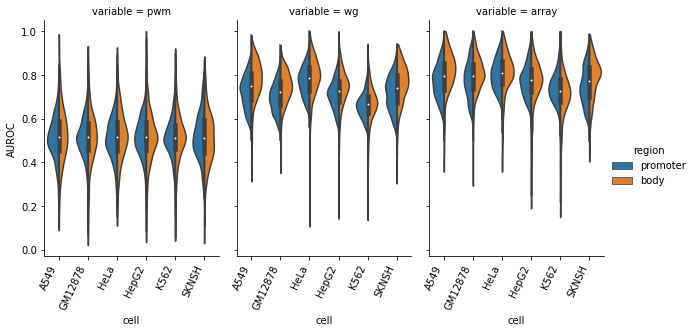

In [85]:
allbox00=pd.melt(allbox, id_vars=['cell','TSS','size','yes'], value_vars=['pwm','wg','array'])
allbox00=allbox00[allbox00.cell!='overlap']
allbox00['AUROC']=allbox00['value']

aa=allbox00[allbox00['TSS']==www[0]]
bb=allbox00[allbox00['TSS']==www[1]]
cc=allbox00[allbox00['TSS']==www[2]]
dd=allbox00[allbox00['TSS']==www[3]]
ee=allbox00[allbox00['TSS']==www[4]]
aa['region']='promoter'
bb['region']='promoter'
cc['region']='body'
dd['region']='body'
ee['region']='body'
allbox00=pd.concat([aa,bb,cc,dd,ee])

chart=sns.catplot(x="cell", y=method.upper(),hue="region", col="variable",data=allbox00, kind="violin",
                  split=True,height=4, aspect=.7,cut=0)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

## focus on TSS200

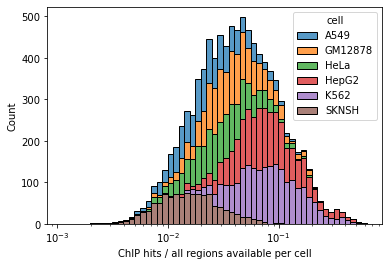

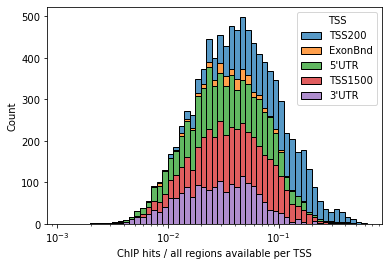

In [46]:
# a=plt.hist(np.log10(allbox['yes']),log=True,bins=100,alpha=5)
# a=plt.hist(np.log10(aa['yes']),log=True,bins=100,alpha=.5)
# a=plt.hist(np.log10(bb['yes']),log=True,bins=100,alpha=.5)
# a=plt.hist(np.log10(cc['yes']),log=True,bins=100,alpha=.5)
# a=plt.hist(np.log10(dd['yes']),log=True,bins=100,alpha=.5)
# a=plt.hist(np.log10(ee['yes']),log=True,bins=100,alpha=.5)
g=sns.histplot(allbox11, x=(allboxx11.yes)/allboxx11['size'], hue="cell", multiple="stack",log_scale=True)
g.set_xlabel('ChIP hits / all regions available per cell')
plt.show()
h=sns.histplot(allbox11, x=(allboxx11.yes)/allboxx11['size'], hue="TSS", multiple="stack",log_scale=True)
h.set_xlabel('ChIP hits / all regions available per TSS')
plt.show()
# sns.histplot(allbox22, x=np.log10(allboxx22.yes), hue="TSS", multiple="stack")
# plt.title('wgbs')
# plt.show()
# sns.histplot(allbox33, x=np.log10(allboxx33.yes), hue="TSS", multiple="stack")
# plt.title('array')
# plt.show()

## WGBS read depth

In [72]:
A549=pd.read_csv('data/MotifPipeline/ENCODE/wgbsin/A549both.txt',sep='\t',usecols=[3],names=['reads'])
# print()
print(A549[A549['reads']>10].size/A549.size,'=',A549[A549['reads']>10].size,'/',A549.size)

GM12878=pd.read_csv('data/MotifPipeline/ENCODE/wgbsin/GM12878both.txt',sep='\t',usecols=[3],names=['reads'])
# print()
print(GM12878[GM12878['reads']>10].size/GM12878.size)

HeLa=pd.read_csv('data/MotifPipeline/ENCODE/wgbsin/HeLaboth.txt',sep='\t',usecols=[3],names=['reads'])
# print()
print(HeLa[HeLa['reads']>10].size/HeLa.size)

HepG2=pd.read_csv('data/MotifPipeline/ENCODE/wgbsin/HepG2both.txt',sep='\t',usecols=[3],names=['reads'])
# print()
print(HepG2[HepG2['reads']>10].size/HepG2.size)

K562=pd.read_csv('data/MotifPipeline/ENCODE/wgbsin/K562both.txt',sep='\t',usecols=[3],names=['reads'])
# print()
print(K562[K562['reads']>10].size/K562.size)

SKNSH=pd.read_csv('data/MotifPipeline/ENCODE/wgbsin/SKNSHboth.txt',sep='\t',usecols=[3],names=['reads'])
# print()
print(SKNSH[SKNSH['reads']>10].size/SKNSH.size)

0.5396518395703626
0.6714301294821499
0.6977736662366679
0.6014958318605518
0.6588440156999931
0.482484228583152


In [75]:
print(A549[A549['reads']>10].size/A549.size,'=',A549[A549['reads']>10].size,'/',A549.size)
print(GM12878[GM12878['reads']>10].size/GM12878.size,'=',GM12878[GM12878['reads']>10].size,'/',GM12878.size)
print(HeLa[HeLa['reads']>10].size/HeLa.size,'=',HeLa[HeLa['reads']>10].size,'/',HeLa.size)
print(HepG2[HepG2['reads']>10].size/HepG2.size,'=',HepG2[HepG2['reads']>10].size,'/',HepG2.size)
print(K562[K562['reads']>10].size/K562.size,'=',K562[K562['reads']>10].size,'/',K562.size)
print(SKNSH[SKNSH['reads']>10].size/SKNSH.size,'=',SKNSH[SKNSH['reads']>10].size,'/',SKNSH.size)


0.5396518395703626 = 31627874 / 58607924
0.6714301294821499 = 39351126 / 58607924
0.6977736662366679 = 40895066 / 58607924
0.6014958318605518 = 35252422 / 58607924
0.6588440156999931 = 38613480 / 58607924
0.482484228583152 = 28277399 / 58607924


## CREB CEBPa analysis

In [ ]:
import shutil

indir='data/MotifPipeline/sthlm_motif_0_QCbeta/'
traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
indices = [i for i, s in enumerate(traces) if 'CREB' in s]
# www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR"]
aurocs = pd.DataFrame()

dir=(indir+'/test/')
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# trace=traces[0]
for i,trace in enumerate(indices):
    trace=traces[indices[i]]
#     plt.subplot(2, 2, 3)
    if 'pc' in trace:
        combo=(trace).split('/')[7]

    elif 'd/tmp' in trace:
        combo=(trace).split('/')[8]
    else:
        combo=(trace).split('/')[3]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
#     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
#     for TSS in enumerate(www):
    Col1=os.path.basename(trace).split('_')[0] #cell
    Col2='CEBPA'#os.path.basename(trace).split('_')[1] #TF
#         TSS=TSS[1]
# #         if Col1=='GM12878':
# #             data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','xxx','body','ChIPTF'])
# #             cc=data.body.str.find(TSS)
# #             cc[cc!=-1]=TSS
# #             data['TSS']=cc
# #             print(Col2+'in'+Col1)
# #         else:
    try:
        data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,8,9,10,15,16],names=["chr", "start", "end",'pwm','hits',"W1",'me','ChIPTF','cell'])#,'body','TSS'])
    #                 break

    #     data=data[data['TSS']==TSS]


        table2=[]
        tbl=[]
        tmpTBL2=[]
        tmpTBL=[]
        table3=[]
        tblC=[]
        tmpTBLC=[]
        data.pwm=data.pwm.astype('float')
        data.pwm=(data['pwm']-data['pwm'].min())/(data['pwm'].max()-data['pwm'].min())
        data=data.fillna(0)
        data.ChIPTF=data.ChIPTF.replace('.',0)
        # print(data.shape)
        data.ChIPTF[(data.ChIPTF==Col2)]=1
        data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
        data.ChIPTF=pd.to_numeric(data.ChIPTF)
        

        if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

            plt.plot([0, 1], [0, 1], 'k--')
            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
            roc_auc=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc),
                     color='b', linestyle=':', linewidth=4)

            fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
            roc_auc2=metrics.auc(fpr2, tpr2)
            plt.plot(fpr2, tpr2,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc2),
                     color='r', linestyle=':', linewidth=4)

            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, 1-data.me)
            roc_auc3=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc3),
                     color='y', linestyle=':', linewidth=4)



            Col1=cell
            Col2=TF
            Col3=roc_auc #motif auroc
            Col4=roc_auc2
            Col5=roc_auc3
#             Col55=roc_auc4
            Col6=data.shape[0]
            Col7=np.sum(data.ChIPTF)
            column = [Col1, Col2, Col3, Col4,Col5,Col6,Col7]
            print(column)
            column=np.transpose(pd.DataFrame((column)))
            column.to_csv(indir+'/test/_PRE_window_methyl_CREB-CEBPa.txt',mode='a',header=False,index=False)
            aurocs=pd.concat([aurocs,column],axis=0)
            print("AUROC calculated for "+TF+" in "+cell)
    except:
        pass

In [68]:
indir='data/MotifPipeline/sthlm_motif_0_QCbeta/'

data=pd.read_csv(indir+'/test/_PRE_window_methyl_CREB-CEBPa.txt',sep=',',names=['cell','TF','pwm','wg','me','fullChIP','yesChIP'])
data['ChIP']='CEBPA'
data

cell       TF       pwm        wg        me  fullChIP  yesChIP   ChIP
0     K562    CREB1  0.773101  0.697768  0.811223      3683      144  CEBPA
1     A549    CREB1  0.688260  0.853113  0.906602      4953      334  CEBPA
2     K562    CREB3  0.584557  0.775594  0.853456      2327       12  CEBPA
3     K562  CREB3L1  0.632055  0.699815  0.783872      4731       45  CEBPA
4    HepG2    CREB1  0.783731  0.798074  0.847907      4642      913  CEBPA
5  GM12878    CREB1  0.697221  0.754441  0.874983      4480      176  CEBPA

In [ ]:
import shutil

indir='data/MotifPipeline/sthlm_motif_0_QCbeta/'
traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
indices = [i for i, s in enumerate(traces) if 'CREB' in s]
# www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR"]
aurocs = pd.DataFrame()

dir=(indir+'/test/')
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# trace=traces[0]
for i,trace in enumerate(indices):
    trace=traces[indices[i]]
#     plt.subplot(2, 2, 3)
    if 'pc' in trace:
        combo=(trace).split('/')[7]

    elif 'd/tmp' in trace:
        combo=(trace).split('/')[8]
    else:
        combo=(trace).split('/')[3]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
#     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
#     for TSS in enumerate(www):
    Col1=os.path.basename(trace).split('_')[0] #cell
    Col2=os.path.basename(trace).split('_')[1] #TF
#         TSS=TSS[1]
# #         if Col1=='GM12878':
# #             data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','xxx','body','ChIPTF'])
# #             cc=data.body.str.find(TSS)
# #             cc[cc!=-1]=TSS
# #             data['TSS']=cc
# #             print(Col2+'in'+Col1)
# #         else:
    try:
        data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,8,9,10,15,16],names=["chr", "start", "end",'pwm','hits',"W1",'me','ChIPTF','cell'])#,'body','TSS'])
    #                 break

    #     data=data[data['TSS']==TSS]


        table2=[]
        tbl=[]
        tmpTBL2=[]
        tmpTBL=[]
        table3=[]
        tblC=[]
        tmpTBLC=[]
        data.pwm=data.pwm.astype('float')
        data.pwm=(data['pwm']-data['pwm'].min())/(data['pwm'].max()-data['pwm'].min())
        data=data.fillna(0)
        data.ChIPTF=data.ChIPTF.replace('.',0)
        # print(data.shape)
        data.ChIPTF[(data.ChIPTF==Col2)]=1
        data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
        data.ChIPTF=pd.to_numeric(data.ChIPTF)
        

        if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

            plt.plot([0, 1], [0, 1], 'k--')
            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
            roc_auc=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc),
                     color='b', linestyle=':', linewidth=4)

            fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
            roc_auc2=metrics.auc(fpr2, tpr2)
            plt.plot(fpr2, tpr2,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc2),
                     color='r', linestyle=':', linewidth=4)

            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, 1-data.me)
            roc_auc3=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc3),
                     color='y', linestyle=':', linewidth=4)



            Col1=cell
            Col2=TF
            Col3=roc_auc #motif auroc
            Col4=roc_auc2
            Col5=roc_auc3
#             Col55=roc_auc4
            Col6=data.shape[0]
            Col7=np.sum(data.ChIPTF)
            column = [Col1, Col2, Col3, Col4,Col5,Col6,Col7]
            print(column)
            column=np.transpose(pd.DataFrame((column)))
            column.to_csv(indir+'/test/_PRE_window_methyl_CREB.txt',mode='a',header=False,index=False)
            aurocs=pd.concat([aurocs,column],axis=0)
            print("AUROC calculated for "+TF+" in "+cell)
    except:
        pass

In [69]:
data=pd.read_csv(indir+'/test/_PRE_window_methyl_CREB.txt',sep=',',names=['cell','TF','pwm','wg','me','fullChIP','yesChIP'])
data['ChIP']='CREB'
data

cell       TF       pwm        wg        me  fullChIP  yesChIP  ChIP
0     K562    CREB1  0.773101  0.697768  0.811223      3683      144  CREB
1     A549    CREB1  0.688260  0.853113  0.906602      4953      334  CREB
2     K562    CREB3  0.584557  0.775594  0.853456      2327       12  CREB
3     K562  CREB3L1  0.632055  0.699815  0.783872      4731       45  CREB
4    HepG2    CREB1  0.783731  0.798074  0.847907      4642      913  CREB
5  GM12878    CREB1  0.697221  0.754441  0.874983      4480      176  CREB

In [ ]:
import shutil

indir='data/MotifPipeline/sthlm_motif_0_QCbeta/'
traces = [log for log in glob.glob(indir+'/*') if not os.path.isdir(log)]
#     os.remove(indir+'/test/camb_PRE_window_methyl.txt')
indices = [i for i, s in enumerate(traces) if 'CEBPA' in s]
# www=['TSS1500','TSS200',  "5'UTR",'ExonBnd',"3'UTR"]
aurocs = pd.DataFrame()

dir=(indir+'/test/')
if os.path.exists(dir):
    shutil.rmtree(dir)
os.makedirs(dir)

# trace=traces[0]
for i,trace in enumerate(indices):
    trace=traces[indices[i]]
#     plt.subplot(2, 2, 3)
    if 'pc' in trace:
        combo=(trace).split('/')[7]

    elif 'd/tmp' in trace:
        combo=(trace).split('/')[8]
    else:
        combo=(trace).split('/')[3]
#             combo=trace.split('/')[8] ##change this from 7 to 8 with tmp1 dir from tmp0
    TF=combo.split('_')[1]
    cell=combo.split('_')[0]
#     data=pd.read_csv(trace,sep='\t',names=['chr','start','end','pwm','CG','ChIPTF','array','location'])
#     for TSS in enumerate(www):
    Col1=os.path.basename(trace).split('_')[0] #cell
    Col2=os.path.basename(trace).split('_')[1] #TF
#         TSS=TSS[1]
# #         if Col1=='GM12878':
# #             data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,4,8,9,10,11,12,13],names=["chr", "start", "end",'pwm','CG','hits',"W1",'array','xxx','body','ChIPTF'])
# #             cc=data.body.str.find(TSS)
# #             cc[cc!=-1]=TSS
# #             data['TSS']=cc
# #             print(Col2+'in'+Col1)
# #         else:
    try:
        data=pd.read_csv(trace,sep='\t',usecols=[0,1,2,3,8,9,10,15,16],names=["chr", "start", "end",'pwm','hits',"W1",'me','ChIPTF','cell'])#,'body','TSS'])
    #                 break

    #     data=data[data['TSS']==TSS]


        table2=[]
        tbl=[]
        tmpTBL2=[]
        tmpTBL=[]
        table3=[]
        tblC=[]
        tmpTBLC=[]
        data.pwm=data.pwm.astype('float')
        data.pwm=(data['pwm']-data['pwm'].min())/(data['pwm'].max()-data['pwm'].min())
        data=data.fillna(0)
        data.ChIPTF=data.ChIPTF.replace('.',0)
        # print(data.shape)
        data.ChIPTF[(data.ChIPTF==Col2)]=1
        data=data[(data.ChIPTF==0)|(data.ChIPTF==1)]
        data.ChIPTF=pd.to_numeric(data.ChIPTF)
        

        if np.sum(data.ChIPTF)>5: # and np.sum(data_nonCG.ChIPTF)>5:

            plt.plot([0, 1], [0, 1], 'k--')
            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, data.pwm)
            roc_auc=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc),
                     color='b', linestyle=':', linewidth=4)

            fpr2, tpr2, thresholds = metrics.roc_curve(data.ChIPTF, 1-(data.W1/100))
            roc_auc2=metrics.auc(fpr2, tpr2)
            plt.plot(fpr2, tpr2,
                     label='wgbs (area = {0:0.2f})'
                           ''.format(roc_auc2),
                     color='r', linestyle=':', linewidth=4)

            fpr, tpr, thresholds = metrics.roc_curve(data.ChIPTF, 1-data.me)
            roc_auc3=metrics.auc(fpr, tpr)
            plt.plot(fpr, tpr,
                     label='pwm (area = {0:0.2f})'
                         ''.format(roc_auc3),
                     color='y', linestyle=':', linewidth=4)



            Col1=cell
            Col2=TF
            Col3=roc_auc #motif auroc
            Col4=roc_auc2
            Col5=roc_auc3
#             Col55=roc_auc4
            Col6=data.shape[0]
            Col7=np.sum(data.ChIPTF)
            column = [Col1, Col2, Col3, Col4,Col5,Col6,Col7]
            print(column)
            column=np.transpose(pd.DataFrame((column)))
            column.to_csv(indir+'/test/_PRE_window_methyl_CEBPa.txt',mode='a',header=False,index=False)
            aurocs=pd.concat([aurocs,column],axis=0)
            print("AUROC calculated for "+TF+" in "+cell)
    except:
        pass

In [70]:
data=pd.read_csv(indir+'/test/_PRE_window_methyl_CEBPa.txt',sep=',',names=['cell','TF','pwm','wg','me','fullChIP','yesChIP'])
data

cell       TF       pwm        wg        me  fullChIP  yesChIP
0     K562    CREB1  0.773101  0.697768  0.811223      3683      144
1     A549    CREB1  0.688260  0.853113  0.906602      4953      334
2     K562    CREB3  0.584557  0.775594  0.853456      2327       12
3     K562  CREB3L1  0.632055  0.699815  0.783872      4731       45
4    HepG2    CREB1  0.783731  0.798074  0.847907      4642      913
5  GM12878    CREB1  0.697221  0.754441  0.874983      4480      176